# Identification of the food consumed by bats using  mass-spectrometer

Goni Naaamani, id 200032787
Omer mazar,    id 032174849

# 1. Introduction


הכרת המזון אותו אוכל בעל החיים מלמדת אותנו רבות הן על הביולוגיה שלו והן על הסביבה האקולוגית שלו. במחקרי שדה ישנו קושי רב להעריך מה בעל החיים אוכל בפועל. מחקר חדש של פרופ' יוסי יובל והדוקטורנט יומירן ניסן מנסה למצוא מענה לבעיה זו על ידי ניתוח צואת עטלפים באמצעות ספקטרומטר מסה.
ספקטרומטר מסה הוא מתקן המודד את היחס בין המטען למסה של חלקיקים טעונים. תוצאות מדידה בספקטרומטר מסה נותנות את המשקל המולקולרי והעוצמה של הרכיבים השונים וניתן באמצעותה לשחזר מה הם המרכיבים הכימיים הבסיסיים (חלבונים, סוכרים וכו'). עם זאת, לא ניתן עדיין להבין מבדיקה זו מהם החומרים הנבדקים (במחקר זה, מהו המזון הנצרך).
נאסף דאטה מ- 16 עטלפים (מתוכו ל12 עטלפים הדאטה מוכן לניתוח). כל העטלפים ניזונו בשלבים שונים בניסוי מבננה בלבד, תפוח בלבד ושילוב של בננה ותפוח. נלקחו דגימות מכל העטלפים בשלבי התזונה השונים מהפה ומפי הטבעת לפני האכלה, חמש שעות אחרי האכלה ושמונה שעות אחרי האכלה.
אנו מתכננים להתייחס לבעיה כבעיית סיווג, ומאחר והתיוגים ידועים להשתמש בלמידת מכונה מבוקרת.
כל דגימה בספקטרומטר מסה מכילה מאות מסבירים (המשקל המולקולרי והעוצמה הנמדדת). ולכל עטלף יש דגימות משלושת סוגי התזונה, בשלושה זמנים שונים, מהפה ומפי הטבעת.

The data was collected from 12 individuals which were fed for three consecutive days with the same food: banana, apple or a mix of bananas and apples. The samples were taken before the feedings (i.e. about 24 hours after the previous feedind), 5 hours after the feedings and 8 hours after it, from the the bats' mouths and from their anus. The samples were analyzed  by mass-sepctrometry. The output of the spectrometery is two matrices of the measured amplitudes in each 'mass to z-value', for positive-charged molecules and negative ones. Each spectromass compounds several thousands of values. We assmbled this data to one matrix with all the information collected from all the bats in the experiment. The input data to our model is a matrix of 165 rows × 38008 columns.

Note: To navigate in this notebook It is recommended to open 'Table od contennts'.


# 2. Objecitves 

The goal of this research is to test a new method of applying spectrometry for recognition of food components consumed by bats. we ask the following questions:

1) Can we discriminate between consumption of apple and  banana, based on spectrometry?

2) Can we indicate the consumption of a certain food component, i.e banana or apple?

3) Can we discriminate between banana and apple by using the similarity between the spectrometry of the bat's samples and the orginal compenents? 



# 3. Data Analysis and Visualisation

The data analysis consisted the following stages:

1) Building the data-file with all the the measurements taken from the bats' samples by the researchers. This is the input to our model:** 'Data_Frame_2020_03_19.csv'**.

2) Data verification and a removal of mistakes in the original data.

3) Interpolation of the data to get a continuos vector in each row.

4) Plotting the data as a function of the contorlled parameters (individual bats, food, anal/ oral), looking for trends in the data.

5) Testing two similraites methods betweeen each paired- rows in the data: **pearson correlation**, and **jackard-similarity** between the dominent peaks of the mass-spectrometry. 



## 3.1 Upload data base

Input: 'Data_Frame_2020_03_19.csv', Output: m_data

Mount data base from google drive- raw data

In [0]:
# import common-usaed libraries
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import re
from google.colab import drive
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


upload data from google drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# make sure the data is in the right location or change root.
m_data = pd.read_csv('/content/gdrive/My Drive/ML_bats_project/Data_Frame_2020_03_19.csv')

or upload from local disk (don't run if the file was uploaded from drive)

In [0]:
# import file from local disk 
from google.colab import files
import io

uploaded = files.upload()
m_data = pd.read_csv(io.BytesIO(uploaded['Data_Frame_2020_03_19.csv'])) # 

Saving Data_Frame_2020_03_19.csv to Data_Frame_2020_03_19.csv


## 3.2 Data verification: remove unwanted rows. Output: orig_data

In [0]:
# check columns
all_bats = np.unique(m_data['bat'])
all_foods =  np.unique(m_data['food'])
all_anal = np.unique(m_data['oral/anal'])
# [col for col in m_data.columns if 'oral' in col]
print('bats:', all_bats)
print('foods:', all_foods)
print('oral/anal:', all_anal)


bats: ['10_Roy' '11_Alf' '12_Kai' '1_Vova' '2_Sasha' '3_Sergey' '4_Yael'
 '5_Elad' '6_Omer' '7_Beber' '8_Jojo' '9_Lord' 'YOMIRAN_ready_bats'
 'project']
foods: ['7_Beber' 'Apple' 'Banana' 'Mix' 'YOMIRAN_ready_bats']
oral/anal: ['5_Elad' 'Anal' 'Apple' 'Oral']


In [0]:
# remove probelmatic rows 
m_data.index[(m_data['bat'] == 'YOMIRAN_ready_bats') | (m_data['bat'] == 'project')]
remove_bats = m_data.index[(m_data['bat'] == 'YOMIRAN_ready_bats') | (m_data['bat'] == 'project')  ]
remove_foods = m_data.index[ ~((m_data['food'] == 'Banana') | (m_data['food'] == 'Apple') 
| (m_data['food'] == 'Mix')) ]
remove_anal = m_data.index[~((m_data['oral/anal'] == 'Anal') | (m_data['oral/anal'] == 'Oral'))]
print('type:' , type(remove_bats))

rows_to_remove = [*remove_bats, *remove_anal, *remove_foods] 
rows_to_remove = np.unique([*remove_bats, *remove_anal, *remove_foods] )

print('num of rows to remove: ',np.size(rows_to_remove))
print('rows to remove: \n', rows_to_remove)
type(rows_to_remove)

orig_data = m_data.drop(index=rows_to_remove)
# interpolated_data_fixed = interpolated_data.drop(index=rows_to_remove)

type: <class 'pandas.core.indexes.numeric.Int64Index'>
num of rows to remove:  9
rows to remove: 
 [ 62  63  64 124 125 126 127 128 129]


In [0]:
orig_data

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_id,sample_time
0,0,2_Sasha,Apple,NaN,NaN,5470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2398.0,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,1924.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5177.0,NaN,NaN,NaN,NaN,241.0,NaN,NaN,NaN,NaN,8552.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6200.0,NaN,NaN,NaN,NaN,194.0,NaN,NaN,NaN,NaN,YY20-136,After 8
1,0,2_Sasha,Apple,NaN,NaN,4788.0,NaN,NaN,NaN,NaN,NaN,NaN,111100.0,2711.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1085.0,NaN,NaN,NaN,NaN,NaN,NaN,3075.0,NaN,NaN,NaN,NaN,NaN,NaN,272.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6642.0,NaN,NaN,NaN,NaN,NaN,151.0,NaN,NaN,NaN,NaN,7374.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5680.0,NaN,NaN,NaN,NaN,NaN,NaN,1982.0,NaN,NaN,NaN,NaN,NaN,12030.0,YY20-134,After 5
2,0,2_Sasha,Apple,NaN,493.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61440.0,NaN,1456.0,NaN,NaN,NaN,NaN,NaN,609.0,NaN,NaN,NaN,NaN,NaN,2596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1306.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3426.0,NaN,NaN,NaN,NaN,NaN,685.0,NaN,NaN,NaN,NaN,NaN,6781.0,NaN,NaN,NaN,NaN,NaN,NaN,2431.0,NaN,NaN,NaN,NaN,NaN,NaN,1408.0,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,NaN,NaN,NaN,YY20-100,Before
3,0,2_Sasha,Apple,NaN,NaN,3867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3336.0,NaN,NaN,NaN,NaN,NaN,207.0,NaN,NaN,NaN,NaN,NaN,2294.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8687.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10510.0,NaN,NaN,NaN,NaN,NaN,1280.0,NaN,NaN,NaN,NaN,NaN,13190.0,YY20-135,After 8
4,0,2_Sasha,Apple,NaN,NaN,6075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2558.0,NaN,...,NaN,NaN,NaN,NaN,NaN,13210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13740.0,NaN,NaN,NaN,NaN,NaN,1767.0,NaN,NaN,NaN,NaN,NaN,12830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24160.0,YY20-133,After 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,1_Vova,Apple,NaN,266.0,NaN,NaN,NaN,NaN,NaN,NaN,2324.0,NaN,191.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YY20-097,Before
170,0,1_Vova,Banana,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3569.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,844.0,NaN,NaN,NaN,NaN,11120.0,NaN,NaN,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,9562.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YY20-044,After 8
171,0,1_Vova,Banana,NaN,NaN,NaN,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1678.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1885.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,3000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,NaN,NaN,NaN,9569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12410.

## 3.3 Interpolation and Normalization.

input: orig_data 

outputs: (1) orig_data (normalization only), 
(2) interpolated_data (interpolation+normalization)

We aplied the standard normalization used for spectromery-analysis: deviding all values by the maximum amplitude. 
In order to keep high reolution and 'sharp peaks' we used a logarithmic (10th) interplotatoin. 
We applied both normalization and interpolation separtely to the positive and negative vectors in each row.


In [0]:
def my_interpolation(data_frame, col_str, int_flag=True, norm_flag=True ):
  """ Inputs:
          data_frame: the dataframe to be normalized
          col_str: which spectromass to interpolate- 'neg_' / 'pos_'
          int_flag=True, norm_flag=True
      Returns: 
          interpolated_dat: a new dataframe with interpolated and normalized columns instead of Nans : 
          norm_factor: [convention in specromass: most abundant is 1 ]
          mass_vec: array of the mass/z numerical values    """ 
 
  inter_data = data_frame.copy()
  cols = [i for i in inter_data.columns if  col_str in i ]
  # the m\z numeric values (x-axis)
  mass_vec=[]
  for item in cols:
    result = re.findall("\d+\.\d+",str(item))
    mass_vec.append(float(result[0]))
  # print('\n m/z= \n', mass_vec)
  mass_vec = np.asarray(mass_vec)
  mass_vec = np.reshape(mass_vec, (1,len(cols)))

  # Sort x-axis
  id_sort = np.argsort(mass_vec)
  idxnot = [np.argwhere(id_sort[0,:]==k) for k in np.arange(0,np.size(id_sort),1)]  # for back tracking - keep the original order
  idxnot = np.asarray(idxnot).reshape(np.shape(id_sort))

  sorted_mass = mass_vec[:,id_sort[0,:]]
  cols_array = np.asanyarray(cols)
  sorted_cols = cols_array[id_sort[0,:]]
  inverse_cols = np.asanyarray(sorted_cols)[idxnot[0,:]]
  sorted_data = inter_data[sorted_cols]            

  # interpolation
  if int_flag:
    rel_amp = np.log10(sorted_data) # logistic interploation
    # rel_amp = np.log10(sorted_data[cols]) # logistic interploation
    rel_amp.interpolate(method='linear',axis=1, inplace= True) # the interpolation
    min_val= rel_amp.min(axis=1).min()
    rel_amp.fillna(min_val, inplace= True) # fill nan outbound values of the interpolation with the minimum value
    rel_amp = np.power(10, rel_amp) # back to original values after interpolation
  else:
    rel_amp =inter_data[cols]


  # Normalization
  if norm_flag:
    # norm_factor = np.sum(rel_amp, axis=1)
    norm_factor = np.max(rel_amp, axis=1)
    rel_amp = rel_amp.multiply(1/norm_factor, axis=0)

 
  inter_data[sorted_cols] = rel_amp;
    
  return inter_data, norm_factor, mass_vec # idxnot, rel_amp


In [0]:
# Interpolating & normalizing the data, normalize the original 
# the Normailzed data: orig_data [df]
# The interpolated and Noramlized: interpolated_data [df]

interpolated_data, norm_factor_neg, mass_neg =  my_interpolation(orig_data,'neg_') 
interpolated_data, norm_factor_pos, mass_pos =  my_interpolation(interpolated_data,'pos_') 

cols_neg = [i for i in interpolated_data.columns if  'neg_' in i]
cols_pos = [i for i in interpolated_data.columns if  'pos_' in i]

orig_data[cols_neg] = orig_data[cols_neg].multiply(1/norm_factor_neg, axis=0) 
orig_data[cols_pos] = orig_data[cols_pos].multiply(1/norm_factor_pos, axis=0) 

# print('norm_factor_neg = ',norm_factor_neg.T)
# print('norm_factor_pos = ',norm_factor_pos.T)
interpolated_data

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_id,sample_time
0,0,2_Sasha,Apple,0.000020,0.000020,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,...,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755,YY20-136,After 8
1,0,2_Sasha,Apple,0.000017,0.000017,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,...,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352,YY20-134,After 5
2,0,2_Sasha,Apple,0.000016,0.002653,0.004850,0.008865,0.016205,0.029621,0.054144,0.098970,0.180907,0.330678,0.007485,0.007836,0.006777,0.005860,0.005068,0.004383,0.003790,0.003278,0.004174,0.005315,0.006767,0.008617,0.010973,0.013972,0.012822,0.011767,0.010799,0.009910,0.009095,0.008346,0.007659,0.007029,0.007022,0.007015,0.007007,0.007000,0.006993,...,0.000425,0.000406,0.000310,0.000237,0.000182,0.000139,0.000106,0.000081,0.000119,0.000174,0.000255,0.000374,0.000548,0.000804,0.000694,0.000599,0.000518,0.000447,0.000386,0.000334,0.000288,0.000266,0.000246,0.000228,0.000211,0.000195,0.000180,0.000167,0.000168,0.000170,0.000171,0.000173,0.000175,0.000176,0.000178,0.000216,0.000263,0.000319,YY20-100,Before
3,0,2_Sasha,Apple,0.000018,0.000018,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,...,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475,YY20-135,After 8
4,0,2_Sasha,Apple,0.000016,0.000016,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.0144

## 3.4 Figures of the controlled parameters

### a) Interpolation test and figures

In [0]:
sample_to_plot = 'YY20-044' # arbitary row
tested_orig = orig_data.loc[orig_data['sample_id']==sample_to_plot, cols_neg]
tested_int = interpolated_data.loc[interpolated_data['sample_id']==sample_to_plot, cols_neg]

idx_notna_neg = ~np.isnan(tested_orig).to_numpy()[0,:]
# the locatoins of measurd amplitude
measured_mz = [val for (k, val) in enumerate(cols_neg) if idx_notna_neg[k] ]
orig_values = tested_orig[measured_mz ]
tested_values = tested_int[measured_mz ]

num_diff = np.sum(np.abs(orig_values- tested_values) > 1, axis=1).to_numpy()
print('number of un-equal values= ', num_diff)

number of un-equal values=  [0]


In [0]:
# Interpolation plot - one row for example

# Select relevant data
sample_to_plot = 'YY20-044' # arbitary row
# sample_to_plot = 'YY20-120'

print('bat sampled:' , orig_data.loc[orig_data.sample_id==sample_to_plot, 'bat'])

int_data = interpolated_data[interpolated_data['sample_id']==sample_to_plot]
orig_data_to_plot = orig_data.loc[interpolated_data['sample_id']==sample_to_plot]

amp_orig_neg = orig_data_to_plot[cols_neg].to_numpy()
amp_orig_pos = orig_data_to_plot[cols_pos].to_numpy()

amp_int_neg = int_data[cols_neg].to_numpy()
amp_int_pos = int_data[cols_pos].to_numpy()


bat sampled: 170    1_Vova
Name: bat, dtype: object


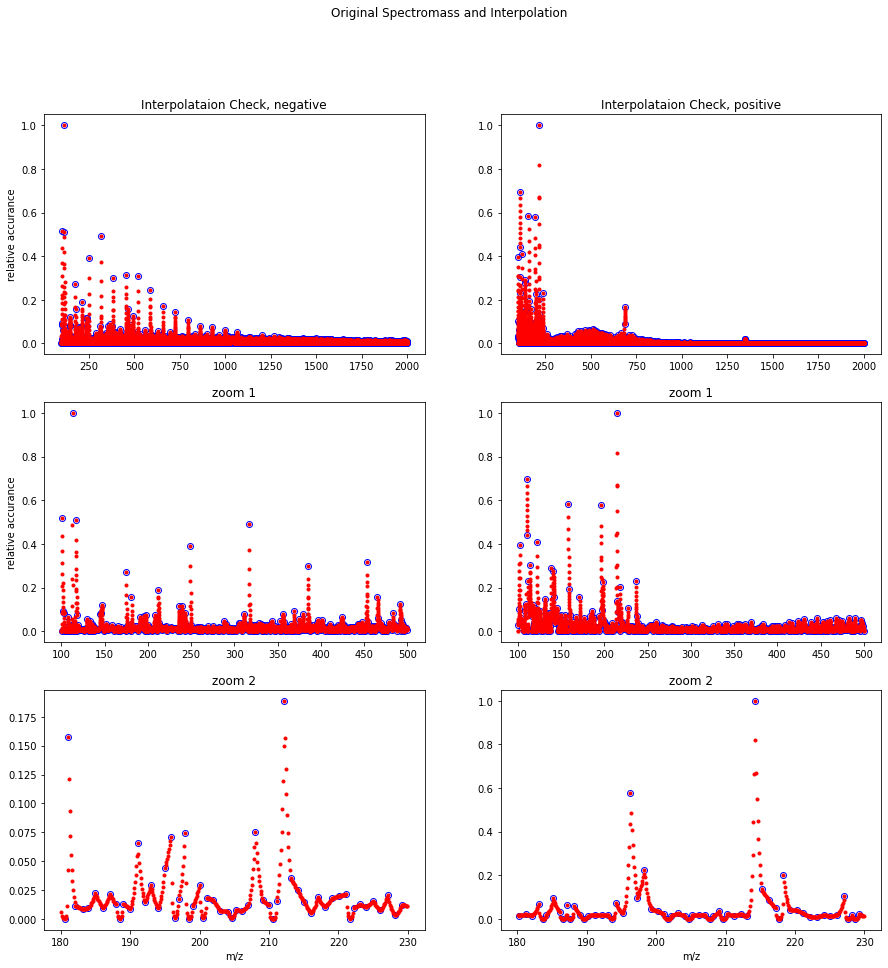

In [0]:
# The plot
# fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2, constrained_layout=True);
# print(ax1)
from matplotlib import gridspec

gs = gridspec.GridSpec(3, 2, height_ratios=[0.3, 0.3, 0.3], width_ratios=[1.5, 1.5])
gs

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
ax6 = fig.add_subplot(gs[5])

ax1.plot(mass_neg[0,:], amp_orig_neg[0,:], 'o', color='b', fillstyle='none');
ax1.plot(mass_neg[0,:], amp_int_neg[0,:], '.', linewidth=1, color='r'); # linestyle='-',
ax1.set_title('Interpolataion Check, negative')

# zoom setting
z1_min = 100; z1_max = 500
z2_min = 180; z2_max = 230
zoom_idx1 = np.logical_and(mass_neg > z1_min , mass_neg < z1_max)
zoom_idx2 = np.logical_and(mass_neg > z2_min , mass_neg < z2_max)

ax3.plot(mass_neg[zoom_idx1], amp_orig_neg[zoom_idx1], 'o', linewidth=1, color='b',fillstyle='none');  # linestyle='-',
ax3.plot(mass_neg[zoom_idx1], amp_int_neg[zoom_idx1], '.', linewidth=1, color='r');  # linestyle='-',

ax5.plot(mass_neg[zoom_idx2], amp_orig_neg[zoom_idx2], 'o',  linewidth=3, color='b', fillstyle='none');  # linestyle='-',
ax5.plot(mass_neg[zoom_idx2], amp_int_neg[zoom_idx2], '.', linewidth=1, color='r');  # linestyle='-',

ax2.plot(mass_pos[0,:], amp_orig_pos[0,:], 'o', color='b', fillstyle='none');
ax2.plot(mass_pos[0,:], amp_int_pos[0,:], '.', linewidth=1, color='r');  # linestyle='-',
ax2.set_title('Interpolataion Check, positive')

ax4.plot(mass_pos[zoom_idx1], amp_orig_pos[zoom_idx1], 'o', color='b', fillstyle='none');
ax4.plot(mass_pos[zoom_idx1], amp_int_pos[zoom_idx1], '.', linewidth=1, color='r');  # linestyle='-',

ax6.plot(mass_pos[zoom_idx2], amp_orig_pos[zoom_idx2], 'o', color='b', fillstyle='none');
ax6.plot(mass_pos[zoom_idx2], amp_int_pos[zoom_idx2], '.', linewidth=1, color='r');  # linestyle='-',


ax3.set_title('zoom 1')
ax4.set_title('zoom 1')
ax5.set_title('zoom 2')
ax6.set_title('zoom 2')

ax1.set_ylabel('relative accurance')
ax5.set_xlabel('m/z')
ax3.set_ylabel('relative accurance')

ax6.set_xlabel('m/z')


# ax1.legend(['orig', 'interpolation'],loc="upper right");
fig.suptitle('Original Spectromass and Interpolation')
# fig.set_dpi(200)

plt.show()

Testing the influence of the controlled param (food, bat id, oral/anal):

In [0]:
# setting the masking filters

idx_after = ['After' in i for i in interpolated_data['sample_time'] ]
idx_banana =  ['Banana' in i for i in interpolated_data['food'] ]
idx_apple =  ['Apple' in i for i in interpolated_data['food'] ]
idx_banana = [a and b for a, b in zip(idx_banana, idx_after)]
idx_apple = [a and b for a, b in zip(idx_apple, idx_after)]

idx_anal = ['Anal' in i for i in interpolated_data['oral/anal'] ]
idx_oral = ['Oral' in i for i in interpolated_data['oral/anal'] ]

print(idx_anal)                          

[False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, True, True, True, False, False, False, Tr

In [0]:
def filter_spectromass_plot(data_frame, idx1, idx2, cols_neg, cols_pos, mass_neg, mass_pos, color_by=None):
  """plot positive and negative mass-spectromaetry according to the filtered data
  compares between data filtered by idx1 and idx2
  returns fig, ax - the handles of the figure and the axes
  data_frame: original dataframe/ interpolated
  idx1, idx2: the indices of the rows we want to plot
  group_by: the column by which we separate the subplots"""
  
  fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True); # nrows =unique(group_by)
  amp1_neg  = data_frame.loc[idx1,cols_neg].to_numpy()
  amp1_pos  = data_frame.loc[idx1,cols_pos].to_numpy()
  amp2_neg  = data_frame.loc[idx2,cols_neg].to_numpy()
  amp2_pos  = data_frame.loc[idx2,cols_pos].to_numpy()

  # all
  ax[0,0].plot(mass_neg.T, amp1_neg.T, '+', color='b', label="Banana");
  ax[0,0].plot(mass_neg.T, amp2_neg.T, '.', color='r', fillstyle='none', label="Apple");
  
  ax[0,1].plot(mass_pos.T, amp1_pos.T, '+', color='b');
  ax[0,1].plot(mass_pos.T, amp2_pos.T, '.', color='r', fillstyle='none');

  # zoom in
  z1_min = 100; z1_max = 250
  # z2_min = 180; z2_max = 230
  zoom_in = np.logical_and(mass_neg > z1_min , mass_neg < z1_max)  # np.arange(0,1500,1)
  zoom_in = zoom_in[0,:]
  print(np.shape(zoom_in))
  ax[1,0].plot(mass_neg[:,zoom_in].T, amp1_neg[:,zoom_in].T, '+', color='b');
  ax[1,0].plot(mass_neg[:,zoom_in].T, amp2_neg[:,zoom_in].T, '.', color='r', fillstyle='none');
  
  ax[1,1].plot(mass_pos[:,zoom_in].T, amp1_pos[:,zoom_in].T, '+', color='b');
  ax[1,1].plot(mass_pos[:,zoom_in].T, amp2_pos[:,zoom_in].T, '.', color='r', fillstyle='none');

  # titles and labels
  ax[0,0].set_title('neg')
  ax[0,1].set_title('pos')
  ax[0,0].set_ylabel('relative accurance')
  ax[1,0].set_ylabel('relative accurance')
  ax[1,0].set_xlabel('m/z')
  ax[1,1].set_xlabel('m/z')
  
  # plt.show()
  
  return fig, ax



### b) Banana vs Apple

The figure below depicts the spectromasses of all the samples for apples (red) and (bananas). We can see that there is a prominent difference between the mass-specrometries of bananas and apples. *This graph indicates that a statistical model should succeed in discriminating between the food components. *

(19001,)


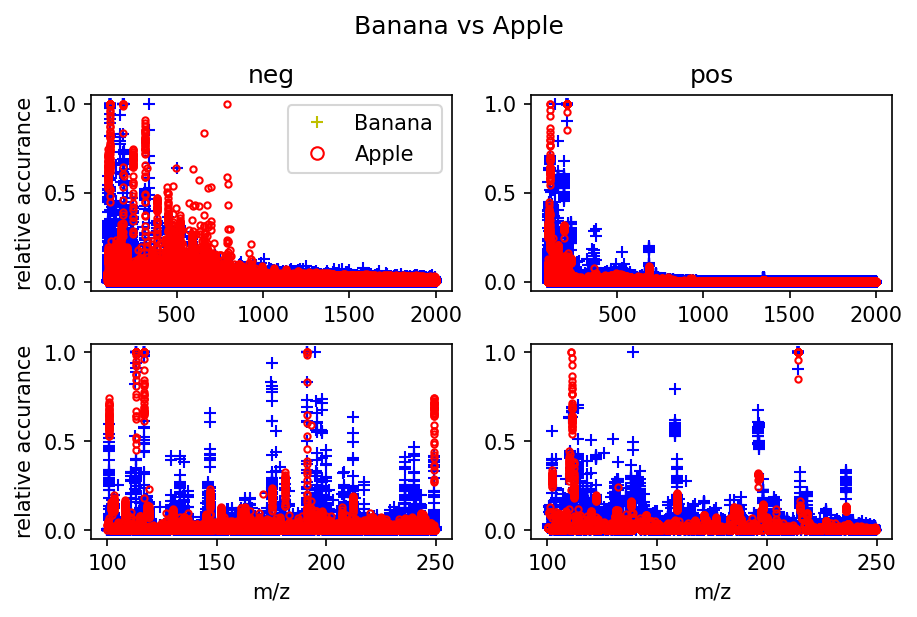

In [0]:
# The figures
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

fig,ax = filter_spectromass_plot(orig_data, idx_banana, idx_apple, cols_neg, cols_pos, mass_neg, mass_pos)

fig.suptitle('Banana vs Apple')

legend_elements = [Line2D([0], [0], marker='+', color='y',linestyle='none', label='Banana'),
                  Line2D([0], [0], marker='o', color='r', fillstyle='none', linestyle='none', label='Apple')]

ax[0,0].legend(handles = legend_elements, loc="upper right");  

fig.set_dpi(150)
plt.show()


### c) Anal samples or Oral samples for 'apple'

(19001,)


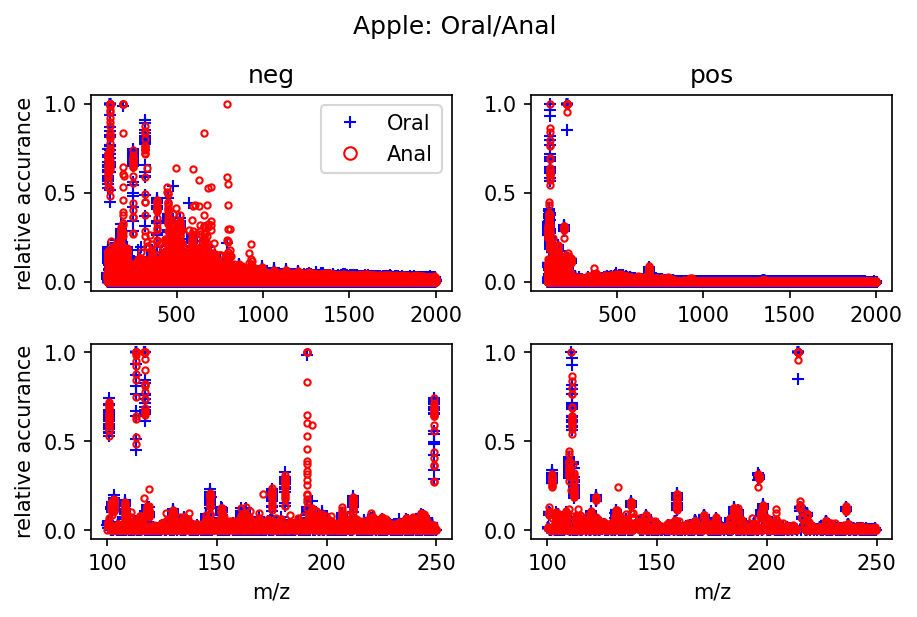

In [0]:
idxo= [a and b for a, b in zip(idx_apple, idx_oral)]
idxa= [a and b for a, b in zip(idx_apple, idx_anal)]

fig,ax = filter_spectromass_plot(orig_data, idxo, idxa, cols_neg, cols_pos, mass_neg, mass_pos, color_by=None)

fig.suptitle('Apple: Oral/Anal ')

legend_elements = [plt.Line2D([0], [0], marker='+', color='b',linestyle='none', label='Oral'),
                  plt.Line2D([0], [0], marker='o', color='r', fillstyle='none', linestyle='none', label='Anal')]
ax[0,0].legend(handles = legend_elements, loc="upper right");  

fig.set_dpi(150)
plt.show()

In the figure above, the differences betweeen anal and oral looks minor. 

### d) Individuals effects


In [0]:
def colored_spectromass_plot(df, idx1, cols_neg, cols_pos, mass_neg, mass_pos, color_by='xxx'):
  """data_frame: original dataframe/ interpolated
  idx1: the indices of the rows we want to plot
  group_by: the column by which we separate the subplots"""

  data_frame= df.copy()
  fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True); # nrows =unique(group_by)

  amp1_neg = data_frame.loc[idx1,cols_neg].to_numpy()
  amp1_pos = data_frame.loc[idx1,cols_pos].to_numpy()
  print(color_by)
  nrows = np.size(amp1_neg,axis=0)
  
  # zoom in
  z1_min = 100; z1_max = 250
  # z2_min = 180; z2_max = 230
  zoom_in = np.logical_and(mass_neg > z1_min , mass_neg < z1_max)  # np.arange(0,1500,1)
  zoom_in = zoom_in[0,:]

  
  # colors
  print(len(color_by))
  if color_by == 'xxx':
    colors = np.repeat('blue',len(amp1_neg), axis= 0)

  else:
    # colors = list( mcolors.CSS4_COLORS.keys()) # a list of 148 colors
    cc = list( mcolors.CSS4_COLORS.keys()) # a list of 148 colors
    categories = np.unique(data_frame[color_by])
    # print(categories)
    idx_c = np.linspace(10, len(cc)-10, len(categories)) #idx_c = np.linspace(10, len(colors)-10, len(categories))
    idx_c = np.floor(idx_c)
    idx_c = list(idx_c.astype(int))
    colors = [cc[n] for n in idx_c]
    # print('colors:', colors)
    colordict = dict(zip(categories, colors))  
    # data_frame["Color"] = data_frame[color_by].apply(lambda x: colordict[x])
    color_vec = [colordict[k] for k in data_frame.loc[idx1, color_by] ]
    # print('xC:', data_frame["Color"])
    # print('color_vec:', color_vec)

  # print('mass=', mass_neg[0,:])
  row_idx = np.arange(0,nrows,1)
  # print('rows-', row_idx)  
  # color_vec =['blue', 'red', 'red', 'green']

  for k in row_idx:
    # print(k)
    # print(color_vec[k])
    # plt.scatter(x[k], y[k], c=current_color); #, color=colors[k]
    # ax[0,0].plot(mass_neg[0,:], amp1_neg[k,:], color = colors[k])
    # print('ampk_k=',amp1_neg[k,:])
    ax[0,0].plot(mass_neg[0,:], amp1_neg[k,:], '.', color = color_vec[k]);
    ax[1,0].plot(mass_neg[0,zoom_in], amp1_neg[k,zoom_in], '.', color = color_vec[k]);

    ax[0,1].plot(mass_pos[0,:], amp1_pos[k,:], '.', color = color_vec[k]);
    ax[1,1].plot(mass_pos[0,zoom_in], amp1_neg[k,zoom_in], '.', color = color_vec[k]);

  ax[0,0].set_title('neg')
  ax[0,1].set_title('pos')
  ax[0,0].set_ylabel('relative accurance')
  ax[1,0].set_ylabel('relative accurance')
  ax[1,0].set_xlabel('m/z')
  ax[1,1].set_xlabel('m/z')

  return fig, ax

bat
3


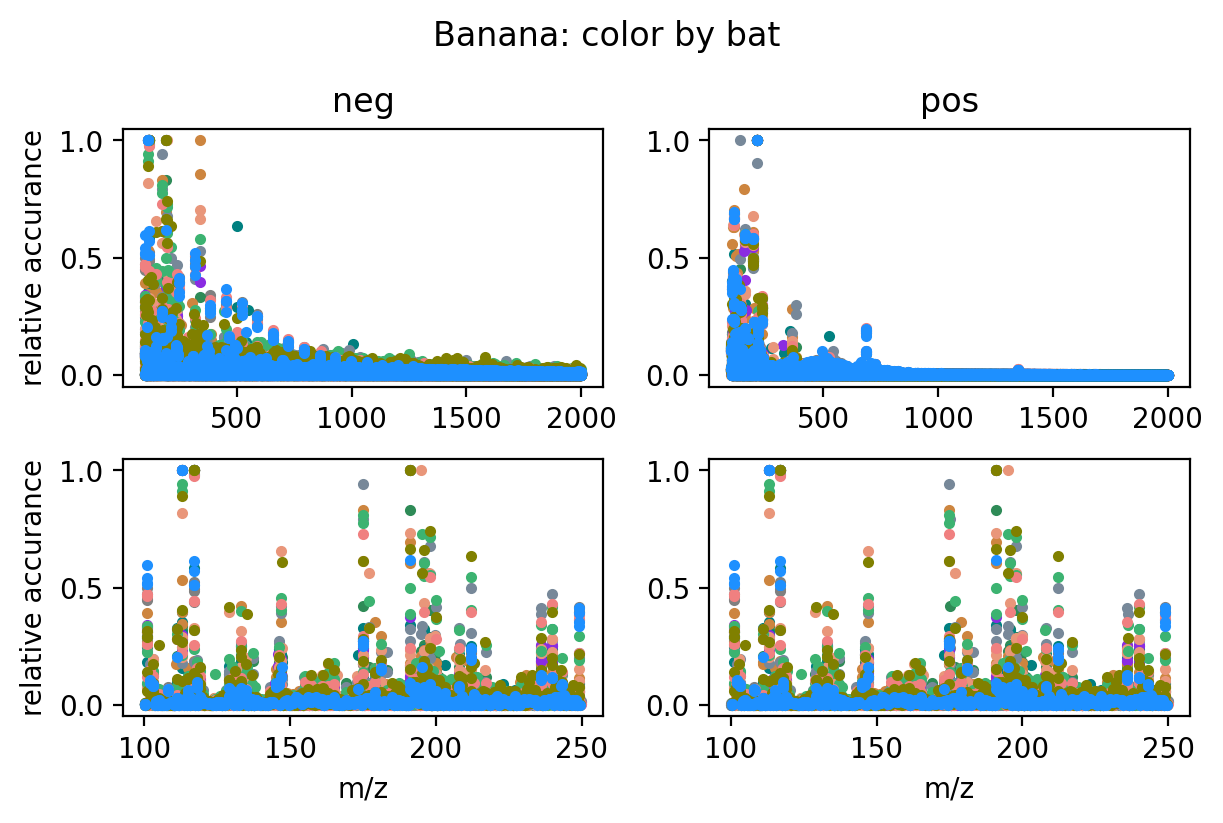

In [0]:
fig2, ax2 = colored_spectromass_plot(orig_data , idx_banana, cols_neg, cols_pos, mass_neg, mass_pos, color_by='bat') # color_by='bat'
fig2.suptitle('Banana: color by bat ')
fig2.set_dpi(200)
plt.show()

bat
3


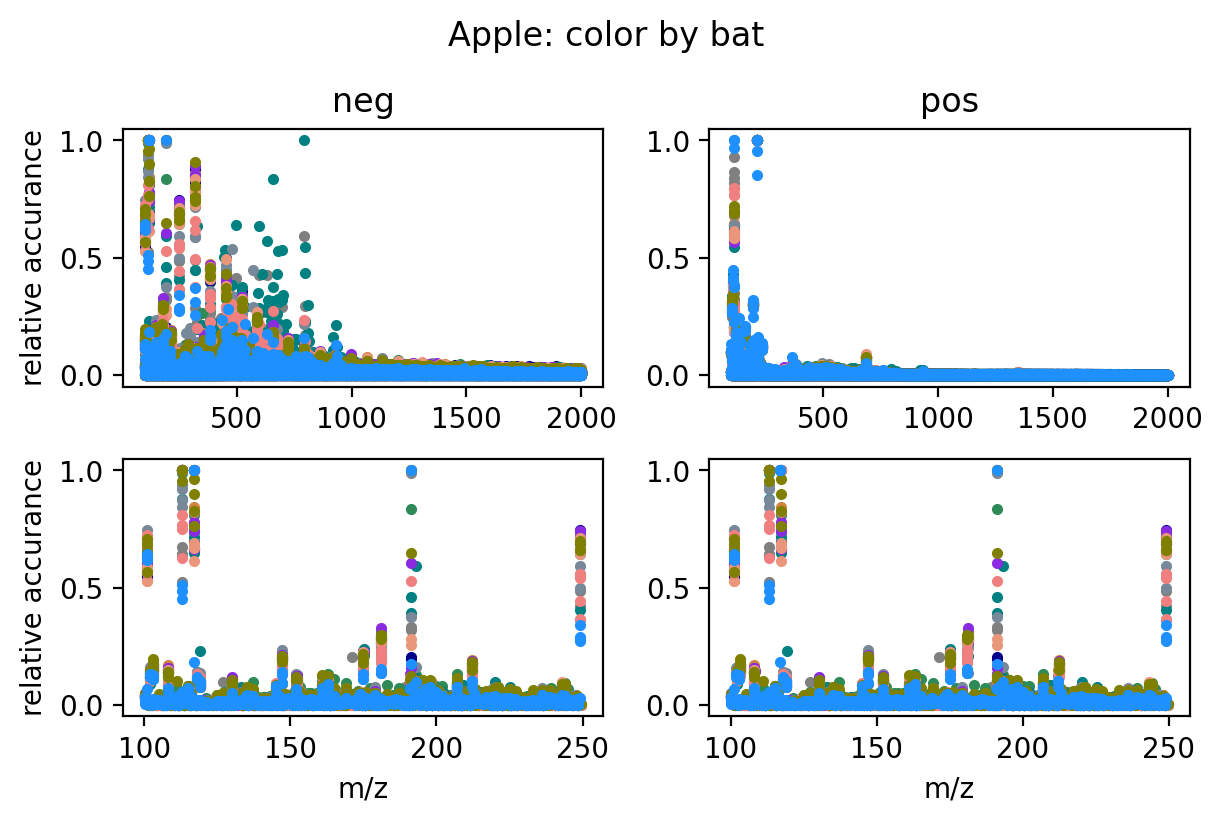

In [0]:
fig2, ax2 = colored_spectromass_plot(orig_data , idx_apple, cols_neg, cols_pos, mass_neg, mass_pos, color_by='bat') # color_by='bat'
fig2.suptitle('Apple: color by bat ')
fig2.set_dpi(200)
plt.show()

According to the figure above (for banana and apple), there is a large veriaty in the spectrograms between individuals.From this graph we conclude that the model should not be fitted to indivduals differences, i.e. the 'train-set' and 'test-set' will be separated by different bats.

## 3.5 Similarities - Person Correlations and Jackard Similarity

In this section we tested the similarities between each pair of the data, and then clustered the data in order to find the distance between the food components (banana/ apple) and the other controlled parameters.
 
We tried two similarity-parameters: the Pearson Coefficient and the
Jaccard Similarity Factor.
 
For each test we built a new data-frame with the score between each pair (nrow x nrow matrix). We also clustered the similarities according to the **'Nearest Point Algorithm'** in order to find out which parameter controls the similarities.


a) Pearson Correlation 
 
Calculate the correlation matrix between all pairs in the interpolated DataFrame
the result Cij is the Pearson coefficient between row i and row j


In [0]:
def my_corrcoeff(x,y):
  """Cross correlation function (Pearson coeficient between 2 rows)"""
  mx = np.mean(x)
  sigx = np.std(x)
  my = np.mean(y)
  sigy = np.std(y)
  return np.mean((x-mx)*(y-my) ) / (sigx*sigy)

# We dont use the built-in functions of numpy or scipy because both calculate and return numerous un-wanted values and we have a large dataset 

In [0]:
def pairdcorr_df(df_test, rel_cols):
  """ calculate the pearson correlation coef. pairwised along the relevant colloums (neg or pos) in dataframe
  return dataframe of the coorelation matrix"""
  l = len(df_test.index)
  corr_mat = np.zeros([l,l]) # init
  for k, rk in enumerate(df_test.index):
    x = df_test.loc[rk, rel_cols]
    # print(rk)
    for j, rj in enumerate(df_test.index):
            y=df_test.loc[rj, rel_cols]
            corr_mat[j,k] =  my_corrcoeff(x,y)

  corr_mat = pd.DataFrame(corr_mat, index=df_test.index, columns=df_test.index)
  return corr_mat

In [0]:
# Test One bat with negative spectro-mass
bat_num = 2
print('selected bat:', all_bats[bat_num])
df_test = interpolated_data.loc[(interpolated_data.bat==all_bats[bat_num])]
corr_mat = pairdcorr_df(df_test, cols_neg)

# add columns for data, Before as a food source
# colls_toplot = corr_mat.columns
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
corr_mat[colls_to_copy] = df_test[colls_to_copy]
# before_idx = df_test['sample_time'] == 'Before'
# corr_mat.loc[before_idx,'food'] = 'Before'

# corr_mat

selected bat: 12_Kai


In [0]:
corr_mat

,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,bat,food,sample_id,sample_time,oral/anal
106,1.000000,0.818966,0.446310,0.698416,0.807741,0.360691,0.410503,0.386910,0.844549,0.308629,0.339918,0.647355,0.356149,0.436310,0.807373,0.430976,0.380496,0.747649,12_Kai,Apple,YY20-176,After 8,Oral
107,0.818966,1.000000,0.488170,0.652962,0.750331,0.387670,0.463970,0.430522,0.833196,0.308082,0.348311,0.617701,0.379378,0.467039,0.776925,0.450964,0.397769,0.752395,12_Kai,Apple,YY20-174,After 5,Oral
108,0.446310,0.488170,1.000000,0.388780,0.409614,0.660575,0.769612,0.740107,0.517101,0.478907,0.538382,0.437199,0.551197,0.707608,0.481113,0.572811,0.609782,0.526012,12_Kai,Apple,YY20-120,Before,Oral
109,0.698416,0.652962,0.388780,1.000000,0.762591,0.346217,0.387352,0.378596,0.700280,0.285828,0.325388,0.767249,0.334870,0.405744,0.699081,0.478513,0.368495,0.710788,12_Kai,Apple,YY20-175,After 8,Anal
110,0.807741,0.750331,0.409614,0.762591,1.000000,0.356874,0.371522,0.359654,0.790100,0.366701,0.353594,0.730487,0.360193,0.421796,0.773817,0.422284,0.377660,0.744924,12_Kai,Apple,YY20-173,After 5,Anal
111,0.360691,0.387670,0.660575,0.346217,0.356874,1.000000,0.599781,0.599913,0.414595,0.491117,0.526550,0.424420,0.586955,0.599604,0.408394,0.510412,0.543790,0.425391,12_Kai,Apple,YY20-119,Before,Anal
112,0.410503,0.463970,0.769612,0.387352,0.371522,0.599781,1.000000,0.785214,0.442593,0.473110,0.526507,0.440965,0.558126,0.600133,0.433844,0.573997,0.501051,0.483651,12_Kai,Mix,YY20-248,After 8,Oral
113,0.386910,0.430522,0.740107,0.378596,0.359654,0.599913,0.785214,1.000000,0.411223,0.455910,0.526618,0.436509,0.570310,0.568225,0.420278,0.564076,0.487408,0.447883,12_Kai,Mix,YY20-246,After 5,Oral
114,0.844549,0.833196,0.517101,0.700280,0.790100,0.414595,0.442593,0.411223,1.000000,0.292419,0.346698,0.657290,0.376204,0.512956,0.793662,0.463740,0.450950,0.771667,12_Kai,Mix,YY20-200,Before,Oral
115,0.308629,0.308082,0.478907,0.285828,0.366701,0.491117,0.473110,0.455910,0.292419,1.000000,0.530013,0.436902,0.491833,0.459046,0.313012,0.426117,0.403311,0.339207,12_Kai,Mix,YY20-247,After 8,Anal


### a) Correlation heatmaps and clustering

In [0]:
def my_cor_heatmap(df, scale = 1):
  """ plot corr_mat clustered """
  colls_toplot = [val for val in df.columns if str(val).isnumeric() ]
  fig = plt.figure(figsize=(20,15))

  fig_size = (10*scale, 10*scale)
  
  # colors
  # labels1 = np.random.random_integers(0,5, size=len(df))
  # food:
  lut1 = {'Apple': 'r',
          'Banana': 'y',
          'Mix': 'm',
          'Before': 'k'
          }
  # print(lut1)
  cols_by_food = df['food'].map(lut1)
  labels2 = np.random.random_integers(0,20, size=len(df))
  lut2 = dict(zip(df['bat'].unique(), sns.hls_palette(len(set(labels2)), l=0.5, s=0.8)))
  # sample_time:
  lut3 = {'Before': 'black',
          'After 5': 'lightgray', 
          'After 8': 'dimgray'}
  # lut3 = dict(zip(df['sample_time'].unique(), sns.hls_palette(len(set(labels2)), l=0.5, s=0.8)))
  lut4 = dict(zip(df['oral/anal'].unique(), sns.hls_palette(len(set(labels2)), l=0.5, s=0.8)))
  cols_by_bat = df['bat'].map(lut2)
  cols_by_time = df['sample_time'].map(lut3)
  cols_by_oral = df['oral/anal'].map(lut4)
  
  row_cols = pd.concat([cols_by_food, cols_by_bat, cols_by_time, cols_by_oral], axis=1)
  # col_cols = pd.concat([cols_by_food, cols_by_bat, cols_by_time, cols_by_oral], axis=0)

  g = sns.clustermap(
      df[colls_toplot],
      cmap= 'OrRd',
      row_cluster=True,
      col_cluster=True, ##
      # linewidth=1,
      # xticklabels = df['food'], 
      # yticklabels = df['food'],
      figsize = fig_size,
      row_colors = row_cols
      # col_colors = col_cols
  )

  return fig, g #, ax

Figure: One Bat Negative Spectromass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


<Figure size 1440x1080 with 0 Axes>

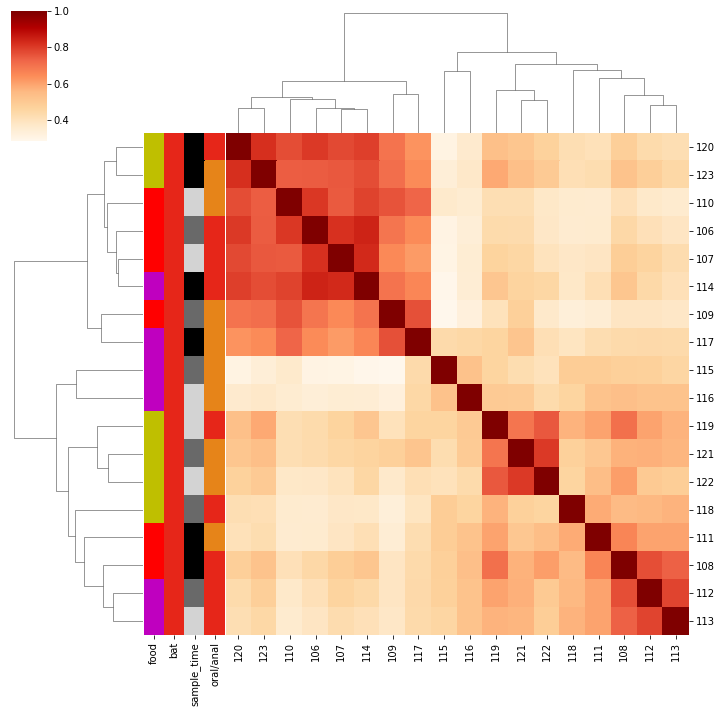

In [0]:
fig, g = my_cor_heatmap(corr_mat, scale=1)
fig.suptitle(['nagative_', all_bats[bat_num]])

ax=ax = g.ax_heatmap
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.show()

In the graph above (based on one bat with negative spectromass), we can see that there is a relatively good separation between 'banana' (yellow in the 'food' column) and 'apple'(red), but in the cases that the sample_time is 'Before' (black), the matrix sometimes clusters 'apple' and 'banana' together. 


Figure: One Bat Positive Spectromass

In [0]:
# posisive df
bat_num = 2
df_test = interpolated_data.loc[(interpolated_data.bat==all_bats[bat_num])]
corr_mat = pairdcorr_df(df_test, cols_pos)
# add coloumns
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
corr_mat[colls_to_copy] = df_test[colls_to_copy]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


<Figure size 1440x1080 with 0 Axes>

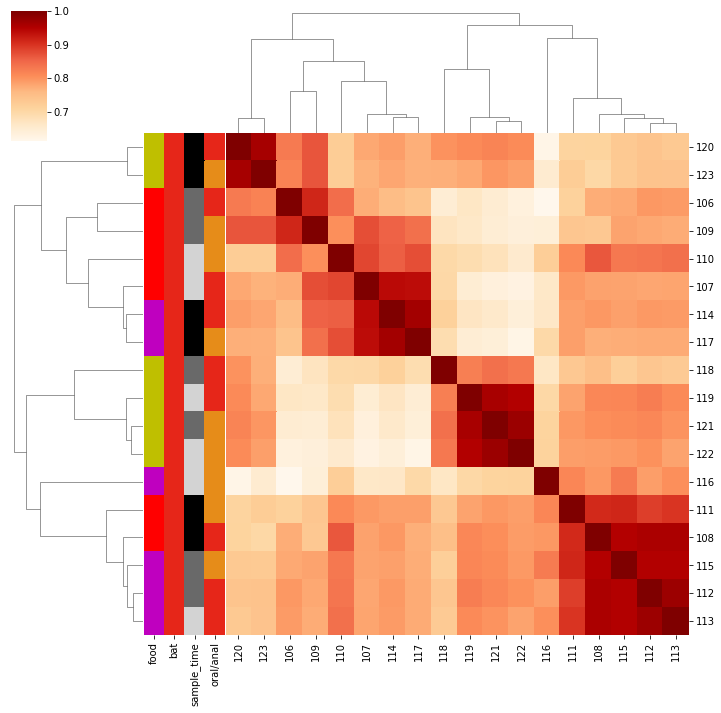

In [0]:
fig, g = my_cor_heatmap(corr_mat)
fig.suptitle(['Positive', all_bats[bat_num]])

ax=ax = g.ax_heatmap
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.show()

in the figure above (based on the same bat with positive spectromass) we can see similar relationship between the parameters as explained above.


Figure: One Bat, Negative, without the rows of sample_time == 'before'

In [0]:
# remove 'Before' rows and colums in similarity matrix

def rm_before(df):
  # find rows' index and drop
  # before_idx = df['sample_time'] == 'Before'
  # df_noBefore = df.drop(df[before_idx].index)
 
  # # drop equivalent columns 'Before'
  # ix = df[before_idx].index # in the df rows and cols have same names
  # print(ix)
  # df_noBefore.drop(df_noBefore[ix], axis=1,inplace= True)
  idx = np.where(df['sample_time'] == 'Before')[0]
  df_noBefore= df.drop(df.columns[idx], axis=1)
  df_noBefore = df_noBefore.drop(df.index[idx], axis=0)

  return df_noBefore

In [0]:
bat_num = 2
print('selected bat:', all_bats[bat_num])
df_test = interpolated_data.loc[(interpolated_data.bat==all_bats[bat_num])]
corr_mat = pairdcorr_df(df_test, cols_neg)
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
corr_mat[colls_to_copy] = df_test[colls_to_copy]

selected bat: 12_Kai


In [0]:
corr_mat_noBefore = rm_before(corr_mat)
corr_mat_noBefore

,106,107,109,110,112,113,115,116,118,119,121,122,bat,food,sample_id,sample_time,oral/anal
106,1.000000,0.818966,0.698416,0.807741,0.410503,0.386910,0.308629,0.339918,0.356149,0.436310,0.430976,0.380496,12_Kai,Apple,YY20-176,After 8,Oral
107,0.818966,1.000000,0.652962,0.750331,0.463970,0.430522,0.308082,0.348311,0.379378,0.467039,0.450964,0.397769,12_Kai,Apple,YY20-174,After 5,Oral
109,0.698416,0.652962,1.000000,0.762591,0.387352,0.378596,0.285828,0.325388,0.334870,0.405744,0.478513,0.368495,12_Kai,Apple,YY20-175,After 8,Anal
110,0.807741,0.750331,0.762591,1.000000,0.371522,0.359654,0.366701,0.353594,0.360193,0.421796,0.422284,0.377660,12_Kai,Apple,YY20-173,After 5,Anal
112,0.410503,0.463970,0.387352,0.371522,1.000000,0.785214,0.473110,0.526507,0.558126,0.600133,0.573997,0.501051,12_Kai,Mix,YY20-248,After 8,Oral
113,0.386910,0.430522,0.378596,0.359654,0.785214,1.000000,0.455910,0.526618,0.570310,0.568225,0.564076,0.487408,12_Kai,Mix,YY20-246,After 5,Oral
115,0.308629,0.308082,0.285828,0.366701,0.473110,0.455910,1.000000,0.530013,0.491833,0.459046,0.426117,0.403311,12_Kai,Mix,YY20-247,After 8,Anal
116,0.339918,0.348311,0.325388,0.353594,0.526507,0.526618,0.530013,1.000000,0.460723,0.498368,0.496137,0.434200,12_Kai,Mix,YY20-245,After 5,Anal
118,0.356149,0.379378,0.334870,0.360193,0.558126,0.570310,0.491833,0.460723,1.000000,0.568850,0.474854,0.459748,12_Kai,Banana,YY20-088,After 8,Oral
119,0.436310,0.467039,0.405744,0.421796,0.600133,0.568225,0.459046,0.498368,0.568850,1.000000,0.697246,0.752212,12_Kai,Banana,YY20-086,After 5,Oral


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


<Figure size 1440x1080 with 0 Axes>

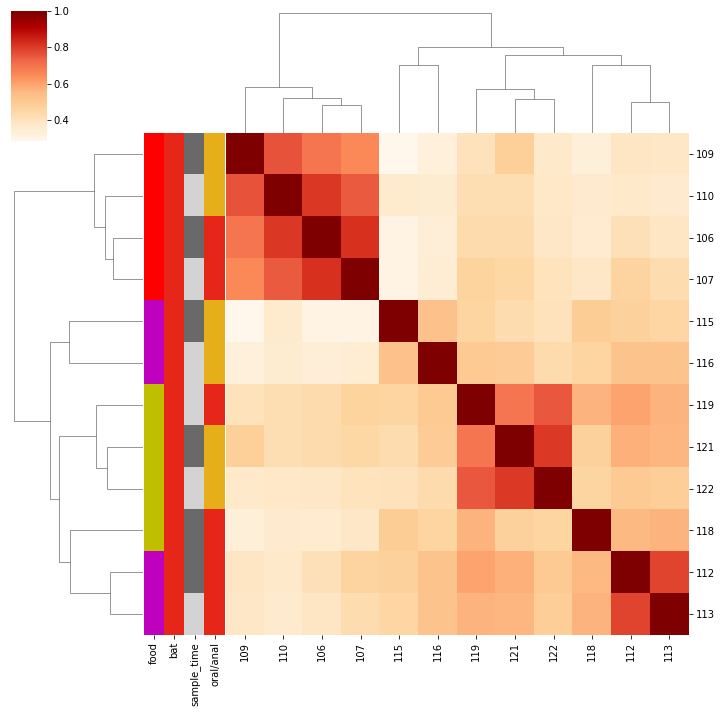

In [0]:
fig, g = my_cor_heatmap(corr_mat_noBefore)
fig.suptitle(['Negative No Bofore', all_bats[bat_num]])

ax=ax = g.ax_heatmap
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.show()

After removing the 'Before' we get a better discrimination between the food components. We don't observe a significant difference between Oral and Anal if the bats eat only banana or apple. But, oral and anal effects the 'mix' samples.
 

Correlation matrix of all bats - Output: Corr_mat_all 

**the calculations take an hour by colab**- output is saved as a csv file
 and **can be uploaded - 'correlation_full_data_0204'**

In [0]:
df_test = interpolated_data

In [0]:
# All Matrix Test (takes long time....~1hr)
df_test = interpolated_data
corr_mat_all = pairdcorr_df(df_test, cols_neg)
corr_mat_all[['bat','food','sample_id', 'oral/anal', 'sample_time']] = df_test[['bat','food','sample_id', 'oral/anal', 'sample_time']]
# before_idx = df_test['sample_time'] == 'Before'
# corr_mat.loc[before_idx,'food'] = 'Before'
corr_mat_all

In [0]:
## save corr_mat_all

array(['Apple', 'Banana', 'Mix'], dtype=object)

Upload from drive

In [0]:
corr_mat_all = pd.read_csv('/content/gdrive/My Drive/ML_bats_project/correlation_full_data_0204.csv')

Or upload from local disk

In [0]:
_# load the file:
# import file from local disk 
from google.colab import files

import io

uploaded = files.upload()
corr_mat_all = pd.read_csv(io.BytesIO(uploaded['correlation_full_data_0204.csv'])) # 


Saving correlation_full_data_0204.csv to correlation_full_data_0204 (3).csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1440x1080 with 0 Axes>

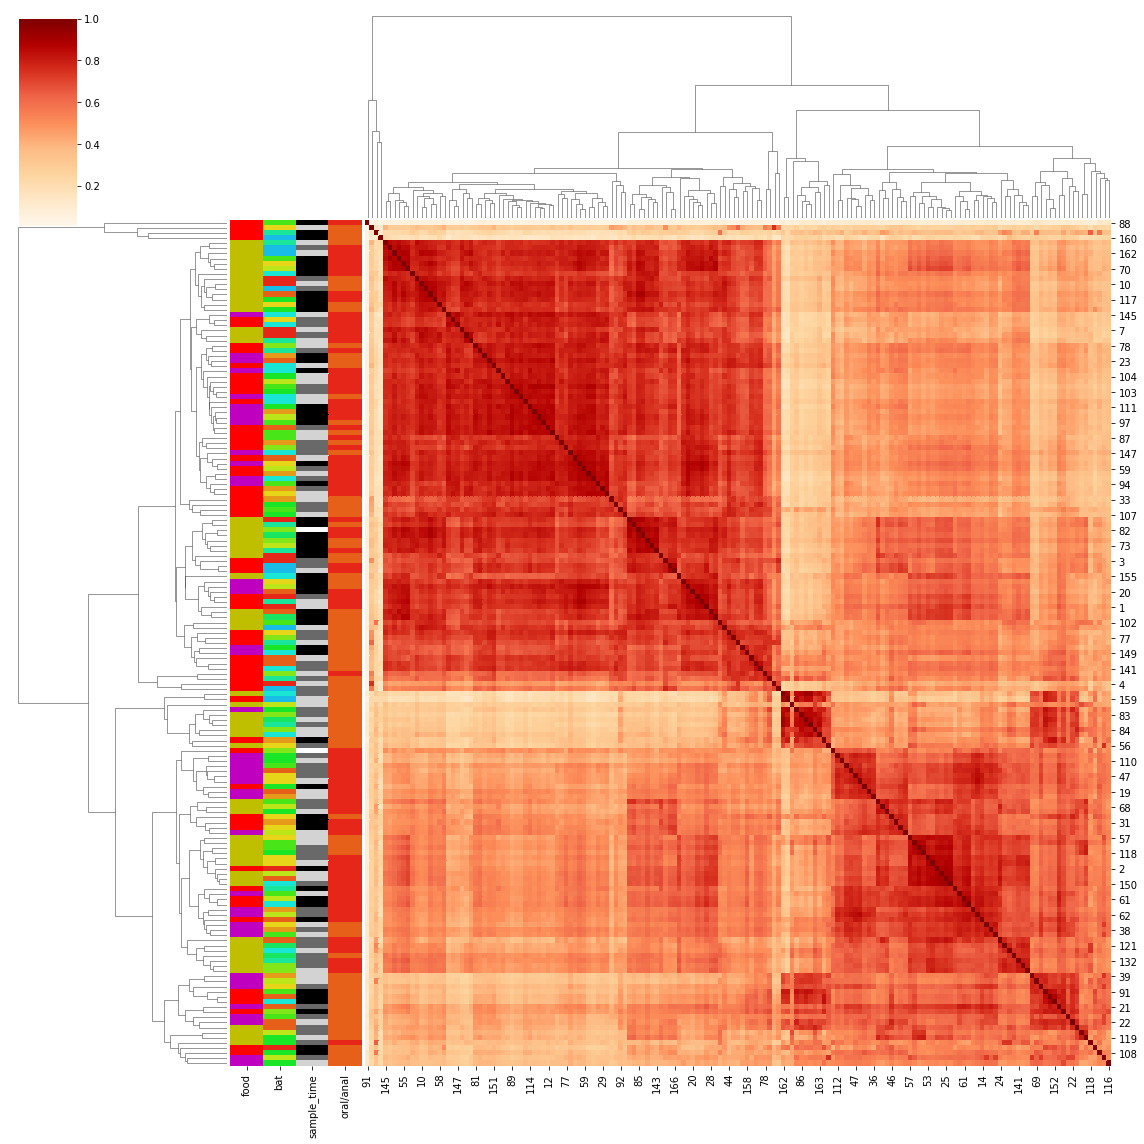

In [0]:
fig, g = my_cor_heatmap(corr_mat_all, scale = 1.6)
fig.suptitle(['nagative_', all_bats[bat_num]])
# conc_col = corr_mat['bat'] + '-' + corr_mat_all['food']

ax=ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.show()


A qualitative analysis of the figure above: We can see a highly correlated region at the upper left area of the plot. In this region we can see that most of the foods are apple (red) or mix (magenta), while the rows with bananas in this region are those that were taken before the feeding ('food' is black). Therefore, we executed another correlation without the 'before' sample. See next figure. 

Remove 'Before'

In [0]:
corr_mat_all = corr_mat_all.loc[:,corr_mat_all.columns[1:]]

In [0]:
corr_mat_all_noBefore =  rm_before(corr_mat_all)
corr_mat_all_noBefore

,0,1,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,29,30,32,33,35,36,38,39,41,42,44,45,47,48,50,51,53,54,56,57,59,...,118,119,121,122,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,159,160,162,163,165,166,167,168,170,171,172,173,bat,food,sample_id,oral/anal,sample_time
0,1.000000,0.881299,0.689328,0.467651,0.648515,0.673569,0.696620,0.725060,0.742156,0.826192,0.782330,0.667204,0.598336,0.567076,0.628662,0.473694,0.582099,0.721984,0.470652,0.764855,0.809667,0.779291,0.592046,0.651094,0.537251,0.665223,0.411520,0.701466,0.772623,0.764498,0.285829,0.589816,0.589347,0.494598,0.635603,0.711630,0.685420,0.413749,0.687867,0.851947,...,0.369549,0.530303,0.661527,0.466602,0.544622,0.570843,0.356952,0.781551,0.896634,0.598111,0.680840,0.626674,0.717821,0.298047,0.751037,0.688854,0.740646,0.779445,0.741916,0.798814,0.720073,0.786748,0.740622,0.720872,0.514233,0.245943,0.332915,0.750586,0.755239,0.577738,0.216445,0.784558,0.801718,0.719176,0.669830,2_Sasha,Apple,YY20-136,Oral,After 8
1,0.881299,1.000000,0.754302,0.524645,0.659121,0.674193,0.677658,0.717532,0.764031,0.828875,0.747442,0.677361,0.603680,0.592097,0.655851,0.522426,0.610589,0.760312,0.515978,0.781385,0.802649,0.783183,0.597102,0.656376,0.568102,0.672998,0.430015,0.699538,0.790097,0.752865,0.318241,0.616475,0.619189,0.498430,0.645988,0.710447,0.681760,0.422518,0.691094,0.845380,...,0.387595,0.601258,0.688532,0.526307,0.545689,0.584850,0.351780,0.809009,0.885980,0.617112,0.711405,0.616551,0.721916,0.310099,0.726185,0.704525,0.762767,0.778712,0.753296,0.775537,0.726153,0.780472,0.736867,0.751141,0.535452,0.245554,0.338139,0.831406,0.827158,0.648820,0.235632,0.757204,0.796410,0.722092,0.681932,2_Sasha,Apple,YY20-134,Oral,After 5
3,0.689328,0.754302,1.000000,0.681674,0.620872,0.652244,0.690951,0.712170,0.704408,0.684838,0.662035,0.675582,0.455765,0.542037,0.553863,0.548698,0.458111,0.597816,0.532468,0.632418,0.666206,0.683377,0.641010,0.539982,0.519874,0.529144,0.412001,0.622291,0.645670,0.730825,0.501068,0.495374,0.522451,0.431313,0.526003,0.525375,0.513020,0.389532,0.527979,0.679274,...,0.374313,0.608487,0.558917,0.551399,0.454228,0.498293,0.349917,0.757464,0.696438,0.678588,0.787033,0.497686,0.626784,0.348112,0.679052,0.619516,0.709325,0.701882,0.760758,0.657697,0.668850,0.693619,0.690817,0.596938,0.469685,0.255306,0.378817,0.814942,0.814597,0.782423,0.276826,0.643665,0.684701,0.705924,0.735257,2_Sasha,Apple,YY20-135,Anal,After 8
4,0.467651,0.524645,0.681674,1.000000,0.401019,0.434826,0.472294,0.477324,0.467828,0.454213,0.470749,0.514984,0.355982,0.420481,0.451046,0.455137,0.337644,0.437091,0.431279,0.402828,0.456569,0.440692,0.530199,0.435917,0.413172,0.426470,0.362969,0.424431,0.442105,0.590172,0.751491,0.412863,0.423745,0.363206,0.418566,0.395626,0.383171,0.349580,0.395688,0.462325,...,0.280453,0.470906,0.407616,0.421182,0.350081,0.388294,0.306682,0.506349,0.474342,0.606405,0.753452,0.365469,0.405602,0.312646,0.499337,0.415040,0.491972,0.494498,0.545549,0.438571,0.440932,0.473533,0.467560,0.439480,0.367273,0.243892,0.329291,0.573111,0.562689,0.708809,0.284030,0.435024,0.449921,0.467055,0.515521,2_Sasha,Apple,YY20-133,Anal,After 5
6,0.648515,0.659121,0.620872,0.401019,1.000000,0.811874,0.787851,0.864258,0.818167,0.750491,0.647829,0.660556,0.361764,0.424696,0.357403,0.338267,0.380291,0.468167,0.371931,0.816670,0.812347,0.720036,0.672400,0.426234,0.406952,0.432374,0.243584,0.799619,0.825659,0.728028,0.280625,0.388197,0.381347,0.300470,0.367612,0.461337,0.446100,0.227731,0.421519,0.776515,...,0.388770,0.428487,0.411984,0.369815,0.469043,0.520373,0.246594,0.711229,0.705487,0.493474,0.620810,0.543325,0.867109,0.255748,0.775421,0.793294,0.769671,0.642185,0.749809,0.824144,0.780430,0.779443,0.821474,0.456098,0.461041,0.167481,0.345519,0.652013,0.625487,0.479176,0.135745,0.776580,0.839028,0.841000,0.758602,2_Sasha,Banana,YY20-048,Oral,After 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1440x1080 with 0 Axes>

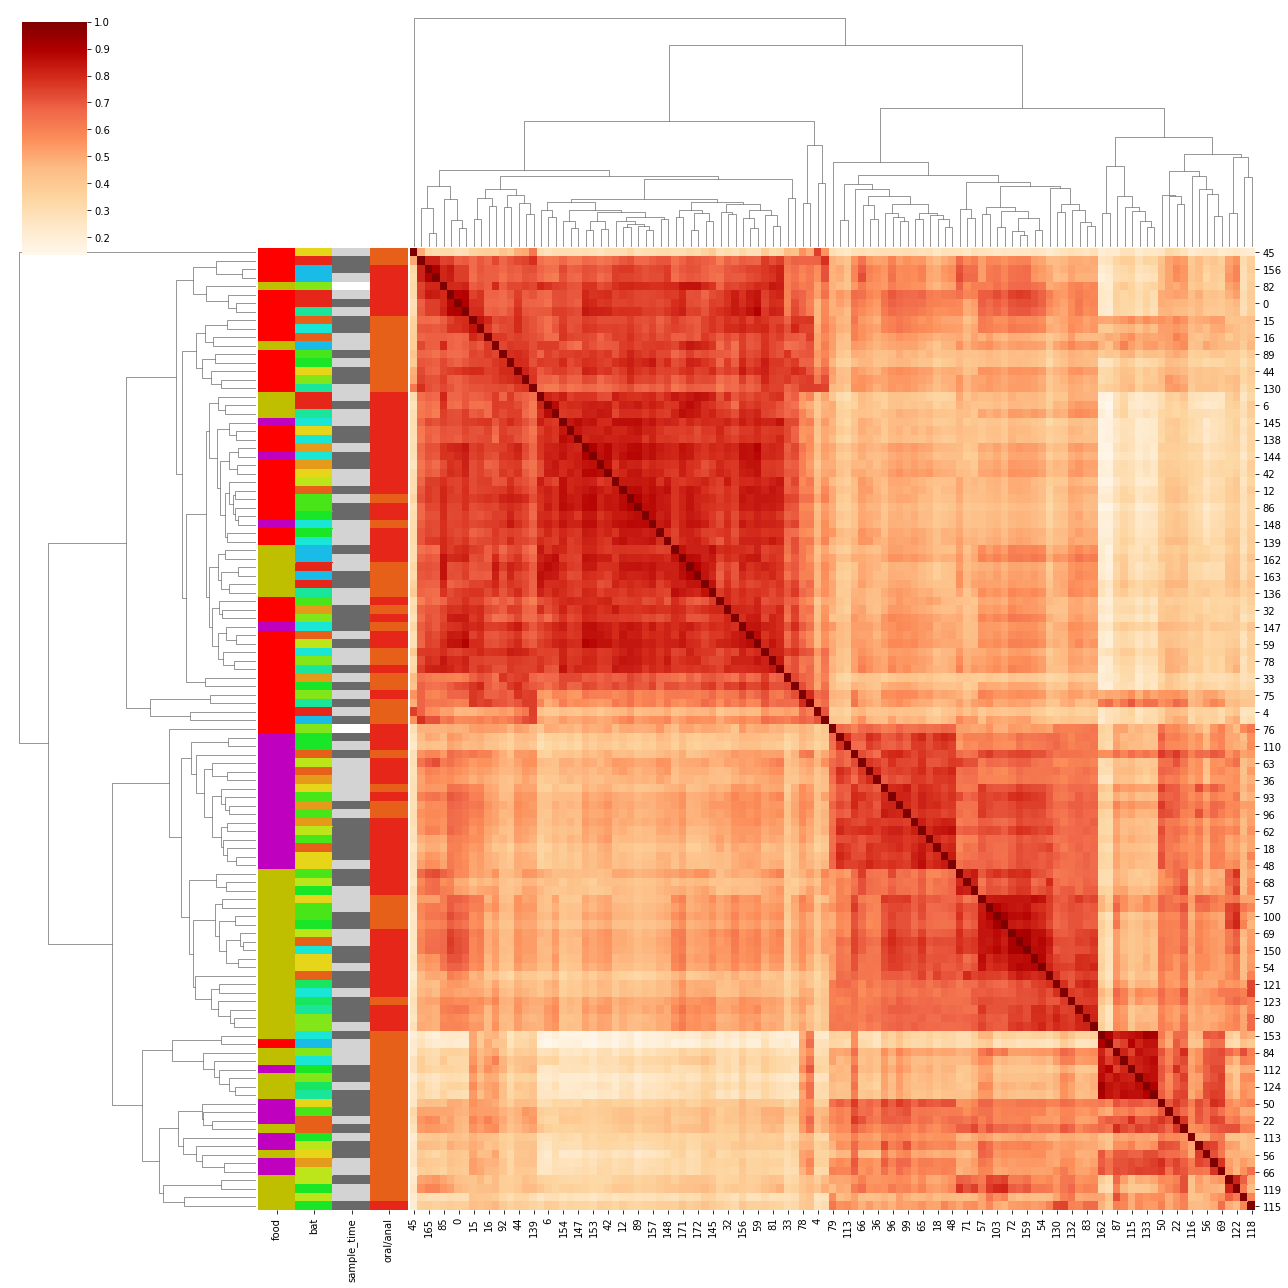

In [0]:
fig, g = my_cor_heatmap(corr_mat_all_noBefore, scale = 1.8)
fig.suptitle(['nagative_', all_bats[bat_num]])
# conc_col = corr_mat['bat'] + '-' + corr_mat_all['food']

ax=ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.show()


Without the samples that were taken before the feedings, we can see a relatively good separation between banana and apple. This can indicate that the relation between the spectromass and the food component is sensitive to the sample time. According to this figure, we suspect that using the correlations between the pairs as a discrimation factor will be less efficient than the full vectors. 
We can also see that other parameters have small effects on the clustering, compared to food.

###b) Check similarity of prominent peaks using Jaccard Similarity

In this test we examine the similarity between par-rows in the **Original** data (not interpolated), using Jaccard Similarity method. First, we find location of the prominent peaks in the spectromass (n_peaks=40 largest values). The location is the m/z value (x-axis)of the spectromass. the similarity index is defined as the number of elements in the confined group, divided by the total number of elements in the unified group **[ Index = AnB / AuB ]**.
 
We used this index with threshold between the rows, to decrease measurement variances. Two peaks from different rows are considered to be the same if the distance between them is lower than th =0.2 (m/z). 


Func : Find the prominent peaks of the original data!

In [0]:
def my_mainpeaks(df, irow, rel_cols, th, method = 'k_largest'):
  """Returns:  peaks_mz- the m/z numeric where values > th
          vals - the values of the peaks
  Inputs: df - the datafrma(original)
          irow- the index of the row to calucte
          th - threshold (0.1 for 'above_th'
                          40 for 'k_largest')
          method = 'k_largest' (default) or above_th"""

  if method == 'k_largest':
    x = df.loc[irow, rel_cols].to_numpy()
    # remove nan elelments
    ix_notnan = ~np.isnan(x.astype(float))
    x = x[ix_notnan] # boolean
    cols_notnan = [k for (k, cond) in zip(rel_cols, ix_notnan) if cond]                     
    # apply the method  
    ixx =np.argpartition(x, len(x)- th)[-th:]
    vals= x[ixx]
    colx = [cols_notnan[j] for j in ixx]
    # print('colx:', colx, '\n', 'total = ', np.size(colx))
  elif method == 'above_th':  
    ix = df.loc[irow, rel_cols] >th # a Boolean array
    colx =[rel_cols[index] for index,val in enumerate(ix) if val] # the names of the coloumns
    vals = df.loc[irow,colx] #.to_numpy() # the vlaues of the peaks (amp)

  # parsing the colloum names for numeric values
  peaks_mz=[]
  for item in colx:
    result = re.findall("\d+\.\d+",str(item))
    peaks_mz.append(float(result[0]))
  peaks_mz = np.asarray(peaks_mz)
  peaks_mz = np.reshape(peaks_mz, (1,len(colx)))
  vals =  np.asarray(vals)
  vals = np.reshape(vals, (1,len(colx)))
  return peaks_mz, vals, colx

Func : Calculates the similarity between two arrays 

In [0]:
def jaccard_similarty(a,b,th):
  """calculates the similarity between the arrays (a,b) with tolerance (th)
  jaccard_similarty = {A n B} / {A u B}""" 

  diffs = np.abs(a[:,None] - b)
  ia, ib = np.nonzero(diffs < th) # indices of common elements in a,b
  num_com_ina = len(np.unique(ia)) # number of common elents in each array
  num_com_inb = len(np.unique(ib))

  # The number of different common elemnets (with tolerance)
  tot_com = 1
  for k in np.arange(1,len(ia)):
    tot_com = np.sum([tot_com,
                      (ia[k]!=ia[k-1]) & (ib[k]!=ib[k-1]).astype(int)])
 
 # The number of different elements in the unified array  
  tot_unite = (tot_com + 
      len(a) - num_com_ina +
      len(b) - num_com_inb    
      )

  return tot_com/ tot_unite


Func : Returns pairwised similarity coeffs for dataframe 

In [0]:
def paired_sim_df(df_test, jac_th):
  """ apply the similarity coefficient on the dataframe: pairedwise
  output:   DatFrame withsimilrtity results pairwised between each two rowa
  input:    df_test- a dataframe after the detction of prominent peaks
  jac_th - peaks in deffernt rows with distance below the 'jac_th' are considered one peak"""

  l = len(df_test.index)
  paired_sim = np.zeros([l,l]) # init
  
  for k, rk in enumerate(df_test.index):
    a = peaks_results.loc[rk,'peaks'][0,:]
    for j, rj in enumerate(df_test.index):
            b = peaks_results.loc[rj,'peaks'][0,:]
            paired_sim[j,k] =  jaccard_similarty(a, b, jac_th)

  # convert to DataFrame
  paired_sim = pd.DataFrame(paired_sim, index=df_test.index, columns=df_test.index)
  return paired_sim

Similarity *TEST* for one *bat*

In [0]:
bat_num = 2
df_test = orig_data.loc[(orig_data.bat==all_bats[bat_num])]

In [0]:
# add peaks to dataframe
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
peaks_results = df_test.loc[:,colls_to_copy].copy()
# apply before to food
# before_idx = df_test['sample_time'] == 'Before'
# peaks_results.loc[before_idx,'food'] = 'Before'

peaks_results.loc[:,'peaks'] = ""
peaks_results.loc[:,'peak_vals'] = ""

th_peaks= 40
for r in peaks_results.index:
  peaks_mz, vals, colx = my_mainpeaks(df_test, r, cols_neg, th_peaks, method='k_largest')
  peaks_results.loc[r, 'peaks'] = peaks_mz
  peaks_results.loc[r, 'peak_vals'] = vals

peaks_results


,bat,food,sample_id,sample_time,oral/anal,peaks,peak_vals
106,12_Kai,Apple,YY20-176,After 8,Oral,"[[683.0, 118.0, 479.1, 307.0, 207.0, 369.1, 16...","[[0.07381672597864769, 0.07427046263345195, 0...."
107,12_Kai,Apple,YY20-174,After 5,Oral,"[[243.1, 275.1, 369.1, 683.1, 929.1, 307.0, 19...","[[0.0789483227561196, 0.07961922030825015, 0.0..."
108,12_Kai,Apple,YY20-120,Before,Oral,"[[179.0, 145.0, 594.8, 135.0, 485.0, 236.0, 10...","[[0.10429616087751367, 0.1078610603290676, 0.1..."
109,12_Kai,Apple,YY20-175,After 8,Anal,"[[508.5, 119.0, 571.5, 288.1, 311.1, 424.1, 46...","[[0.10454545454545458, 0.10464015151515155, 0...."
110,12_Kai,Apple,YY20-173,After 5,Anal,"[[547.1, 712.9, 481.5, 118.0, 119.0, 311.2, 47...","[[0.08830018083182647, 0.08868896925858959, 0...."
111,12_Kai,Apple,YY20-119,Before,Anal,"[[351.1, 169.1, 172.1, 503.2, 411.1, 517.3, 23...","[[0.10880733944954124, 0.11137614678899077, 0...."
112,12_Kai,Mix,YY20-248,After 8,Oral,"[[135.0, 187.0, 595.0, 348.9, 224.0, 293.0, 10...","[[0.17265390093369215, 0.17850925779395485, 0...."
113,12_Kai,Mix,YY20-246,After 5,Oral,"[[368.0, 601.8, 177.0, 444.0, 333.0, 310.9, 23...","[[0.1782512858192505, 0.1791329904481998, 0.17..."
114,12_Kai,Mix,YY20-200,Before,Oral,"[[130.0, 145.0, 547.0, 479.0, 119.0, 343.0, 19...","[[0.08686222222222219, 0.0881333333333333, 0.0..."
115,12_Kai,Mix,YY20-247,After 8,Anal,"[[598.2, 533.3, 181.1, 333.1, 695.5, 179.1, 30...","[[0.042800000000000005, 0.04304000000000001, 0..."


In [0]:
# calcultae for all dataframe one bat
jac_th = 0.15
paired_sim_test =  paired_sim_df(peaks_results, jac_th)
results_onebat = pd.concat([ paired_sim_test, peaks_results ], axis=1, join='outer')
# results_onebat = pd.concat([peaks_results, paired_sim_test], axis=1, join='outer')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


<Figure size 4000x3000 with 0 Axes>

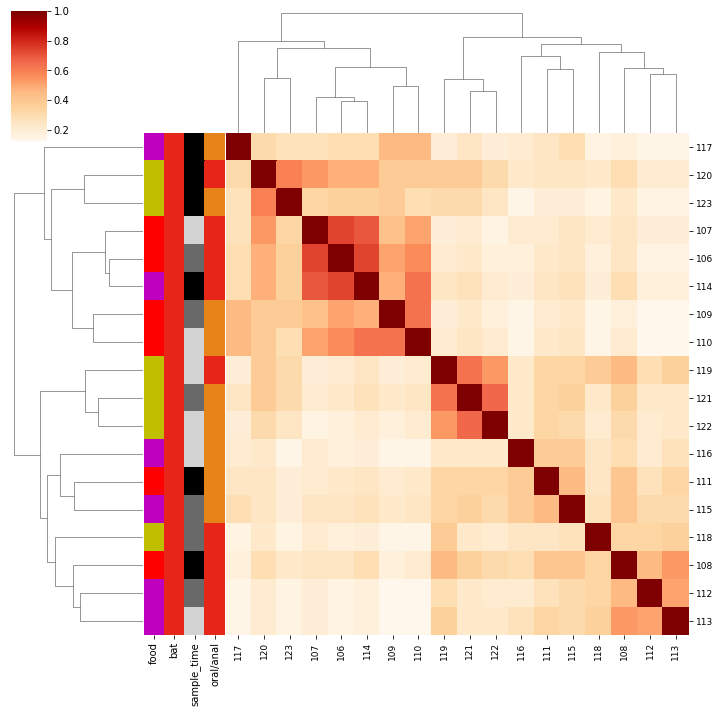

In [0]:
# plot clustered similartiy matrix 
fig, g = my_cor_heatmap(results_onebat )
fig.suptitle(['Similarty', all_bats[bat_num]])
conc_col = results_onebat['bat'] + '-' + results_onebat['food']

ax=ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=9)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)
fig.set_dpi(200)
plt.show()

Without 'before'

In [0]:
np.shape(results_onebat)

(18, 25)

In [0]:
results_onebat_noBefore =  rm_before(results_onebat)


In [0]:
np.shape(results_onebat_noBefore)

(12, 19)

In [0]:
before_idx = df_test['sample_time'] == 'Before'
results_onebat_noBefore = results_onebat.drop(results_onebat[before_idx].index)
results_onebat_noBefore['sample_time'].unique()

array(['After 8', 'After 5'], dtype=object)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


<Figure size 4000x3000 with 0 Axes>

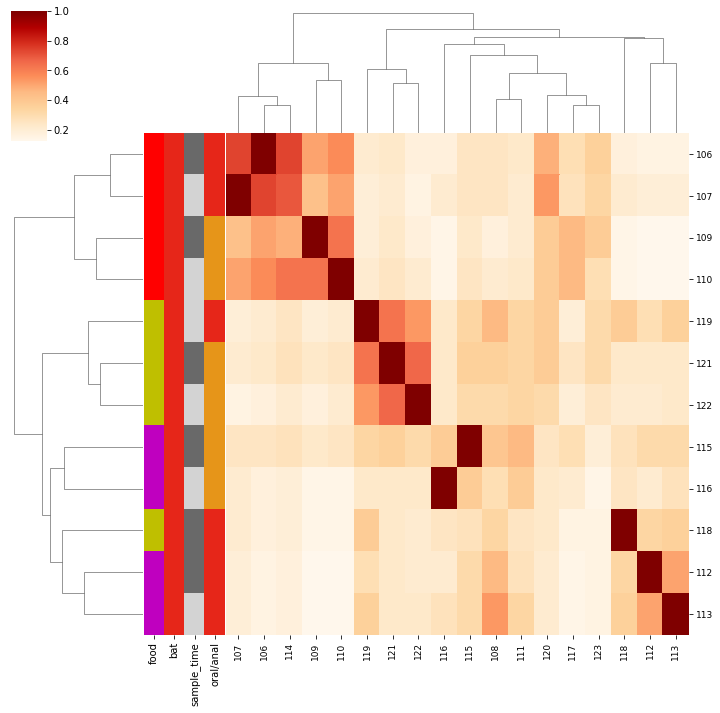

In [0]:
# plot clustered similartiy matrix 
fig, g = my_cor_heatmap(results_onebat_noBefore )
fig.suptitle(['Similarty', all_bats[bat_num]])
conc_col = results_onebat['bat'] + '-' + results_onebat['food']

ax=ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
ax.tick_params(axis="x", labelsize=9)
ax.tick_params(axis="y", labelsize=9)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)
fig.set_dpi(200)
plt.show()

We can see a good discrimination between the 'apple' and ('banana' and 'mix'). Compare to the correlation figures above.

Similarity *TEST* for all bats

In [0]:
df_test = orig_data
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
peaks_results = df_test.loc[:,colls_to_copy].copy()
# apply before to food
# before_idx = df_test['sample_time'] == 'Before'
# peaks_results.loc[before_idx,'food'] = 'Before'

peaks_results.loc[:,'peaks'] = ""
peaks_results.loc[:,'peak_vals'] = ""

th_peaks= 40
for r in peaks_results.index:
  peaks_mz, vals, colx = my_mainpeaks(df_test, r, cols_neg, th_peaks, method='k_largest')
  peaks_results.loc[r, 'peaks'] = peaks_mz
  peaks_results.loc[r, 'peak_vals'] = vals


In [0]:
peaks_results

,bat,food,sample_id,sample_time,oral/anal,peaks,peak_vals
0,2_Sasha,Apple,YY20-136,After 8,Oral,"[[750.9, 311.1, 424.1, 160.9, 433.5, 162.9, 35...","[[0.07236315086782372, 0.07436582109479302, 0...."
1,2_Sasha,Apple,YY20-134,After 5,Oral,"[[353.0, 725.1, 329.0, 289.0, 311.1, 328.0, 16...","[[0.06357845975680375, 0.06381007527504347, 0...."
2,2_Sasha,Apple,YY20-100,Before,Oral,"[[380.0, 425.0, 240.9, 453.1, 115.0, 162.9, 21...","[[0.049935414424111986, 0.05306243272335849, 0..."
3,2_Sasha,Apple,YY20-135,After 8,Anal,"[[506.5, 466.4, 609.6, 288.1, 329.0, 492.0, 57...","[[0.07556480380499404, 0.07919143876337692, 0...."
4,2_Sasha,Apple,YY20-133,After 5,Anal,"[[501.5, 634.6, 659.5, 658.5, 663.6, 700.6, 69...","[[0.14094572810317044, 0.1473401397098335, 0.1..."
...,...,...,...,...,...,...,...
169,1_Vova,Apple,YY20-097,Before,Anal,"[[699.1, 729.2, 423.5, 576.6, 101.9, 218.9, 66...","[[0.023700075357950268, 0.024058025621703092, ..."
170,1_Vova,Banana,YY20-044,After 8,Oral,"[[560.1, 108.0, 191.1, 424.1, 195.9, 118.0, 19...","[[0.060167525773195916, 0.06304768041237117, 0..."
171,1_Vova,Banana,YY20-042,After 5,Oral,"[[108.0, 628.1, 208.0, 424.0, 466.5, 560.1, 19...","[[0.06904441453566626, 0.0710632570659489, 0.0..."
172,1_Vova,Banana,YY20-043,After 8,Anal,"[[628.1, 311.1, 196.0, 492.5, 197.9, 424.1, 59...","[[0.06300325732899016, 0.06592833876221492, 0...."


In [0]:
jac_th = 0.15
paired_sim_test =  paired_sim_df(peaks_results, jac_th)
results_all = pd.concat([ paired_sim_test, peaks_results ], axis=1, join='outer')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 12000x9000 with 0 Axes>

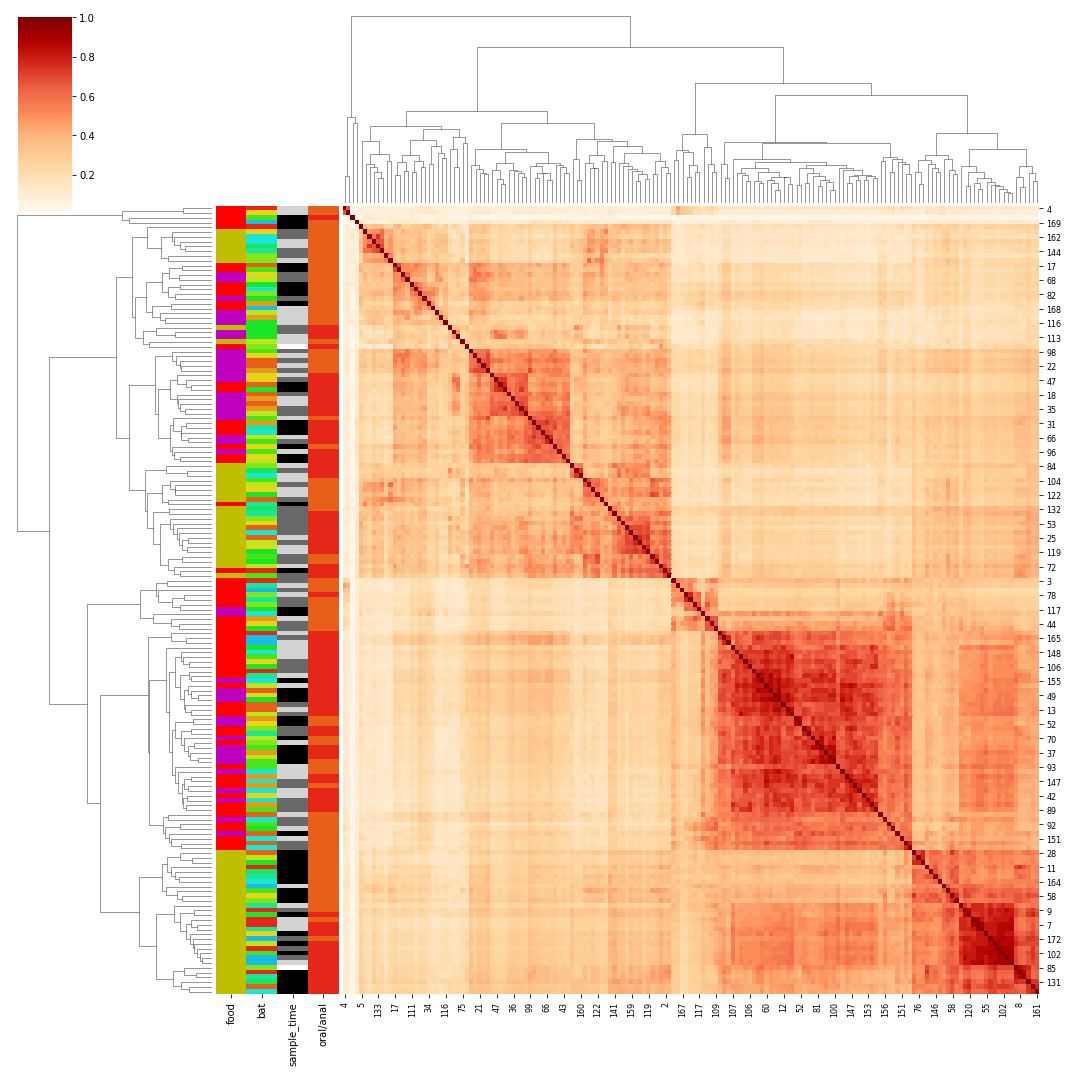

In [0]:
#  plot clustered similartiy matrix 
fig, g = my_cor_heatmap(results_all, scale=1.5 );
fig.suptitle(['Similarty', all_bats[bat_num]])
# conc_col = results_all['bat'] + '-' + results_all['food']

ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)
# fig.set_size_inches(6,4)
# plt.rcParams['figure.figsize'] = [12, 8]
fig.set_dpi(600)
plt.show()

Compare similarity - without 'before'

In [0]:
results_all_noBefore =  rm_before(results_all)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 12000x9000 with 0 Axes>

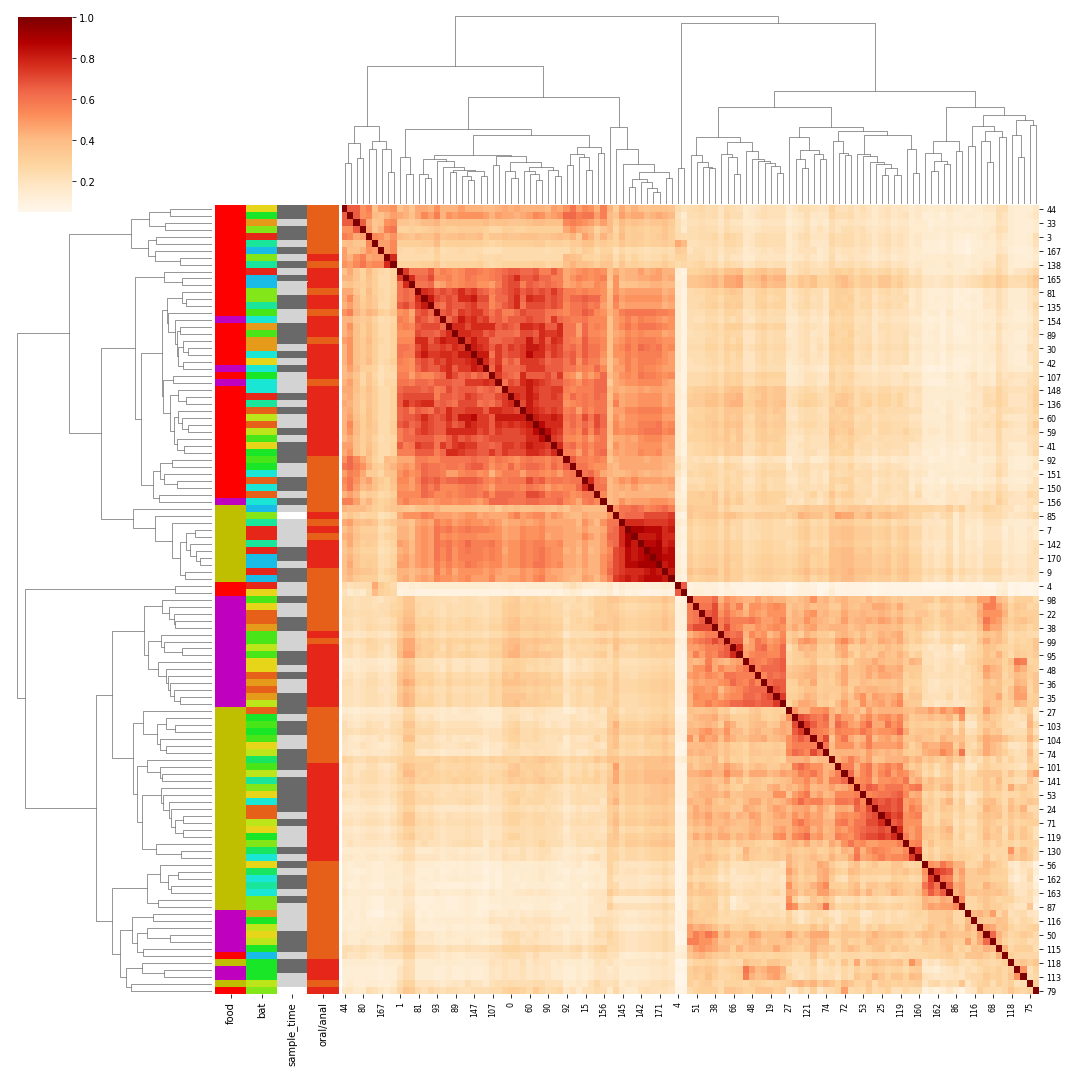

In [0]:
fig, g = my_cor_heatmap(results_all_noBefore, scale=1.5 );
fig.suptitle(['Similarty', all_bats[bat_num]])
# conc_col = results_all['bat'] + '-' + results_all['food']

ax = g.ax_heatmap
# ax.set_xticklabels(conc_col)
# ax.set_yticklabels(conc_col)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.setp(ax.get_yticklabels(), rotation=0)
# fig.set_size_inches(6,4)
# plt.rcParams['figure.figsize'] = [12, 8]
fig.set_dpi(600)
plt.show()

# No Before

We can see that using only a vector of the 40 prominent peaks can achieve a good separation between apple and bananas.

# 4. Model Performance

We compared between the performance of 3 models:
 
1) L1 Regulated Logistic Regression executed on the interpolated data
 
2) PCA and logistic regression
 
3) Logistic regression executed on the correlations between the food components and the sample from bats


##4.1 Logistic Regression

In [0]:
#prepare fetatures
def clean_fetatures(interpolated_data):
  """remove unnecessary columns """
  all_features = interpolated_data.copy()
  apple = interpolated_data['food']=='Apple'
  banana = interpolated_data['food']=='Banana'
  mix = interpolated_data['food']=='Mix'
  features = all_features.copy().loc[apple | banana | mix]
  features.drop(['oral/anal', 'sample_id'], axis=1, inplace=True)
  return features

features = clean_fetatures(interpolated_data) 

In [0]:
features

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.1,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_time
0,0,2_Sasha,Apple,0.000020,0.000020,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,...,0.000805,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755,After 8
1,0,2_Sasha,Apple,0.000017,0.000017,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,...,0.000456,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352,After 5
2,0,2_Sasha,Apple,0.000016,0.002653,0.004850,0.008865,0.016205,0.029621,0.054144,0.098970,0.180907,0.330678,0.007485,0.007836,0.006777,0.005860,0.005068,0.004383,0.003790,0.003278,0.004174,0.005315,0.006767,0.008617,0.010973,0.013972,0.012822,0.011767,0.010799,0.009910,0.009095,0.008346,0.007659,0.007029,0.007022,0.007015,0.007007,0.007000,0.006993,...,0.000445,0.000425,0.000406,0.000310,0.000237,0.000182,0.000139,0.000106,0.000081,0.000119,0.000174,0.000255,0.000374,0.000548,0.000804,0.000694,0.000599,0.000518,0.000447,0.000386,0.000334,0.000288,0.000266,0.000246,0.000228,0.000211,0.000195,0.000180,0.000167,0.000168,0.000170,0.000171,0.000173,0.000175,0.000176,0.000178,0.000216,0.000263,0.000319,Before
3,0,2_Sasha,Apple,0.000018,0.000018,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,...,0.000713,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475,After 8
4,0,2_Sasha,Apple,0.000016,0.000016,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.0144

### a) Question 1: Apple or Banana?

We train the model to differentiate between “Banana” and “Apple” samples.
All "Mix" samples and "Before" samples had been removed

In [0]:
apple = interpolated_data['food']=='Apple'
banana = interpolated_data['food']=='Banana'
mix = interpolated_data['food']=='Mix'
# remove mix
X = features.copy().loc[apple | banana ]
#remove "before" samples
# np.unique(features['sample_time'])
after_5 = interpolated_data['sample_time']=='After 5'
after_8 = interpolated_data['sample_time']=='After 8'
X = X.copy().loc[after_5 | after_8 ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'Banana']


build a model

In [0]:
from sklearn.linear_model import LogisticRegression
c = 1/np.exp(-4) # AUC later will show how we choose lambda (lambda = 1/c)
log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
# initializing features and labels
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12 #we choose the number of bats, but can be set to an higher number as well.

**cross validation **

To evaluate the model's performance we use a cross validation method. We don't want to fit the model to a specific bat's feature, therefore, we separated between the train-set and the test-set by the 'bat' column. 

In [0]:
from sklearn.model_selection import GroupShuffleSplit
def cv_score (X, y, groups, n_splits, test_size=2, model=log_reg):
  """train-test split by groups n splits,
  run cross validation model (by different splits), calculate the model average score.
  input: X- features, y- labels, groups- the group by it does the train-test split,
  n-split- number of splits, test_size- the test size (default is 2 bats),
  model- classifing model.
  output: print each split score and average score of all aplits.
  last splits classifier, train_y, train_x, test_x, test_y"""
  
  #split train-test by groups
  gss = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=0)
  data_split = gss.split(X, y, groups=groups)
  #cv
  score = 0
  for round, (train_idx, test_idx) in enumerate(data_split, 1):

      train_y = y.iloc[train_idx]
      train_x = X.iloc[train_idx]
      test_y =  y.iloc[test_idx]
      test_x = X.iloc[test_idx]

      classifier = log_reg.fit(train_x, train_y)
      score += classifier.score(test_x, test_y)
      print (classifier.score(test_x, test_y), round)
  print ('Average score: ', score/n_splits)
  return classifier, train_y, train_x, test_x, test_y #returns them from the last shuffle

classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)


1.0 1
1.0 2
1.0 3
1.0 4
1.0 5
1.0 6
1.0 7
1.0 8
1.0 9
1.0 10
1.0 11
1.0 12
Average score:  1.0


In [0]:
classifier.classes_

array(['Apple', 'Banana'], dtype=object)

In [0]:
# we check which columns are included in the model
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

5
(1, 38003)
Indices of columns which are included in the model: [25382 25383 25384 25385 25386]


In [0]:
# find which substance are they?
colname = train_x.columns[included_in_model]
print (colname)

Index(['pos_158.0', 'pos_158.1', 'pos_158.2', 'pos_158.3', 'pos_158.4'], dtype='object')


In [0]:
# find the mean mass of this substance for each food type
only_158 = interpolated_data[['food','pos_158.0', 'pos_158.1', 'pos_158.2', 'pos_158.3', 'pos_158.4']]
only_158.groupby(only_158['food']).mean()

,pos_158.0,pos_158.1,pos_158.2,pos_158.3,pos_158.4
food,,,,,
Apple,0.052361,0.075995,0.081008,0.087240,0.094876
Banana,0.400619,0.575678,0.524034,0.477528,0.435601
Mix,0.039771,0.050849,0.059354,0.069332,0.081045


pos_158.1    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

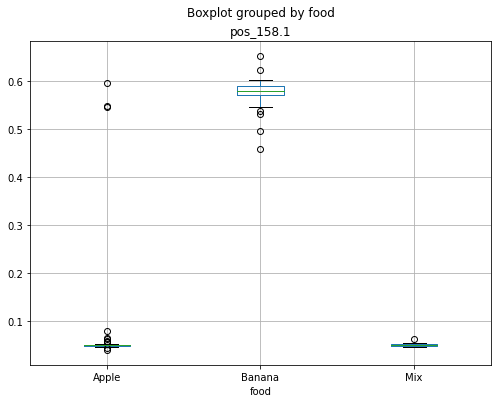

In [0]:
interpolated_data.boxplot(
                column='pos_158.1',# column='pos_158.1'
                by='food',
                return_type='both',
                figsize = (8,6)
                )

We can see that the model uses only five columns which describe one substance (about 158.1 m/z). We can see in the boxplot above that there is a significant difference in that feature, between 'Banana' and 'Apple'.

Accuracy : 1.0
Specificity : 1.0
Sensitivity : 1.0


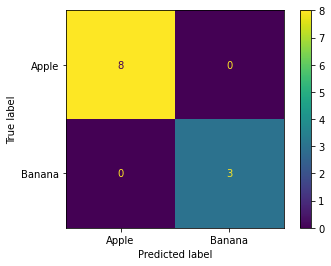

In [0]:
# calculate accuracy, specificity and sensitivity and plot cunfusion matrix based on last split.
from sklearn import metrics
def confusion_matrix (classifier, train_y, train_x, test_x, test_y):
  """ calculate accuracy, specificity and sensitivity.
  plot cunfusion matrix.
  input: classifier, train_y, train_x, test_x, test_y"""

  y_train_pred = classifier.predict(train_x)
  y_test_pred = classifier.predict(test_x)
  cm = metrics.confusion_matrix(test_y, y_test_pred)
  # print (cm)
  accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
  specificity = cm[0,0]/(cm[0,0]+cm[0,1])
  sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
  print (f'Accuracy : {accuracy}')
  print(f'Specificity : {specificity}')
  print(f'Sensitivity : {sensitivity}' )
  metrics.plot_confusion_matrix(classifier, test_x,test_y)

confusion_matrix (classifier, train_y, train_x, test_x, test_y)

compare to same model without removing "before" samples

In [0]:
apple = interpolated_data['food']=='Apple'
banana = interpolated_data['food']=='Banana'
mix = interpolated_data['food']=='Mix'
# remove mix
X = features.copy().loc[apple | banana ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12

['After 5' 'After 8' 'Before' 'before']
['Apple' 'Banana']


In [0]:
from sklearn.linear_model import LogisticRegression
c = 1/np.exp(-2) # trail and error to find best lambda (-4 gives a worse result)
log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.9583333333333334 1
0.9583333333333334 2
1.0 3
0.875 4
1.0 5
1.0 6
1.0 7
0.9444444444444444 8
1.0 9
1.0 10
1.0 11
1.0 12
Average score:  0.9780092592592592


Accuracy : 1.0
Specificity : 1.0
Sensitivity : 1.0


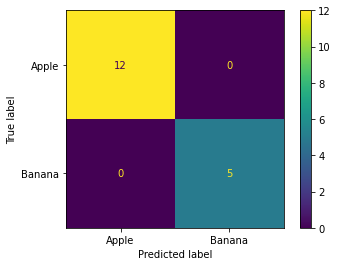

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

6
(1, 38003)
Indices of columns which are included in the model: [ 1330  1431  5172 10679 12414 25383]


In [0]:
# find which substance are they?
colname = train_x.columns[included_in_model]
print (colname)

Index(['neg_112.9', 'neg_113.0', 'neg_147.1', 'neg_197.8', 'neg_341.2',
       'pos_158.1'],
      dtype='object')


In [0]:
# find the mean mass of this substance for each food type
only_158 = interpolated_data[['food','neg_112.9', 'neg_113.0', 'neg_147.1', 'neg_197.8', 'neg_341.2',
       'pos_158.1']]
only_158.groupby(only_158['food']).mean()

,neg_112.9,neg_113.0,neg_147.1,neg_197.8,neg_341.2,pos_158.1
food,,,,,,
Apple,0.363380,0.659716,0.111937,0.077964,0.042944,0.075995
Banana,0.383635,0.684863,0.129040,0.155911,0.143939,0.575678
Mix,0.338974,0.608159,0.161678,0.173674,0.065400,0.050849


### further analysis

We wanted to check whether the substance ('pos_158.1') that was found in the previous section is unique and what is the influnce of this substance on the model's performance. Therefore, we asked the same question as before but without that specific substance.

In [0]:
# remove the substance before the regression

no_sub_data = orig_data.copy()
no_sub_data.drop(['pos_158.0', 'pos_158.1', 'pos_158.2', 'pos_158.3', 'pos_158.4'], axis=1, inplace=True)
# interpolated
new_interpolated_data, norm_factor_neg, mass_neg =  my_interpolation(no_sub_data,'neg_') 
new_interpolated_data, norm_factor_pos, mass_pos =  my_interpolation(new_interpolated_data,'pos_') 

cols_neg = [i for i in new_interpolated_data.columns if  'neg_' in i]
cols_pos = [i for i in new_interpolated_data.columns if  'pos_' in i]

no_sub_data[cols_neg] = no_sub_data[cols_neg].multiply(1/norm_factor_neg, axis=0) 
no_sub_data[cols_pos] = no_sub_data[cols_pos].multiply(1/norm_factor_pos, axis=0) 

new_interpolated_data

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_id,sample_time
0,0,2_Sasha,Apple,0.000001,0.000001,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,...,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755,YY20-136,After 8
1,0,2_Sasha,Apple,0.000001,0.000001,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,...,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352,YY20-134,After 5
2,0,2_Sasha,Apple,0.000001,0.002653,0.004850,0.008865,0.016205,0.029621,0.054144,0.098970,0.180907,0.330678,0.007485,0.007836,0.006777,0.005860,0.005068,0.004383,0.003790,0.003278,0.004174,0.005315,0.006767,0.008617,0.010973,0.013972,0.012822,0.011767,0.010799,0.009910,0.009095,0.008346,0.007659,0.007029,0.007022,0.007015,0.007007,0.007000,0.006993,...,0.000425,0.000406,0.000310,0.000237,0.000182,0.000139,0.000106,0.000081,0.000119,0.000174,0.000255,0.000374,0.000548,0.000804,0.000694,0.000599,0.000518,0.000447,0.000386,0.000334,0.000288,0.000266,0.000246,0.000228,0.000211,0.000195,0.000180,0.000167,0.000168,0.000170,0.000171,0.000173,0.000175,0.000176,0.000178,0.000216,0.000263,0.000319,YY20-100,Before
3,0,2_Sasha,Apple,0.000001,0.000001,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,...,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475,YY20-135,After 8
4,0,2_Sasha,Apple,0.000001,0.000001,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.0144

In [0]:
new_features = clean_fetatures(new_interpolated_data)

In [0]:
new_features

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.1,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_time
0,0,2_Sasha,Apple,0.000001,0.000001,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,...,0.000805,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755,After 8
1,0,2_Sasha,Apple,0.000001,0.000001,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,...,0.000456,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352,After 5
2,0,2_Sasha,Apple,0.000001,0.002653,0.004850,0.008865,0.016205,0.029621,0.054144,0.098970,0.180907,0.330678,0.007485,0.007836,0.006777,0.005860,0.005068,0.004383,0.003790,0.003278,0.004174,0.005315,0.006767,0.008617,0.010973,0.013972,0.012822,0.011767,0.010799,0.009910,0.009095,0.008346,0.007659,0.007029,0.007022,0.007015,0.007007,0.007000,0.006993,...,0.000445,0.000425,0.000406,0.000310,0.000237,0.000182,0.000139,0.000106,0.000081,0.000119,0.000174,0.000255,0.000374,0.000548,0.000804,0.000694,0.000599,0.000518,0.000447,0.000386,0.000334,0.000288,0.000266,0.000246,0.000228,0.000211,0.000195,0.000180,0.000167,0.000168,0.000170,0.000171,0.000173,0.000175,0.000176,0.000178,0.000216,0.000263,0.000319,Before
3,0,2_Sasha,Apple,0.000001,0.000001,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,...,0.000713,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475,After 8
4,0,2_Sasha,Apple,0.000001,0.000001,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.0144

In [0]:
# remove mix
X = new_features.copy().loc[apple | banana ]
#remove "before" samples
# np.unique(features['sample_time'])
after_5 = new_interpolated_data['sample_time']=='After 5'
after_8 = new_interpolated_data['sample_time']=='After 8'
X = X.copy().loc[after_5 | after_8 ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'Banana']


In [0]:
# initializing features and labels
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
from sklearn.linear_model import LogisticRegression
c = 1/np.exp(-2) # AUC later will show how we choose lambda
log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

1.0 1
1.0 2
1.0 3
1.0 4
1.0 5
0.9090909090909091 6
1.0 7
1.0 8
1.0 9
1.0 10
1.0 11
1.0 12
Average score:  0.9924242424242425


Accuracy : 1.0
Specificity : 1.0
Sensitivity : 1.0


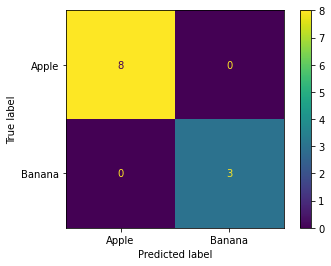

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
classifier.classes_

array(['Apple', 'Banana'], dtype=object)

In [0]:
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

3
(1, 37998)
Indices of columns which are included in the model: [20542 23513 23514]


In [0]:
colname = train_x.columns[included_in_model]
print (colname)

Index(['pos_114.0', 'pos_141.1', 'pos_141.2'], dtype='object')


In [0]:
# find the mean mass of this molecules for each food type
only_included = interpolated_data[['food','pos_114.0', 'pos_141.1', 'pos_141.2']]
only_included.groupby(only_included['food']).mean()

,pos_114.0,pos_141.1,pos_141.2
food,,,
Apple,0.056550,0.035375,0.037511
Banana,0.341088,0.279066,0.267215
Mix,0.037419,0.027258,0.030120


pos_114.0    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

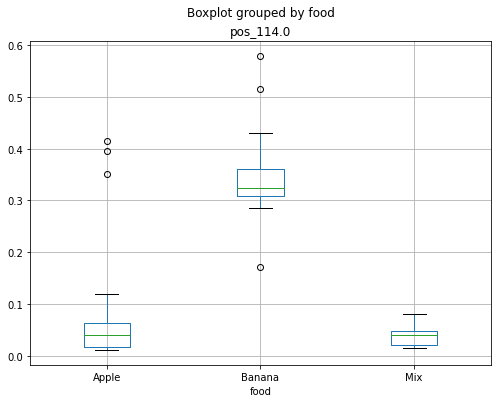

In [0]:
interpolated_data.boxplot(
                column='pos_114.0',# column='pos_158.1'
                by='food',
                return_type='both',
                figsize = (8,6)
                )

Without the specific substance that was found as the predictor, we can see that the model found other three columns which represent two substances. The boxplot above indicate a significant difference between 'banana' and 'apple' in those features.
The average score is still high (0.99) which implies that there are more than one substance that can be used as predictors. 


### b) Question 2: Did the bat eat banana?


In this section we tried to find out whether the bat ate banana according to the sample. Banana was eaten in the cases where food was either 'banana' or 'mix'. 

We removed the "before" samples.

In [0]:
# mix contains banana therfore will change to "banana". apple to "no banana"
X_banana = features.copy().loc[apple | banana | mix ]
X_banana.loc[X_banana['food']== 'Mix', 'food'] = 'Banana'
X_banana.loc[X_banana['food']== 'Apple', 'food'] = 'No banana'
#remove "before" samples
print (np.unique(features['sample_time']))
after_5 = features['sample_time']=='After 5'
after_8 = features['sample_time']=='After 8'
X_banana = X_banana.copy().loc[after_5 | after_8 ]
print (np.unique(X_banana['sample_time']))
print (np.unique(X_banana['food']))
X_banana.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8' 'Before' 'before']
['After 5' 'After 8']
['Banana' 'No banana']


In [0]:
# initializing features and labels
y = X_banana['food'].copy()
groups = X_banana['bat'].values
X = X_banana.drop(['bat', 'food'], axis=1)
n_splits = 12
# print (X)
# print (y)

In [0]:
from sklearn.linear_model import LogisticRegression
c = 1/np.exp(-2)# need to decide on c...
log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

1.0 1
1.0 2
1.0 3
1.0 4
1.0 5
0.9090909090909091 6
1.0 7
1.0 8
1.0 9
1.0 10
0.8 11
0.9473684210526315 12
Average score:  0.9713716108452952


Accuracy : 0.9473684210526315
Specificity : 1.0
Sensitivity : 0.875


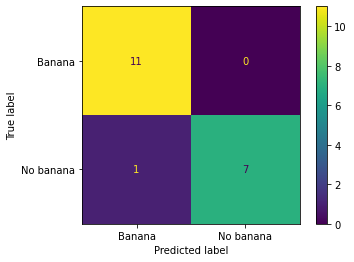

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
classifier.classes_

array(['Banana', 'No banana'], dtype=object)

In [0]:
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

9
(1, 38003)
Indices of columns which are included in the model: [   10   111 10012 19222 20102 20103 20213 20214 20215]


In [0]:
colname = train_x.columns[[included_in_model]]
print (colname)

Index(['neg_100.9', 'neg_101.0', 'neg_191.1', 'pos_102.0', 'pos_110.0',
       'pos_110.1', 'pos_111.1', 'pos_111.2', 'pos_111.3'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [0]:
# find the mean mass of this molecules for each food type
only_colname = interpolated_data[['food','neg_100.9', 'neg_101.0', 'neg_191.1', 'pos_102.0', 'pos_110.0',
       'pos_110.1', 'pos_111.1', 'pos_111.2', 'pos_111.3']]
only_colname.groupby(only_colname['food']).mean()

,neg_100.9,neg_101.0,neg_191.1,pos_102.0,pos_110.0,pos_110.1,pos_111.1,pos_111.2,pos_111.3
food,,,,,,,,,
Apple,0.382984,0.488735,0.347315,0.092383,0.254971,0.211139,0.528362,0.415109,0.360303
Banana,0.247987,0.418063,0.268479,0.106150,0.200253,0.271492,0.454692,0.389925,0.347618
Mix,0.356656,0.471015,0.348244,0.047001,0.147295,0.073153,0.394300,0.335827,0.298547


pos_191.1    (AxesSubplot(0.1,0.15;0.8x0.75), {'whiskers': ...
dtype: object

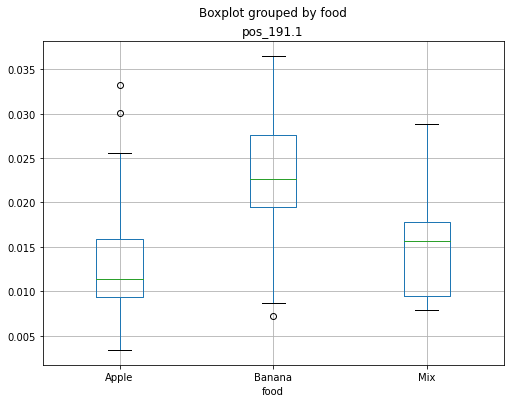

In [0]:
interpolated_data.boxplot(
                column='pos_191.1',# column='pos_158.1'
                by='food',
                return_type='both',
                figsize = (8,6)
                )

### Did the bat eat banana?
with "before" samples as "no banana" 



In [0]:
# mix contains banana therfore will change to "banana". apple to "no banana"
X_banana = features.copy().loc[apple | banana | mix ]
X_banana.loc[X_banana['food']== 'Mix', 'food'] = 'Banana'
X_banana.loc[X_banana['food']== 'Apple', 'food'] = 'No banana'
# #change all "before" samples to "no banana"
X_banana.loc[X_banana['sample_time'] == 'Before', 'food'] = 'No banana'
X_banana.loc[X_banana['sample_time'] == 'before', 'food'] = 'No banana'
print (np.unique(X_banana['sample_time']))
print (np.unique(X_banana['food']))
X_banana.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8' 'Before' 'before']
['Banana' 'No banana']


In [0]:
# initializing features and labels
y = X_banana['food'].copy()
groups = X_banana['bat'].values
X = X_banana.drop(['bat', 'food'], axis=1)
n_splits = 12
# print (X)
# print (y)

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.9666666666666667 1
0.8333333333333334 2
0.9583333333333334 3
0.7333333333333333 4
0.9629629629629629 5
0.8571428571428571 6
0.8620689655172413 7
0.8333333333333334 8
0.95 9
0.9696969696969697 10
0.8333333333333334 11
0.896551724137931 12
Average score:  0.8880630677326079


Accuracy : 0.896551724137931
Specificity : 0.8181818181818182
Sensitivity : 0.9444444444444444


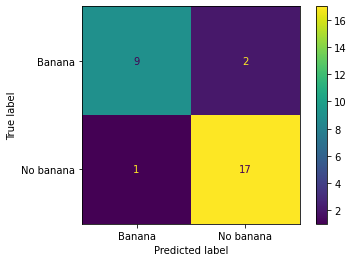

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
classifier.classes_

array(['Banana', 'No banana'], dtype=object)

In [0]:
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

11
(1, 38003)
Indices of columns which are included in the model: [   10   111  1770  1871 10452 11123 12244 14176 20102 20103 20214]


In [0]:
colname = train_x.columns[[included_in_model]]
print (colname)

Index(['neg_100.9', 'neg_101.0', 'neg_116.9', 'neg_117.0', 'neg_195.1',
       'neg_212.1', 'neg_324.2', 'neg_517.4', 'pos_110.0', 'pos_110.1',
       'pos_111.2'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [0]:
list(colname)

['neg_100.9',
 'neg_101.0',
 'neg_116.9',
 'neg_117.0',
 'neg_195.1',
 'neg_212.1',
 'neg_324.2',
 'neg_517.4',
 'pos_110.0',
 'pos_110.1',
 'pos_111.2']

In [0]:
# find the mean mass of this molecules for each food type
only_colname = interpolated_data[['food','neg_100.9',
 'neg_101.0',
 'neg_116.9',
 'neg_195.1',
 'neg_212.1',
 'neg_324.2',
 'neg_517.4',
 'pos_110.0',
 'pos_110.1',
 'pos_111.1',
 'pos_111.2']]
only_colname.groupby(only_colname['food']).mean()

,neg_100.9,neg_101.0,neg_116.9,neg_195.1,neg_212.1,neg_324.2,neg_517.4,pos_110.0,pos_110.1,pos_111.1,pos_111.2
food,,,,,,,,,,,
Apple,0.382984,0.488735,0.653308,0.097972,0.114671,0.043422,0.071569,0.254971,0.211139,0.528362,0.415109
Banana,0.247987,0.418063,0.619763,0.145612,0.128468,0.054053,0.020731,0.200253,0.271492,0.454692,0.389925
Mix,0.356656,0.471015,0.700243,0.137674,0.124226,0.058020,0.048199,0.147295,0.073153,0.394300,0.335827


### C) Question 2: Did the bat eat apple?

In [0]:
# mix contains apple therefore will change to "apple". banana to "no apple"
X_apple = features.copy().loc[apple | banana | mix ]
X_apple.loc[X_apple['food']== 'Mix', 'food'] = 'Apple'
X_apple.loc[X_apple['food']== 'Banana', 'food'] = 'No apple'
#remove "before" samples
print (np.unique(features['sample_time']))
after_5 = features['sample_time']=='After 5'
after_8 = features['sample_time']=='After 8'
X_apple = X_apple.copy().loc[after_5 | after_8 ]
print (np.unique(X_apple['sample_time']))
print (np.unique(X_apple['food']))
X_apple.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8' 'Before' 'before']
['After 5' 'After 8']
['Apple' 'No apple']


In [0]:
# initializing features and labels
y = X_apple['food'].copy()
groups = X_apple['bat'].values
X = X_apple.drop(['bat', 'food'], axis=1)
n_splits = 12
print (X)
print (y)

     Unnamed: 0  neg_100.0  neg_100.1  ...  pos_999.7  pos_999.8  pos_999.9
0             0   0.000020   0.000020  ...   0.000128   0.000310   0.000755
1             0   0.000017   0.000017  ...   0.000741   0.001001   0.001352
3             0   0.000018   0.000018  ...   0.000678   0.001000   0.001475
4             0   0.000016   0.000016  ...   0.002370   0.002543   0.002728
6             0   0.000019   0.000019  ...   0.001938   0.002035   0.002138
..          ...        ...        ...  ...        ...        ...        ...
168           0   0.000003   0.002162  ...   0.000620   0.000614   0.000607
170           0   0.000019   0.000019  ...   0.002914   0.003092   0.003280
171           0   0.000020   0.000020  ...   0.003126   0.003582   0.004104
172           0   0.000020   0.000020  ...   0.002535   0.003070   0.003719
173           0   0.000020   0.000020  ...   0.003695   0.004101   0.004552

[111 rows x 38003 columns]
0         Apple
1         Apple
3         Apple
4         Ap

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

1.0 1
1.0 2
1.0 3
1.0 4
1.0 5
1.0 6
1.0 7
1.0 8
1.0 9
1.0 10
1.0 11
1.0 12
Average score:  1.0


Accuracy : 1.0
Specificity : 1.0
Sensitivity : 1.0


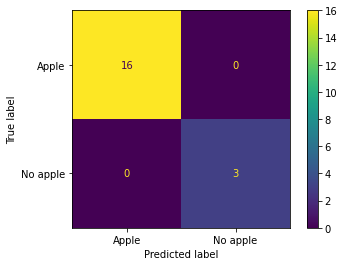

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

2
(1, 38003)
Indices of columns which are included in the model: [25383 25384]


In [0]:
colname = train_x.columns[[included_in_model]]
print (colname)

Index(['pos_158.1', 'pos_158.2'], dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [0]:
# find the mean mass of this molecules for each food type
only_colname = interpolated_data[['food','pos_158.1', 'pos_158.2']]
only_colname.groupby(only_colname['food']).mean()

,pos_158.1,pos_158.2
food,,
Apple,0.075995,0.081008
Banana,0.575678,0.524034
Mix,0.050849,0.059354


It's the same substance from question 1.

### Conclusions

1. The logistic regression model can discriminate between apple samples and banana samples with an average score of 1.00.

2. "Before" samples were taken from the bats 24 hours after the last feeding and before the next feeding, while the bats were on the same fruit diet for the previous days. 
Using "before" samples in the model didn't have a great effect on the score. The average score of the model in that scenario was 0.98. 
That could imply that "before" samples are not really clean, meaning they probably have fruit residuals in them. More on that on the next tests.

3. Model discriminates between samples with banana to samples without banana with an average score of 0.97. While using "before" samples as "no banana" reduces average score to 0.89.
Those results support our previous results showing that "before" samples probably have fruit residuals in them. 
So from now on, we will remove "before" samples.

4. The regularization causes the model to find out the substances of the spectrometry that discriminate bewteen the food with best performance. In this methods the researcher can control how many substances to use, by the regularization parameter.  Some substances ('pos_158', for example) are used in several questions. 

5. In the examples of the boxplots above, we can see that 'Mix' is closer to "Apple' than to "banana".  

## 4.2 Running the model on the PCA

In this section we tested wheteher a PCA model with reduced dimension can be use to answer the research-qustions. We tried two PCA model: one with 60 coefficients (explaining 90% of the mass-spectrometry variance)  and the second with only two coeffients (explaining 40% of the variance). We run the models without regularization. For an analysis of the PCA - see Ch. 5.1 below.

### Uploading PCA models

A model 60 coefficients (pca60_model_df)

In [0]:
pca60_model_df = pd.read_csv('/content/gdrive/My Drive/ML_bats_project/Data_Frame_pca_model_60coeff.csv')

or upload from local disk (don't run if the file was uploaded from drive)

In [0]:
# import file from local disk 
from google.colab import files
import io

uploaded = files.upload()
pca60_model_df = pd.read_csv(io.BytesIO(uploaded['Data_Frame_pca_model_60coeff.csv'])) # 

Saving Data_Frame_pca_model_60coeff.csv to Data_Frame_pca_model_60coeff (3).csv


In [0]:
# 'drop Unnamed: 0'
pca60_model_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [0]:
pca60_model_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,bat,food,sample_id,sample_time,oral/anal
0,-1.089734,0.340914,-0.426788,-0.756554,-0.572018,0.617546,-0.705806,-0.147140,0.346586,0.487297,0.019685,0.206323,-0.111239,0.096603,-0.001690,0.155399,0.078579,-0.245670,0.060062,-0.035603,0.003080,0.032336,-0.097082,0.109693,0.017745,0.021633,-0.000684,-0.054450,0.071173,0.007814,-0.048259,0.144877,0.112979,0.125926,0.029722,-0.024174,0.057759,0.038297,-0.011565,0.230866,-0.059698,0.003927,0.056151,-0.041158,-0.057473,-0.140076,-0.148959,-0.007778,0.079816,0.003918,0.020174,0.011311,-0.071255,-0.082254,-0.171895,-0.171886,-0.108433,0.116710,0.004088,-0.084902,2_Sasha,Apple,YY20-136,After 8,Oral
1,-1.412545,-0.326287,-0.041774,-0.522526,1.076286,0.602558,-0.734783,-0.567267,0.740390,0.250857,-0.359189,0.098184,-0.235724,0.409618,-0.037458,0.174644,0.069860,0.169525,0.105026,-0.056038,-0.141749,-0.030577,-0.156260,0.012243,0.026920,-0.004143,0.083846,0.017303,-0.129274,0.032779,0.056454,0.016859,-0.041091,-0.041572,-0.070354,-0.065453,-0.161948,0.060588,0.022809,-0.003122,0.000512,-0.127050,-0.172529,-0.130760,-0.089207,0.015441,-0.047759,0.150266,-0.231170,0.028906,0.035758,-0.083149,-0.108987,-0.139085,0.002714,0.032363,0.027436,-0.067147,0.049590,0.048840,2_Sasha,Apple,YY20-134,After 5,Oral
2,1.722168,-1.186320,0.418639,-0.612697,-0.483281,0.765842,0.097853,-0.436909,0.008678,-0.366286,0.037917,-0.218804,0.019482,0.030896,-0.210045,-0.110288,0.155573,0.018775,0.176982,0.234632,0.102777,-0.099488,0.088737,0.021845,-0.034425,-0.173247,0.023167,-0.028757,-0.109442,-0.158119,-0.008782,0.025223,0.152954,0.037104,0.073759,-0.091943,0.073249,-0.024881,0.020273,-0.116145,0.126885,-0.102393,-0.181606,0.107299,-0.004116,-0.012364,0.031072,-0.027884,-0.032644,0.120783,-0.032458,0.023110,-0.032158,0.044315,-0.092403,0.013065,0.014453,-0.116107,-0.201037,0.002240,2_Sasha,Before,YY20-100,Before,Oral
3,-0.967730,0.164687,-0.688200,0.387386,-0.132043,1.032493,-0.093437,0.710302,0.307563,0.098328,-0.103085,0.137829,0.037744,-0.180389,-0.104123,0.258543,-0.096240,0.263557,-0.074266,-0.039487,-0.316640,-0.037113,0.050561,0.133211,0.359238,-0.107096,0.101692,0.062472,0.326950,0.124622,-0.079631,0.162191,0.047335,-0.219272,-0.039115,-0.116582,-0.081322,-0.107471,0.103144,-0.262564,0.070170,0.022733,-0.000695,0.092763,0.087467,0.051526,-0.032594,-0.142550,-0.009718,0.087107,0.137293,-0.078140,0.160967,0.046281,-0.117751,-0.172608,-0.135877,-0.072284,0.059427,-0.124266,2_Sasha,Apple,YY20-135,After 8,Anal
4,-1.329588,0.425053,0.221251,2.295661,1.330878,1.629314,0.360222,-0.295171,0.458576,0.161858,-0.465367,0.121863,-0.162517,0.451331,-0.228378,0.289225,-0.026795,0.327765,0.241429,-0.067673,-0.151507,-0.025355,-0.032055,-0.003594,-0.101094,0.125063,0.132327,0.064716,0.747715,0.244892,0.258682,-0.234376,0.382763,1.169173,-0.023630,0.297433,0.012175,-0.398182,-0.209021,-0.341051,-0.245657,-0.268262,-0.033973,0.022594,0.110139,0.013039,0.315128,0.208833,0.027036,-0.249976,0.083692,0.164660,-0.009561,0.367611,-0.036580,0.021588,-0.205756,-0.157366,-0.191153,0.214115,2_Sasha,Apple,YY20-133,After 5,Anal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.030395,-0.628299,-2.451830,-0.483460,-0.110491,-0.013402,1.244017,-0.325338,0.348024,0.465022,-0.676255,0.365632,0.182680,-0.579384,0.724078,0.367151,-0.485281,-0.042393,0.195229,-0.256370,0.046412,0.497884,0.316810,0.711198,-0.226691,0.154029,0.065928,0.382341,-0.225336,0.229679,-0.514610,0.161860,-0.256440,0.430902,-0.189319,0.155328,0.106402,-0.000930,0.252771,-0.139622,0.267146,-0.045030,0.564304,0.392295,-0.062410,-0.315891,0.104684,-0.112888,-0.205425,0.336883,0.409477,-0.1

A model with 2 coefficients (pca2_model_df)

In [0]:
from sklearn.decomposition import PCA

In [0]:
df_for_pca = interpolated_data.copy()

x_cols = [cols for cols in df_for_pca.columns if ('pos_' in cols) | ('neg_' in cols)]
X_data = df_for_pca.loc[:,x_cols]
Y_data = df_for_pca['food']

# apply 'Before' to food
# before_idx = df_for_pca['sample_time'] == 'Before'
# Y_data[before_idx] = 'Before'

# X_data.drop('food', axis=1, inplace=True) 
np.unique(Y_data)

array(['Apple', 'Banana', 'Mix'], dtype=object)

In [0]:
n_pca_comp = 2  # number of components for pca 
pca = PCA(n_components= n_pca_comp) 

projected = pca.fit_transform(X_data)
np.shape(projected)

(165, 2)

In [0]:
print('explained variance ratio: ', np.sum(pca.explained_variance_ratio_))
np.round(pca.explained_variance_ratio_,2)

explained variance ratio:  0.3927351991513224


array([0.22, 0.17])

In [0]:
# PCA model dataframe 
pca2_model_df = pd.DataFrame(projected)
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
pca2_model_df[colls_to_copy] = interpolated_data.loc[:,colls_to_copy].copy()
pca2_model_df

,0,1,bat,food,sample_id,sample_time,oral/anal
0,-1.089734,0.340914,2_Sasha,Apple,YY20-136,After 8,Oral
1,-1.412545,-0.326287,2_Sasha,Apple,YY20-134,After 5,Oral
2,1.722168,-1.186320,2_Sasha,Apple,YY20-100,Before,Oral
3,-0.967730,0.164687,2_Sasha,Apple,YY20-135,After 8,Anal
4,-1.329588,0.425053,2_Sasha,Apple,YY20-133,After 5,Anal
...,...,...,...,...,...,...,...
160,1.030395,-0.628299,6_Omer,Banana,YY20-062,After 5,Oral
161,-0.647158,-1.618681,6_Omer,Banana,YY20-020,Before,Oral
162,-1.078790,-1.427188,6_Omer,Banana,YY20-063,After 8,Anal
163,-0.661457,-1.659711,6_Omer,Banana,YY20-061,After 5,Anal


### a) Banana or apple?

60 coefficients:

In [0]:
pca_df = pca60_model_df

In [0]:
pca_features = clean_fetatures(pca_df)
pca_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,bat,food,sample_time
0,-1.089734,0.340914,-0.426788,-0.756554,-0.572018,0.617546,-0.705806,-0.147140,0.346586,0.487297,0.019685,0.206323,-0.111239,0.096603,-0.001690,0.155399,0.078579,-0.245670,0.060062,-0.035603,0.003080,0.032336,-0.097082,0.109693,0.017745,0.021633,-0.000684,-0.054450,0.071173,0.007814,-0.048259,0.144877,0.112979,0.125926,0.029722,-0.024174,0.057759,0.038297,-0.011565,0.230866,-0.059698,0.003927,0.056151,-0.041158,-0.057473,-0.140076,-0.148959,-0.007778,0.079816,0.003918,0.020174,0.011311,-0.071255,-0.082254,-0.171895,-0.171886,-0.108433,0.116710,0.004088,-0.084902,2_Sasha,Apple,After 8
1,-1.412545,-0.326287,-0.041774,-0.522526,1.076286,0.602558,-0.734783,-0.567267,0.740390,0.250857,-0.359189,0.098184,-0.235724,0.409618,-0.037458,0.174644,0.069860,0.169525,0.105026,-0.056038,-0.141749,-0.030577,-0.156260,0.012243,0.026920,-0.004143,0.083846,0.017303,-0.129274,0.032779,0.056454,0.016859,-0.041091,-0.041572,-0.070354,-0.065453,-0.161948,0.060588,0.022809,-0.003122,0.000512,-0.127050,-0.172529,-0.130760,-0.089207,0.015441,-0.047759,0.150266,-0.231170,0.028906,0.035758,-0.083149,-0.108987,-0.139085,0.002714,0.032363,0.027436,-0.067147,0.049590,0.048840,2_Sasha,Apple,After 5
3,-0.967730,0.164687,-0.688200,0.387386,-0.132043,1.032493,-0.093437,0.710302,0.307563,0.098328,-0.103085,0.137829,0.037744,-0.180389,-0.104123,0.258543,-0.096240,0.263557,-0.074266,-0.039487,-0.316640,-0.037113,0.050561,0.133211,0.359238,-0.107096,0.101692,0.062472,0.326950,0.124622,-0.079631,0.162191,0.047335,-0.219272,-0.039115,-0.116582,-0.081322,-0.107471,0.103144,-0.262564,0.070170,0.022733,-0.000695,0.092763,0.087467,0.051526,-0.032594,-0.142550,-0.009718,0.087107,0.137293,-0.078140,0.160967,0.046281,-0.117751,-0.172608,-0.135877,-0.072284,0.059427,-0.124266,2_Sasha,Apple,After 8
4,-1.329588,0.425053,0.221251,2.295661,1.330878,1.629314,0.360222,-0.295171,0.458576,0.161858,-0.465367,0.121863,-0.162517,0.451331,-0.228378,0.289225,-0.026795,0.327765,0.241429,-0.067673,-0.151507,-0.025355,-0.032055,-0.003594,-0.101094,0.125063,0.132327,0.064716,0.747715,0.244892,0.258682,-0.234376,0.382763,1.169173,-0.023630,0.297433,0.012175,-0.398182,-0.209021,-0.341051,-0.245657,-0.268262,-0.033973,0.022594,0.110139,0.013039,0.315128,0.208833,0.027036,-0.249976,0.083692,0.164660,-0.009561,0.367611,-0.036580,0.021588,-0.205756,-0.157366,-0.191153,0.214115,2_Sasha,Apple,After 5
6,-0.823107,-1.430967,0.200150,-0.249880,-0.835467,-0.285363,0.705119,0.577061,-0.552426,0.502315,0.180552,0.261854,-0.255304,-0.351215,-0.003014,-0.278826,-0.176357,0.530961,-0.258052,-0.036535,0.128621,-0.242565,0.031767,0.005746,-0.040042,-0.050324,-0.137713,-0.270687,0.043795,-0.337693,-0.045187,-0.022261,-0.059326,0.070137,0.081925,0.070984,-0.089431,-0.079200,0.108337,0.062903,0.035843,0.116307,0.063699,0.132628,-0.018995,0.028335,0.036051,-0.086348,0.109621,-0.010457,-0.094059,-0.024559,0.011678,0.158342,0.070520,0.090475,0.001517,-0.015162,-0.066600,0.128562,2_Sasha,Banana,After 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.912651,-0.439398,-1.217968,-0.442824,0.307222,1.021908,-0.206113,0.772306,0.493175,0.159616,-0.273295,0.166216,-0.107837,-0.088532,0.298742,0.069533,-0.002724,0.473138,-0.073348,-0.070666,-0.281000,-0.095165,-0.195358,0.100502,0.093002,-0.145574,0.084581,0.090128,-0.062028,-0.266210,0.204864,0.300643,-0.005147,-0.020277,0.184437,0.124357,-0.194169,-0.033167,0.058944,-0.037868,0.206264,0.084317,-0.040521,-0.221842,-0.018892,0.019891,-0.165581,0.108650,-0.250137,0.186599,-0.006812,0.002832,-0.161883,0.051024,-0.017623,0.023287,0.011771,-0.103155,-0.048968,0.123550,6_Omer,Mi

In [0]:
apple = pca_df['food']=='Apple'
banana = pca_df['food']=='Banana'
mix = pca_df['food']=='Mix'
# remove mix
X = pca_features.copy().loc[apple | banana ]
#remove "before" samples
# np.unique(pca_features['sample_time'])
after_5 = pca_df['sample_time']=='After 5'
after_8 = pca_df['sample_time']=='After 8'
X = X.copy().loc[after_5 | after_8 ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'Banana']


In [0]:
# using the same model with no regularization
from sklearn.linear_model import LogisticRegression
# c = 1/np.exp(-2)
#but with different lambda
c = 1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(1)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
# initializing features and labels
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.3333333333333333 1
0.5333333333333333 2
0.8181818181818182 3
0.45454545454545453 4
0.38461538461538464 5
0.625 6
0.6666666666666666 7
0.45454545454545453 8
0.7 9
0.6875 10
0.5454545454545454 11
0.3 12
Average score:  0.5419313325563325


In [0]:
classifier.classes_

array(['Apple', 'Banana'], dtype=object)

Accuracy : 0.3
Specificity : 0.25
Sensitivity : 0.3333333333333333


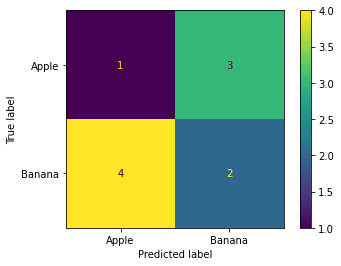

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

how many pca-features  are used in the model?

In [0]:
# we check which columns are included in the model
# included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
included_in_model = np.argwhere(classifier.coef_ != 0 )[:,1]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

60
(1, 60)
Indices of columns which are included in the model: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


2 coefficients:

In [0]:
pca_df = pca2_model_df

In [0]:
pca_features = clean_fetatures(pca_df)
pca_features

,0,1,bat,food,sample_time
0,-1.089734,0.340914,2_Sasha,Apple,After 8
1,-1.412545,-0.326287,2_Sasha,Apple,After 5
2,1.722168,-1.186320,2_Sasha,Apple,Before
3,-0.967730,0.164687,2_Sasha,Apple,After 8
4,-1.329588,0.425053,2_Sasha,Apple,After 5
...,...,...,...,...,...
160,1.030395,-0.628299,6_Omer,Banana,After 5
161,-0.647158,-1.618681,6_Omer,Banana,Before
162,-1.078790,-1.427188,6_Omer,Banana,After 8
163,-0.661457,-1.659711,6_Omer,Banana,After 5


In [0]:
apple = pca_df['food']=='Apple'
banana = pca_df['food']=='Banana'
mix = pca_df['food']=='Mix'
# remove mix
X = pca_features.copy().loc[apple | banana ]
#remove "before" samples
# np.unique(pca_features['sample_time'])
after_5 = pca_df['sample_time']=='After 5'
after_8 = pca_df['sample_time']=='After 8'
X = X.copy().loc[after_5 | after_8 ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'Banana']


In [0]:
# using the same model with no regularization
from sklearn.linear_model import LogisticRegression
# c = 1/np.exp(-2)
#but with different lambda
c = 1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(1)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
# initializing features and labels
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.6 1
1.0 2
0.7272727272727273 3
0.8181818181818182 4
0.8461538461538461 5
0.9375 6
0.8666666666666667 7
0.8181818181818182 8
0.8 9
0.5625 10
0.8181818181818182 11
0.8 12
Average score:  0.7995532245532245


In [0]:
classifier.classes_

array(['Apple', 'Banana'], dtype=object)

Accuracy : 0.8
Specificity : 1.0
Sensitivity : 0.6666666666666666


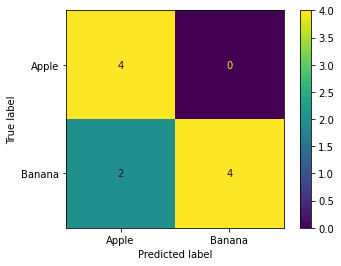

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

how many pca-features  are used in the model?

In [0]:
# we check which columns are included in the model
# included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
included_in_model = np.argwhere(classifier.coef_ != 0 )[:,1]
print (len(included_in_model))
print (classifier.coef_.shape)
print (f"Indices of columns which are included in the model: {included_in_model}")

2
(1, 2)
Indices of columns which are included in the model: [0 1]


Conclusion 1: 
The model with 2 PCA-components outperforms the model with 60 coefficients. 
The next tests are done with pca_2.

###b) Did the bat eat banana?

In [0]:
pca_df = pca2_model_df

In [0]:
pca_features = clean_fetatures(pca_df)
pca_features

,0,1,bat,food,sample_time
0,-1.089734,0.340914,2_Sasha,Apple,After 8
1,-1.412545,-0.326287,2_Sasha,Apple,After 5
2,1.722168,-1.186320,2_Sasha,Apple,Before
3,-0.967730,0.164687,2_Sasha,Apple,After 8
4,-1.329588,0.425053,2_Sasha,Apple,After 5
...,...,...,...,...,...
160,1.030395,-0.628299,6_Omer,Banana,After 5
161,-0.647158,-1.618681,6_Omer,Banana,Before
162,-1.078790,-1.427188,6_Omer,Banana,After 8
163,-0.661457,-1.659711,6_Omer,Banana,After 5


In [0]:
# mix contains banana therfore will change to "banana". apple to "no banana"
X_banana = pca_features.copy().loc[apple | banana | mix ]
X_banana.loc[X_banana['food']== 'Mix', 'food'] = 'Banana'
X_banana.loc[X_banana['food']== 'Apple', 'food'] = 'No banana'
#remove "before" samples
# np.unique(pca_features['sample_time'])
after_5 = pca_features['sample_time']=='After 5'
after_8 = pca_features['sample_time']=='After 8'
X_banana = X_banana.copy().loc[after_5 | after_8 ]
print (np.unique(X_banana['sample_time']))
print (np.unique(X_banana['food']))
X_banana.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Banana' 'No banana']


In [0]:
# initializing features and labels
y = X_banana['food'].copy()
groups = X_banana['bat'].values
X = X_banana.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
# using the same model, no regularization
from sklearn.linear_model import LogisticRegression
# c = 1/np.exp(-2)# need to decide on c...
#but with different lambda
# c = 1/np.exp(1)# need to decide on c...
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')
c = 1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.6842105263157895 1
0.9130434782608695 2
0.8 3
0.8 4
0.9047619047619048 5
0.85 6
0.8260869565217391 7
0.8 8
0.8333333333333334 9
0.65 10
0.8181818181818182 11
0.9285714285714286 12
Average score:  0.8173491204955736


Accuracy : 0.9285714285714286
Specificity : 0.9
Sensitivity : 1.0


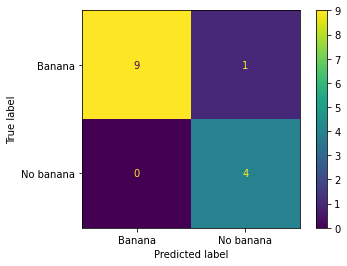

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

### c) Did the bat eat apple?

In [0]:
pca_df = pca2_model_df
pca_features = clean_fetatures(pca_df)

In [0]:
# mix contains apple therefore will change to "apple". banana to "no apple"
X_apple = pca_features.copy().loc[apple | banana | mix ]
X_apple.loc[X_apple['food']== 'Mix', 'food'] = 'Apple'
X_apple.loc[X_apple['food']== 'Banana', 'food'] = 'No apple'
#remove "before" samples
# np.unique(pca_features['sample_time'])
after_5 = pca_features['sample_time']=='After 5'
after_8 = pca_features['sample_time']=='After 8'
X_apple = X_apple.copy().loc[after_5 | after_8 ]
print (np.unique(X_apple['sample_time']))
print (np.unique(X_apple['food']))
X_apple.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'No apple']


In [0]:
# initializing features and labels
y = X_apple['food'].copy()
groups = X_apple['bat'].values
X = X_apple.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
# using the same model
from sklearn.linear_model import LogisticRegression
# c = 1/np.exp(-2)# need to decide on c...
#but with different lambda
c = 1/np.exp(2)# need to decide on c...
log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

Accuracy : 0.8571428571428571
Specificity : 1.0
Sensitivity : 0.6666666666666666


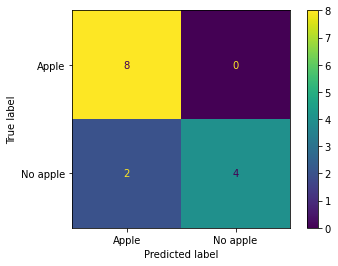

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

###Conclusions

Running the model on the PCA reduces the average accuracy score from 1.00 on interploated data to ca. 0.8 on PCA (in the apple-banana discrimination task).
That decline in the performance is due to the loss of relevant information in the PCA. 
Is seems as the PCA performance is not good enough.
It is interseting because the regulized model on the interpolated used only 5 features and did a better discrimniation. Also, the regression-model with 2 featrues preformed better than the one with 60 features.

## 4.3 Running the model on correlation with food reference

In this section we tested whether we can use the correlation between each sample and the spectrometry of the food components (i.e. apple and banana) to estimate what did the bat eat. If the performance of this model is good enough, it may be used as a new method to test any food component. ?For anlysis of the correlation - see ch. 5.3 below.

### Uploading the correlation results

In [0]:
food_ref = pd.read_csv('/content/gdrive/My Drive/ML_bats_project/correlation_with_reference_fixed.csv')

or upload from local disk (don't run if the file was uploaded from drive)

In [0]:
# import file from local disk 
from google.colab import files
import io

uploaded = files.upload()
food_ref = pd.read_csv(io.BytesIO(uploaded['correlation_with_reference_fixed.csv'])) # 

Saving correlation_with_reference_fixed.csv to correlation_with_reference_fixed (1).csv


In [0]:
# 'drop Unnamed: 0'
food_ref.drop(['Unnamed: 0'], axis=1, inplace=True)
food_ref

,Apple,Banana,food,sample_time,bat,sample_id
0,0.127416,0.090901,Apple,After 8,2_Sasha,YY20-136
1,0.137893,0.087425,Apple,After 5,2_Sasha,YY20-134
2,0.210169,0.174700,Apple,Before,2_Sasha,YY20-100
3,0.126970,0.109270,Apple,After 8,2_Sasha,YY20-135
4,0.128089,0.149797,Apple,After 5,2_Sasha,YY20-133
...,...,...,...,...,...,...
160,0.077767,0.154222,Apple,Before,1_Vova,YY20-097
161,0.110501,0.079422,Banana,After 8,1_Vova,YY20-044
162,0.158229,0.098213,Banana,After 5,1_Vova,YY20-042
163,0.166675,0.109873,Banana,After 8,1_Vova,YY20-043


In [0]:
# same model no regularization 
from sklearn.linear_model import LogisticRegression
#different lambda
c =1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(-2)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
all_features = food_ref.copy()
apple = food_ref['food']=='Apple'
banana = food_ref['food']=='Banana'
mix = food_ref['food']=='Mix'
ref_features = food_ref.copy().loc[apple | banana | mix]
ref_features.drop(['sample_id'], axis=1, inplace=True)

In [0]:
ref_features

,Apple,Banana,food,sample_time,bat
0,0.127416,0.090901,Apple,After 8,2_Sasha
1,0.137893,0.087425,Apple,After 5,2_Sasha
2,0.210169,0.174700,Apple,Before,2_Sasha
3,0.126970,0.109270,Apple,After 8,2_Sasha
4,0.128089,0.149797,Apple,After 5,2_Sasha
...,...,...,...,...,...
160,0.077767,0.154222,Apple,Before,1_Vova
161,0.110501,0.079422,Banana,After 8,1_Vova
162,0.158229,0.098213,Banana,After 5,1_Vova
163,0.166675,0.109873,Banana,After 8,1_Vova


##a) Banana or Apple?

In [0]:
print (np.unique(ref_features['food']))

['Apple' 'Banana' 'Mix']


In [0]:
# remove mix
X = ref_features.copy().loc[apple | banana ]
#remove "before" samples
# np.unique(pca_features['sample_time'])
after_5 = ref_features['sample_time']=='After 5'
after_8 = ref_features['sample_time']=='After 8'
X = X.copy().loc[after_5 | after_8 ]
print (np.unique(X['sample_time']))
print (np.unique(X['food']))
X.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'Banana']


In [0]:
# initializing features and labels
y = X['food'].copy()
groups = X['bat'].values
X = X.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
# same model
from sklearn.linear_model import LogisticRegression
#different lambda
#different lambda
c =1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(-3)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

1.0 1
1.0 2
1.0 3
0.8125 4
1.0 5
0.9090909090909091 6
1.0 7
0.9166666666666666 8
1.0 9
1.0 10
0.9375 11
1.0 12
Average score:  0.9646464646464646


Accuracy : 1.0
Specificity : 1.0
Sensitivity : 1.0


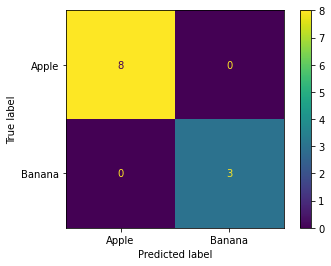

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
# included_in_model = np.nonzero(classifier.coef_.squeeze()>0)[0]
included_in_model = np.nonzero(classifier.coef_ != 0)[0]
print (len(included_in_model))
# print (classifier.coef_.shape)
# print (f"Indices of columns which are included in the model: {included_in_model}")

2


In [0]:
only_colname = food_ref[['food','Apple','Banana']]
only_colname.groupby(only_colname['food']).mean()

,Apple,Banana
food,,
Apple,0.147577,0.206442
Banana,0.227187,0.231378
Mix,0.169204,0.212542


###b) Did the bat eat banana?

In [0]:
# mix contains banana therfore will change to "banana". apple to "no banana"
X_banana = ref_features.copy().loc[apple | banana | mix ]
X_banana.loc[X_banana['food']== 'Mix', 'food'] = 'Banana'
X_banana.loc[X_banana['food']== 'Apple', 'food'] = 'No banana'
#remove "before" samples
# np.unique(ref_features['sample_time'])
after_5 = ref_features['sample_time']=='After 5'
after_8 = ref_features['sample_time']=='After 8'
X_banana = X_banana.copy().loc[after_5 | after_8 ]
print (np.unique(X_banana['sample_time']))
print (np.unique(X_banana['food']))
X_banana.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Banana' 'No banana']


In [0]:
# initializing features and labels
y = X_banana['food'].copy()
groups = X_banana['bat'].values
X = X_banana.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
# same model
from sklearn.linear_model import LogisticRegression
#different lambda
c =1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(-2)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.9 1
0.85 2
0.875 3
0.75 4
1.0 5
0.9090909090909091 6
0.8421052631578947 7
0.85 8
1.0 9
1.0 10
0.7 11
0.9473684210526315 12
Average score:  0.8852970494417862


Accuracy : 0.9473684210526315
Specificity : 1.0
Sensitivity : 0.875


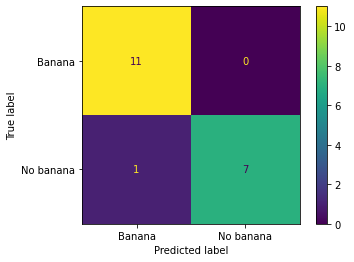

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

In [0]:
included_in_model = np.nonzero(classifier.coef_ != 0)[0]
print (len(included_in_model))
# print (classifier.coef_.shape)
# print (f"Indices of columns which are included in the model: {included_in_model}")

2


###c) Did the bat eat apple?

In [0]:
# mix contains apple therefore will change to "apple". banana to "no apple"
X_apple = ref_features.copy().loc[apple | banana | mix ]
X_apple.loc[X_apple['food']== 'Mix', 'food'] = 'Apple'
X_apple.loc[X_apple['food']== 'Banana', 'food'] = 'No apple'
#remove "before" samples
# np.unique(ref_features['sample_time'])
after_5 = ref_features['sample_time']=='After 5'
after_8 = ref_features['sample_time']=='After 8'
X_apple = X_apple.copy().loc[after_5 | after_8 ]
print (np.unique(X_apple['sample_time']))
print (np.unique(X_apple['food']))
X_apple.drop(['sample_time'], axis=1, inplace=True)

['After 5' 'After 8']
['Apple' 'No apple']


In [0]:
# initializing features and labels
y = X_apple['food'].copy()
groups = X_apple['bat'].values
X = X_apple.drop(['bat', 'food'], axis=1)
n_splits = 12

In [0]:
# same model
from sklearn.linear_model import LogisticRegression
#different lambda
c = 1e6
log_reg = LogisticRegression(C = c, penalty="l2", random_state=0, solver='liblinear')
# c = 1/np.exp(-1)
# log_reg = LogisticRegression(C = c, penalty="l1", random_state=0, solver='liblinear')

In [0]:
classifier, train_y, train_x, test_x, test_y = cv_score (X=X,y=y,groups=groups,n_splits=n_splits,test_size=2)

0.85 1
0.85 2
0.9375 3
0.75 4
0.8888888888888888 5
0.5454545454545454 6
0.8421052631578947 7
0.85 8
0.9230769230769231 9
0.8636363636363636 10
0.9 11
0.7368421052631579 12
Average score:  0.8281253407898145


Accuracy : 0.7368421052631579
Specificity : 0.6875
Sensitivity : 1.0


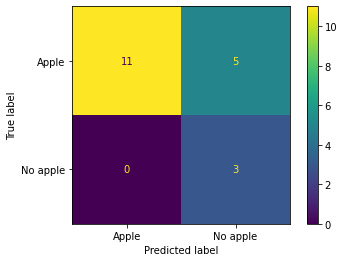

In [0]:
confusion_matrix (classifier, train_y, train_x, test_x, test_y)

###Conclusions


Running the model on the correlation of the samples with food reference reduces average score from 1.00 on interploated data to 0.96 on the correlation (in the apple-banana discrimination task), which is still a nice score. However, in the "banana- no banana" discrimination task average score is 0.89 (compares to 0.97 when running model on interploated data), and average score of 0.83 in the "apple- no apple" discrimination task (compares to 1.00 when running model on interploated data).

These results suggest thats the correlation of the samples with food reference is not good enough in predicting. It looks like the samples, which are taken after the digestion are not correlated enough with the orignial food. Maybe more data and more food sources are needed  to improve that method.


# 5. Model Selection: Analysis and Cross validation

In this section we analize principal aspects of the models used above.

## 5.1 Logistic Regression

The input data for the model

In [0]:
#prepare fetatures
all_features = interpolated_data.copy()
apple = interpolated_data['food']=='Apple'
banana = interpolated_data['food']=='Banana'
mix = interpolated_data['food']=='Mix'
features = all_features.copy().loc[apple | banana | mix]
# features.drop(['oral/anal', 'sample_id', 'sample_time'], axis=1, inplace=True)
features.drop(['oral/anal', 'sample_id'], axis=1, inplace=True)
features

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,pos_996.1,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9,sample_time
0,0,2_Sasha,Apple,0.000020,0.000020,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,...,0.000805,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755,After 8
1,0,2_Sasha,Apple,0.000017,0.000017,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,...,0.000456,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352,After 5
2,0,2_Sasha,Apple,0.000016,0.002653,0.004850,0.008865,0.016205,0.029621,0.054144,0.098970,0.180907,0.330678,0.007485,0.007836,0.006777,0.005860,0.005068,0.004383,0.003790,0.003278,0.004174,0.005315,0.006767,0.008617,0.010973,0.013972,0.012822,0.011767,0.010799,0.009910,0.009095,0.008346,0.007659,0.007029,0.007022,0.007015,0.007007,0.007000,0.006993,...,0.000445,0.000425,0.000406,0.000310,0.000237,0.000182,0.000139,0.000106,0.000081,0.000119,0.000174,0.000255,0.000374,0.000548,0.000804,0.000694,0.000599,0.000518,0.000447,0.000386,0.000334,0.000288,0.000266,0.000246,0.000228,0.000211,0.000195,0.000180,0.000167,0.000168,0.000170,0.000171,0.000173,0.000175,0.000176,0.000178,0.000216,0.000263,0.000319,Before
3,0,2_Sasha,Apple,0.000018,0.000018,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,...,0.000713,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475,After 8
4,0,2_Sasha,Apple,0.000016,0.000016,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.0144

### Lasso Regression: Cross validataion for Lambda parameter 


We performed a cross-validation analysis to select the proper 'lambda' parameterer which regulizes the regression. We compared the Area Under Curve (AUC) of the ROC for several lamdas (1/c in sklearn.LogiticRegression). 

We also tested how the regularization paramter (lambda) affects the number of the features used by the model.

This analysis was done for the question" "did the bat eat banana?".

In [0]:
# Cross-validation regression with L1 regularization (LASSO)
# to set the regularization parameter (lambda or 1/c)
# Imports
# from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
import numpy as np


In [0]:
# relevant data for the question : (Without before)
X_banana = features.copy().loc[apple | banana | mix ]
X_banana.loc[X_banana['food']== 'Mix', 'food'] = 'Banana'
X_banana.loc[X_banana['food']== 'Apple', 'food'] = 'No banana'
X_banana = X_banana.drop(X_banana[X_banana['sample_time'] == 'Before'].index)
X_banana = X_banana.drop(X_banana[X_banana['sample_time'] == 'before'].index)
print (np.unique(X_banana['food']))
X_banana.drop(['sample_time'], axis=1, inplace=True)
y = X_banana['food'].copy()
groups = X_banana['bat'].values
X = X_banana.drop(['bat', 'food'], axis=1)
X

['Banana' 'No banana']


,Unnamed: 0,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,neg_1002.7,neg_1002.8,...,pos_996.0,pos_996.1,pos_996.2,pos_996.3,pos_996.4,pos_996.5,pos_996.6,pos_996.7,pos_996.8,pos_996.9,pos_997.0,pos_997.1,pos_997.2,pos_997.3,pos_997.4,pos_997.5,pos_997.6,pos_997.7,pos_997.8,pos_997.9,pos_998.0,pos_998.1,pos_998.2,pos_998.3,pos_998.4,pos_998.5,pos_998.6,pos_998.7,pos_998.8,pos_998.9,pos_999.0,pos_999.1,pos_999.2,pos_999.3,pos_999.4,pos_999.5,pos_999.6,pos_999.7,pos_999.8,pos_999.9
0,0,0.000020,0.000020,0.036515,0.052554,0.075637,0.108859,0.156674,0.225490,0.324532,0.467076,0.010828,0.011309,0.011811,0.012335,0.012883,0.013455,0.014052,0.014676,0.015327,0.016008,0.008125,0.004124,0.002093,0.001062,0.000539,0.000274,0.000591,0.001276,0.002755,0.005949,0.012844,0.013025,0.013208,0.013394,0.013583,0.013774,0.013968,0.014165,0.014364,...,0.000835,0.000805,0.000775,0.000747,0.000720,0.000693,0.000668,0.000643,0.000620,0.000597,0.000575,0.000311,0.000169,0.000091,0.000049,0.000027,0.000055,0.000112,0.000228,0.000465,0.000950,0.000920,0.000891,0.000863,0.000835,0.000809,0.000783,0.000759,0.000735,0.000711,0.000689,0.000344,0.000172,0.000086,0.000043,0.000022,0.000052,0.000128,0.000310,0.000755
1,0,0.000017,0.000017,0.027724,0.043445,0.068080,0.106685,0.167179,0.261976,0.410527,0.643312,0.015698,0.014000,0.012486,0.011135,0.009931,0.008857,0.007899,0.007044,0.006283,0.007291,0.008461,0.009818,0.011394,0.013222,0.015343,0.017805,0.012592,0.008905,0.006297,0.004453,0.003149,0.002227,0.001575,0.002177,0.003010,0.004160,0.005751,0.007950,0.010990,...,0.000413,0.000456,0.000503,0.000555,0.000613,0.000676,0.000746,0.000397,0.000211,0.000113,0.000060,0.000032,0.000017,0.000037,0.000080,0.000175,0.000381,0.000828,0.000805,0.000782,0.000759,0.000738,0.000717,0.000696,0.000676,0.000657,0.000638,0.000549,0.000472,0.000406,0.000350,0.000301,0.000259,0.000223,0.000301,0.000406,0.000549,0.000741,0.001001,0.001352
3,0,0.000018,0.000018,0.022990,0.034898,0.052974,0.080411,0.122060,0.185281,0.281247,0.426918,0.011098,0.010952,0.010809,0.011563,0.012370,0.013233,0.014156,0.015144,0.016200,0.017331,0.018540,0.019834,0.012479,0.007852,0.004941,0.003109,0.001956,0.001231,0.001838,0.002744,0.004097,0.006117,0.009134,0.013639,0.010314,0.007799,0.005898,0.004460,0.003373,...,0.000682,0.000713,0.000745,0.000779,0.000814,0.000851,0.000889,0.000929,0.000971,0.000944,0.000916,0.000890,0.000865,0.000840,0.000816,0.000792,0.000770,0.000748,0.000782,0.000818,0.000856,0.000896,0.000937,0.000981,0.001026,0.001074,0.001123,0.001175,0.000827,0.000583,0.000410,0.000289,0.000203,0.000143,0.000211,0.000311,0.000459,0.000678,0.001000,0.001475
4,0,0.000016,0.000016,0.032644,0.047720,0.069760,0.101979,0.149079,0.217931,0.318583,0.465722,0.019265,0.019298,0.019331,0.019364,0.019397,0.019430,0.019463,0.019209,0.018958,0.018710,0.018466,0.018225,0.017987,0.017752,0.017521,0.017292,0.017066,0.016661,0.016265,0.015878,0.015501,0.015133,0.014773,0.014422,0.014080,0.013745,0.014506,0.015310,0.016158,...,0.000525,0.000610,0.000708,0.000821,0.000954,0.001107,0.001285,0.001492,0.001497,0.001502,0.001508,0.001513,0.001519,0.001524,0.001529,0.001535,0.001540,0.001546,0.001551,0.001102,0.000783,0.000556,0.000395,0.000281,0.000200,0.000278,0.000386,0.000538,0.000748,0.001041,0.001449,0.001554,0.001668,0.001789,0.001919,0.002059,0.002209,0.002370,0.002543,0.002728
6,0,0.000019,0.000019,0.000019,0.001558,0.003501,0.007864,0.017667,0.039689,0.089160,0.200298,0.023156,0.024475,0.023022,0.021655,0.020369,0.019160,0.018022,0.016952,0.015946,0.014999,0.014108,0.014900,0.015737,0.016621,0.017554,0.018540,0.019581,0.020680,0.021842,0.016168,0.011968,0.0088

### a) AUC

In [0]:
# regularization
c = np.array([0.01, 0.1, 1, 5, 10, 20, 100])# np.exp(np.arange(2,3,0.1))# Note **above
# logistic regression 
log_reg_l1 = LogisticRegressionCV(max_iter= 1e4, random_state=54441, cv = 12 ,
                                 Cs = 1/c, 
                                 penalty='l1', 
                                 solver = "liblinear", 
                                 scoring="roc_auc")
log_reg_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.e+02, 1.e+01, 1.e+00, 2.e-01, 1.e-01, 5.e-02, 1.e-02]),
                     class_weight=None, cv=12, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=10000.0,
                     multi_class='auto', n_jobs=None, penalty='l1',
                     random_state=54441, refit=True, scoring='roc_auc',
                     solver='liblinear', tol=0.0001, verbose=0)

c= [1.e-02 1.e-01 1.e+00 5.e+00 1.e+01 2.e+01 1.e+02]
AUC scores for c = 
 [0.98148148 0.95833333 0.95833333 0.9224537  0.65115741 0.5
 0.5       ]


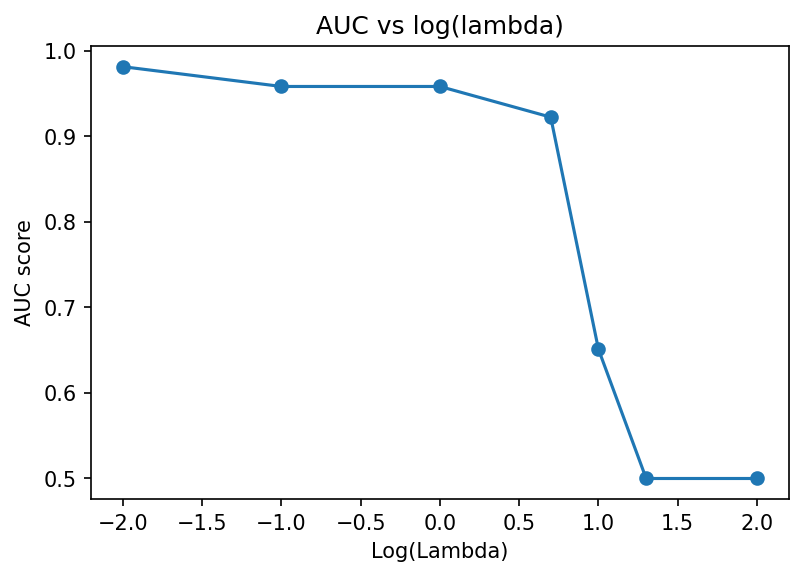

In [0]:
# auc_scores = log_reg_l1.scores_['Banana'].mean(axis=0)
auc_scores = log_reg_l1.scores_['No banana'].mean(axis=0)
print("c=", c)
print("AUC scores for c = \n",auc_scores)

fig, ax = plt.subplots()
ax.plot(np.log10(c), auc_scores,'-o')
ax.set_xlabel('Log(Lambda)')
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# xlabels = [str(x) for x in list(c)]
# ax.set_xticklabels(xlabels)
ax.set_ylabel('AUC score')
ax.set_title('AUC vs log(lambda)')
fig.set_dpi(150)

plt.show()

'Lambda' defines the regularization strength, as lambda gets bigger the cost of adding more variables to the model grows. In the figure above, we can see that the AUC of the different model is close to 1 (its therotical maximum value) when lambda is below 5. the AUC drpos rapidly at lambda's values between 5 to 15.

Therfore, we chose lambda=1/exp(4) << 10. We calculated the AUC of the ROC for the selected model:

Train size =  88
Test size =  23


Text(0.5, 1.0, 'ROC plot of the selected model')

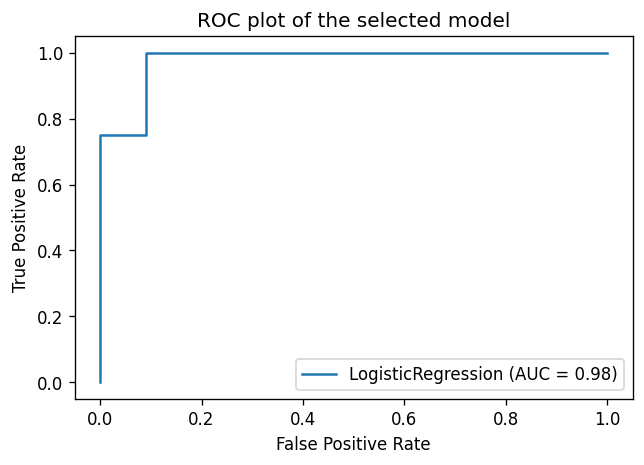

In [0]:
# the ROC of the selected model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split arrays into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size=0.2, random_state=54441)
print("Train size = ", y_train.size) # Check
print("Test size = ", y_test.size) # Check

# The selected model
c = 1/np.exp(-4) # my selection


selected_model = LogisticRegression(C = c,
                                    penalty="l1", 
                                    random_state=54441, solver='liblinear', max_iter= 1e4)
clf = selected_model.fit(X_train,y_train)

from sklearn.metrics import plot_roc_curve

plot_roc_curve(selected_model, X_test, y_test)
fig = plt.gcf()
fig.set_dpi(120)
plt.title('ROC plot of the selected model')

###b) The number of features used in the model


The number of featrues in the regression as a function of the regularization strength:

In [0]:
 #split train-test by groups of bats (2 bats in test)
test_size=2 # leave two bats in the test-group
n_splits = 12
groups_to_split = X_banana['bat'].values
gss = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=0)
data_split = gss.split(X, y, groups=groups_to_split)
index_all = [k for k in data_split]

# select the last split
last_idx= index_all[6]
train_idx = last_idx[0]
test_idx = last_idx[1]

train_y = y.iloc[train_idx]
train_x = X.iloc[train_idx]
test_y =  y.iloc[test_idx]
test_x = X.iloc[test_idx]
print('tested bats: ', X_banana.iloc[test_idx]['bat'].unique())

tested bats:  ['4_Yael' '10_Roy']


In [0]:
# the number of features in the model as a function of lambda (the regularization strength)

c_vec =  np.array([1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 0.1,  1,2,3,4,5,6,7,8,9,10, 100]) 
# init
n_features = np.zeros(np.shape(c_vec))
acc_score = np.zeros(np.shape(c_vec))
all_features = [] # empty list

for idx, reg_power in enumerate(c_vec):
  # print(idx, ':', reg_power)
  log_reg = LogisticRegression(C = 1/reg_power, penalty="l1", 
                               random_state=0, solver='liblinear'
                               )
  clf = log_reg.fit(train_x, train_y)
  # cur_features = np.nonzero(clf.coef_.squeeze()>0)[0]
  cur_features = np.argwhere(clf.coef_ !=0 )[:,1]
  print(idx, ':', cur_features.shape)
  # relevemt_genes = np.argwhere(gene_coeff!=0)[:,1]
  n_features[idx] = len(cur_features)
  all_features.append([cur_features])
  acc_score[idx] = clf.score(test_x, test_y)
  

0 : (7032,)
1 : (1363,)
2 : (706,)
3 : (434,)
4 : (334,)
5 : (112,)
6 : (45,)
7 : (26,)
8 : (5,)
9 : (3,)
10 : (2,)
11 : (2,)
12 : (2,)
13 : (2,)
14 : (1,)
15 : (1,)
16 : (0,)
17 : (0,)
18 : (0,)


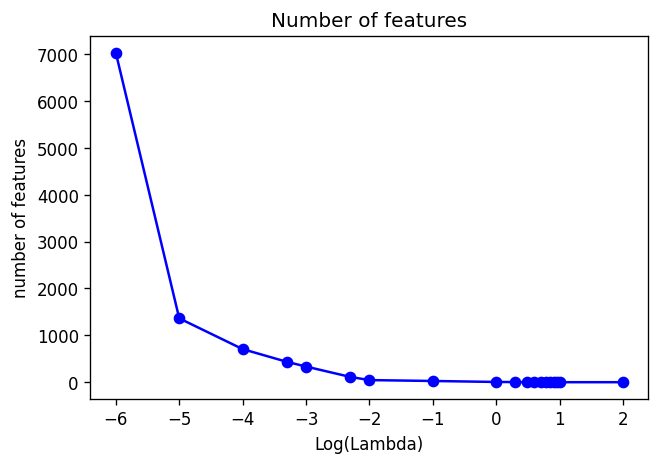

In [0]:
fig, ax1 = plt.subplots()
ax1.plot(np.log10(c_vec), n_features,'-ob')
ax1.set_xlabel('Log(Lambda)')
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

ax1.set_ylabel('number of features')
ax1.set_title('Number of features')

fig.set_dpi(120)

plt.show()

Zoom in

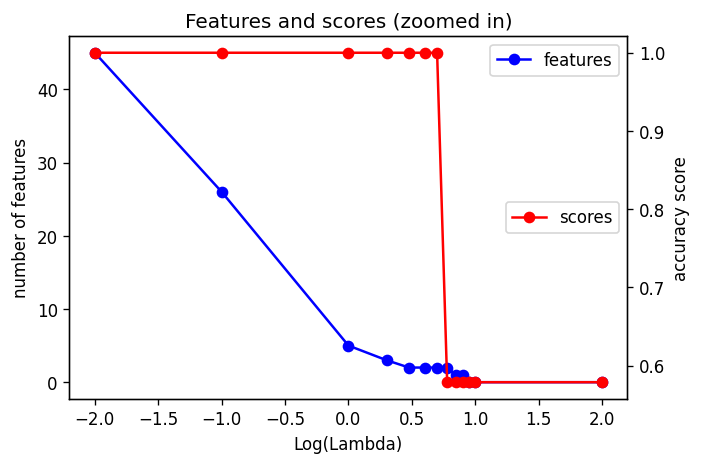

In [0]:
zoom_ix = np.log10(c_vec) >= -2
fig, ax1 = plt.subplots()
ax1.plot(np.log10(c_vec[zoom_ix]), n_features[zoom_ix],'-ob')
ax1.set_xlabel('Log(Lambda)')
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

ax1.set_ylabel('number of features')
ax1.set_title('Features and scores (zoomed in)')
ax1.legend(['features'], loc="upper right")
ax2 = ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.log10(c_vec[zoom_ix]), acc_score[zoom_ix],'-or')
ax2.set_ylabel('accuracy score')
ax2.legend(['scores'], loc="center right")
fig.set_dpi(120)

plt.show()


In [0]:
# quick analysis
max_idx = np.argwhere(acc_score > 0.8)[-1]
max_score = acc_score[max_idx]
max_lambda = c_vec[max_idx] 
min_features = n_features[max_idx]
req_features = all_features[max_idx[0]]
print('maximum regularization strength: ', max_lambda)
print('minimum number of features: ', min_features)
print('the acc score: ', max_score)
print('the features: ', req_features)

maximum regularization strength:  [5.000000]
minimum number of features:  [2.000000]
the acc score:  [1.000000]
the features:  [array([20213, 25383])]


In [0]:
# the substances used in the model
print( 'Last substances in max regularization: ',train_x.columns[req_features[0]], '\n')
idx_10 = np.argwhere(n_features <= 10)[0]

print('Last 10 substances: ', train_x.columns[all_features[idx_10[0]]], '\n')


Last substances in max regularization:  Index(['pos_111.1', 'pos_158.1'], dtype='object') 

Last 10 substances:  Index(['neg_162.9', 'pos_111.1', 'pos_158.1', 'pos_214.1', 'pos_214.2'], dtype='object') 



/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:3940: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


We can see above that the regression model succeeds with the prediction of the food compments even with a very small numer of features (mass-spectrometry substances). Only he the number is redusec to one or two the performce decreases.

The logistic regression with L1 regulation gives excellent results for discrimination between apple and banana (0.97-1.0, according to the specific question). The regularization also helps in finding the specific substances of the mass-spectrometry that segregate between the food components. According to our results even one or two substances are sufficient. In order to build a robust predictor, we advise using a regularization that keeps ca. 20 substances.

## 5.2 PCA Analysis 

Each row in our data is composed from negative and positive spectrometries (vectors) of a single sample. The values in those vectors are correlated because they represent the concentration of peptide sequences in the sample. Some of the peptide sequences are derived from the same protein molecules. Thus, we assume that we can reduce the dimensions of the model.
 
For visualization, we will plot the separation of 2, and 3-components PCA. 
We will also run a PCA model with number of component between 1-to 100 in order to fit this number to a total **explained_variance_ratio_ **of 90%.

In [0]:
import sklearn as skl
from sklearn.decomposition import PCA

In [0]:
df_for_pca = interpolated_data.copy()

x_cols = [cols for cols in df_for_pca.columns if ('pos_' in cols) | ('neg_' in cols)]
X_data = df_for_pca.loc[:,x_cols]
Y_data = df_for_pca['food']

# apply 'Before' to food
# before_idx = df_for_pca['sample_time'] == 'Before'
# Y_data[before_idx] = 'Before'

# X_data.drop('food', axis=1, inplace=True) 
np.unique(Y_data)

array(['Apple', 'Banana', 'Mix'], dtype=object)

In [0]:
len(x_cols )

38002

### a) 2-components PCA

In [0]:
n_pca_comp = 2  # number of components for pca 
pca = PCA(n_components= n_pca_comp) 

projected = pca.fit_transform(X_data)
np.shape(projected)

(165, 2)

In [0]:
print('explained variance ratio: ', np.sum(pca.explained_variance_ratio_))
np.round(pca.explained_variance_ratio_,2)

explained variance ratio:  0.3927351991513214


array([0.220000, 0.170000])

In [0]:
# colormap of the Y_data
lut1 = {'Apple': 'r',
          'Banana': 'y',
          'Mix': 'm',
          'Before': 'k'
          }
  # print(lut1)
cols_by_food = Y_data.map(lut1)
np.sum(cols_by_food == 'r')

62

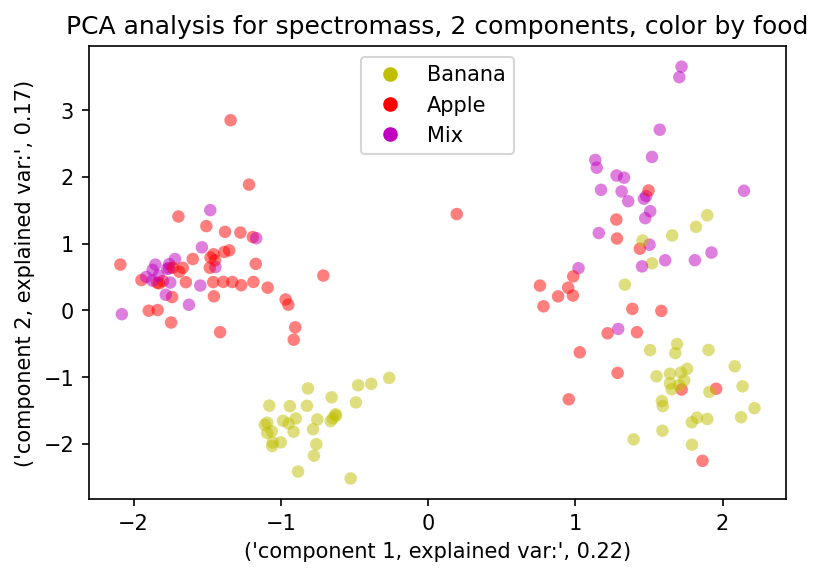

In [0]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots()
ax_scatter = ax.scatter(projected[:, 0], projected[:, 1],
            c = cols_by_food,
            # label =  Y_data,
            edgecolor='none', 
            alpha=0.5,
            )

plt.title('PCA analysis for spectromass, 2 components, color by food')
exp_var = np.round(pca.explained_variance_ratio_, 2)
exp_var[0]
xl = 'component 1, explained var:', exp_var[0] 
yl = 'component 2, explained var:', exp_var[1]

legend_elements = [Line2D([0], [0], marker='o', color='y',linestyle='none', label='Banana'),
                  Line2D([0], [0], marker='o', color='r', linestyle='none', label='Apple'),
                  Line2D([0], [0], marker='o', color='m', linestyle='none', label='Mix')]


plt .legend(handles = legend_elements, loc="upper center");  
plt.xlabel(xl )
plt.ylabel(yl)
fig.set_dpi(150)
plt.show()
#  fix labels
# fix legend: {'Apple': 'red',
#           'Banana': 'yellow',
#           'Mix': 'magenta',
#           'Before': 'black'
#           }


Remove 'Before' samples

In [0]:
before_idx = (df_for_pca['sample_time'] == 'Before')|(df_for_pca['sample_time'] == 'before')
# results_onebat_noBefore = results_onebat.drop(results_onebat[before_idx].index)
X_data_noBefore = X_data.drop(X_data[before_idx].index)
Y_data_noBefore = Y_data.drop(Y_data[before_idx].index)

pca2= PCA(2)
projected_noBefore = pca2.fit_transform(X_data_noBefore)

In [0]:
print('explained variance ratio: ', np.sum(pca2.explained_variance_ratio_))
np.round(pca2.explained_variance_ratio_,2)

explained variance ratio:  0.41004991982011785


array([0.240000, 0.170000])

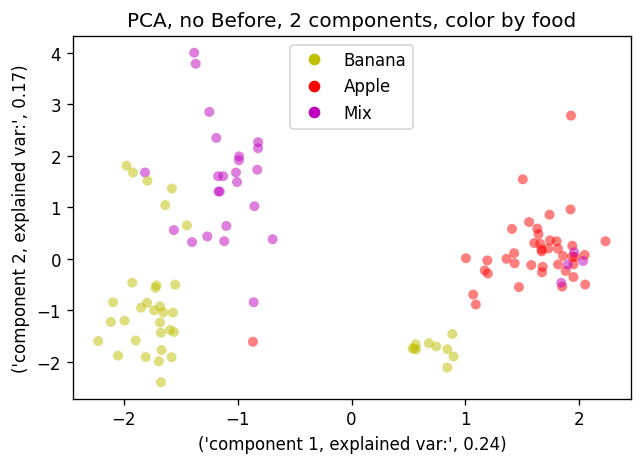

In [0]:
fig, ax = plt.subplots()
cols_by_food = Y_data_noBefore.map(lut1)
ax_scatter = ax.scatter(projected_noBefore[:, 0], projected_noBefore[:, 1],
            c = cols_by_food,
            # label =  Y_data,
            edgecolor='none', 
            alpha=0.5,
            )
plt.title('PCA, no Before, 2 components, color by food')
exp_var = np.round(pca2.explained_variance_ratio_, 2)
exp_var[0]
xl = 'component 1, explained var:', exp_var[0] 
yl = 'component 2, explained var:', exp_var[1]

legend_elements = [Line2D([0], [0], marker='o', color='y',linestyle='none', label='Banana'),
                  Line2D([0], [0], marker='o', color='r', linestyle='none', label='Apple'),
                  Line2D([0], [0], marker='o', color='m', linestyle='none', label='Mix')]


plt .legend(handles = legend_elements, loc="upper center");  
plt.xlabel(xl )
plt.ylabel(yl)
fig.set_dpi(120)
plt.show()

The figure above depicts a good descrimunation beteen 'apple' (red) and 'banana' (yellow), even by applying a PCA with only 2 components. 

### b) 3-componenets PCA (without 'Before' samples)

In [0]:
# 3 compenents PCA - no 'Before' samples

pca = PCA(3)
projected = pca.fit_transform(X_data_noBefore)
np.shape(projected)

(111, 3)

In [0]:
print('explained variance ratio: ', np.sum(pca.explained_variance_ratio_))
np.round(pca.explained_variance_ratio_,2)
# projected[:, 2]

explained variance ratio:  0.48444586932538625


array([0.240000, 0.170000, 0.070000])

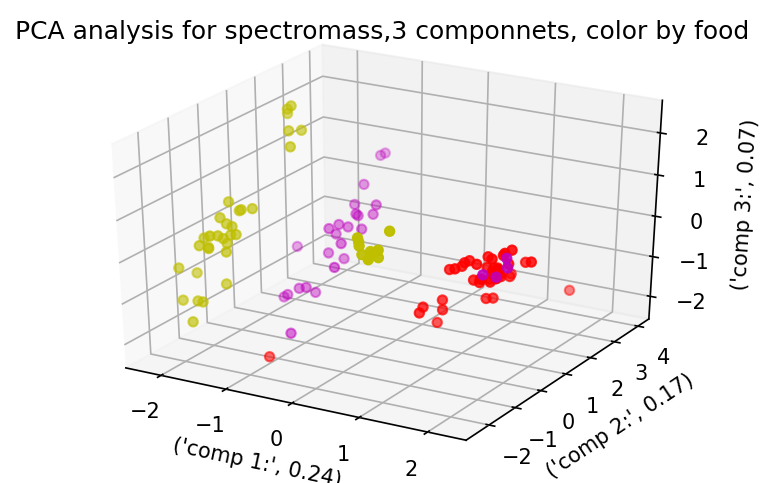

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax_scatter = ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], 
                        marker='o', c = cols_by_food
                        )
                        # edgecolor='none',
                        # alpha=0.5
                        # )

plt.title('PCA analysis for spectromass,3 componnets, color by food')
exp_var = np.round(pca.explained_variance_ratio_, 2)
exp_var[0]
xl = 'comp 1:', exp_var[0] 
yl = 'comp 2:', exp_var[1]
zl = 'comp 3:', exp_var[2] 

ax.set_xlabel(xl )
ax.set_ylabel(yl)
ax.set_zlabel(zl)
fig.set_dpi(150)
plt.show()

### c) Explained Variance

Set the number of PCA components according to explained variance ratio:


In [0]:
# Test: 
n_pca_comp = [ 2, 3, 5, 10, 20, 50, 100]  # number of components for pca 
expl_var = np.zeros(np.shape(n_pca_comp))
for k,n_comp in enumerate(n_pca_comp):
  pca = PCA(n_components= n_comp) 
  projected = pca.fit_transform(X_data)
  expl_var[k] = np.sum(pca.explained_variance_ratio_)



In [0]:
print([*zip(n_pca_comp, expl_var)])

[(2, 0.3927351991513208), (3, 0.4787590577551334), (5, 0.5715837532783012), (10, 0.6899924401035511), (20, 0.7745694077958911), (50, 0.8810011970676098), (100, 0.957398752787859)]


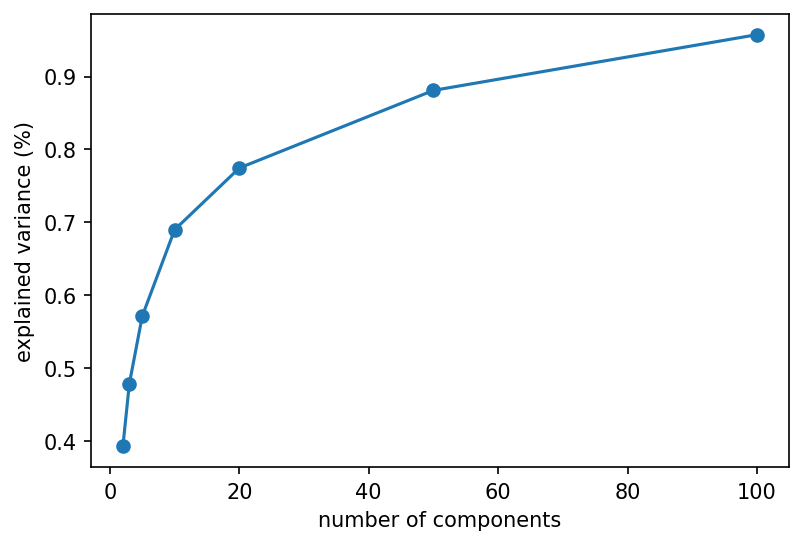

In [0]:
plt.plot(n_pca_comp, expl_var,'o-')
plt.xlabel('number of components')
plt.ylabel('explained variance (%)')

fig = plt.gcf()
fig.set_dpi(150)


We can see that 60 componenets expalain 90% of the variance

we select a model with 60 compoenents (instead of spectro-mass with 38000 values)


###d) 60-componenets PCA

Build the PCA model with 60 coefficients

Output: pca60_model_df (DataFrame)

In [0]:
n_comp =60
pca = PCA(n_components= n_comp) 
projected_sel = pca.fit_transform(X_data)
expl_var= np.sum(pca.explained_variance_ratio_)

In [0]:
print('number of components:', n_comp)
print('expained variance(%):', expl_var)

number of components: 60
expained variance(%): 0.9020901830297924


In [0]:
# PCA model 
pca60_model_df = pd.DataFrame(projected_sel)
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
pca60_model_df[colls_to_copy] = df_for_pca.loc[:,colls_to_copy].copy()
pca60_model_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,bat,food,sample_id,sample_time,oral/anal
0,-1.089734,0.340914,-0.426788,-0.756554,-0.572018,0.617546,-0.705806,-0.147141,0.346583,0.487286,0.019670,0.206350,-0.111173,0.096646,-0.001672,0.155241,0.078605,-0.245476,0.059606,-0.036051,0.002852,0.032764,-0.097622,0.109068,0.018972,0.022186,0.001325,-0.055828,0.071219,0.005811,-0.050853,-0.143423,0.111869,0.131342,0.030271,-0.033398,0.053617,0.041729,-0.018781,0.235482,-0.025786,0.004425,0.046158,-0.061255,-0.065570,-0.154771,-0.146791,0.052330,-0.074277,-0.031044,0.010378,-0.037633,-0.086174,-0.054569,0.053966,-0.145559,-0.163904,0.122206,0.027929,-0.136004,2_Sasha,Apple,YY20-136,After 8,Oral
1,-1.412545,-0.326287,-0.041774,-0.522526,1.076286,0.602558,-0.734783,-0.567268,0.740389,0.250861,-0.359199,0.098217,-0.235683,0.409632,-0.037444,0.174786,0.069910,0.169659,0.104843,-0.056487,-0.141333,-0.031075,-0.155722,0.011716,0.027323,-0.004426,0.085460,0.016862,-0.127999,0.033037,0.058136,-0.019986,-0.039191,-0.042517,-0.075291,-0.073618,-0.169851,0.049350,0.021984,0.001620,0.015693,-0.138415,-0.203921,-0.067650,-0.108572,0.014269,-0.016542,0.112450,0.222487,0.059607,-0.000702,-0.086290,-0.073762,-0.040938,0.204183,0.004998,0.003507,-0.069809,0.021568,-0.059413,2_Sasha,Apple,YY20-134,After 5,Oral
2,1.722168,-1.186320,0.418639,-0.612697,-0.483281,0.765842,0.097853,-0.436909,0.008678,-0.366283,0.037903,-0.218804,0.019477,0.030882,-0.209973,-0.110153,0.155732,0.018840,0.176980,0.234479,0.102896,-0.099985,0.089387,0.021746,-0.034434,-0.173011,0.023344,-0.028099,-0.108273,-0.157339,-0.009083,-0.025941,0.153799,0.034285,0.073894,-0.093989,0.075526,-0.022466,0.020409,-0.120953,0.112111,-0.121249,-0.128676,0.155489,-0.007108,-0.016047,0.043780,-0.049991,0.083551,-0.093128,-0.013233,0.020104,-0.008898,-0.005737,-0.076036,-0.116287,0.118620,0.047450,-0.140552,-0.007124,2_Sasha,Apple,YY20-100,Before,Oral
3,-0.967730,0.164687,-0.688200,0.387386,-0.132043,1.032493,-0.093437,0.710301,0.307563,0.098322,-0.103088,0.137843,0.037707,-0.180391,-0.104076,0.258591,-0.096130,0.263350,-0.074549,-0.039879,-0.316940,-0.036540,0.048981,0.132413,0.360040,-0.107607,0.102090,0.062044,0.326112,0.125516,-0.081831,-0.159411,0.045525,-0.219071,-0.039449,-0.119075,-0.091762,-0.113252,0.084242,-0.267581,0.046401,0.034900,0.031424,0.103405,0.082841,0.038681,-0.055830,-0.105688,0.053529,-0.081694,0.156077,-0.073306,0.066175,-0.135494,-0.131508,-0.146379,-0.187183,-0.080053,-0.046797,-0.204167,2_Sasha,Apple,YY20-135,After 8,Anal
4,-1.329588,0.425053,0.221251,2.295661,1.330878,1.629314,0.360222,-0.295172,0.458576,0.161866,-0.465390,0.121887,-0.162523,0.451301,-0.228406,0.289461,-0.026681,0.327825,0.241669,-0.067422,-0.151821,-0.026706,-0.031322,-0.002893,-0.101156,0.125165,0.131305,0.065308,0.750014,0.246415,0.272898,0.226233,0.382794,1.163710,-0.024883,0.309833,0.024610,-0.416187,-0.190758,-0.313564,-0.279633,-0.255108,-0.017970,0.038856,0.117634,-0.021704,0.361291,0.120036,-0.049256,0.224267,0.089041,0.197043,-0.110415,0.203968,-0.354512,-0.045725,-0.039978,0.007809,-0.014880,0.187658,2_Sasha,Apple,YY20-133,After 5,Anal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,1.030395,-0.628299,-2.451830,-0.483460,-0.110491,-0.013402,1.244017,-0.325338,0.348026,0.465032,-0.676271,0.365659,0.182700,-0.579417,0.724130,0.367352,-0.485163,-0.042334,0.195525,-0.256375,0.046667,0.498044,0.316464,0.711710,-0.226723,0.155498,0.065030,0.382862,-0.223787,0.237271,-0.507857,-0.169018,-0.249949,0.430903,-0.200251,0.144861,0.098242,0.006093,0.277703,-0.156084,0.227423,0.029512,0.649111,0.195188,-0.033030,-0.339489,0.095388,-0.187064,0.372359,-0.282823,0.350924


Build the PCA model with 2 coefficients

Output: pca2_model_df (DataFrame)

In [0]:
n_comp =2
pca = PCA(n_components= n_comp) 
projected_sel = pca.fit_transform(X_data)
expl_var= np.sum(pca.explained_variance_ratio_)

In [0]:
# PCA model 
pca2_model_df = pd.DataFrame(projected_sel)
colls_to_copy= ['bat','food', 'sample_id', 'sample_time', 'oral/anal']
pca2_model_df[colls_to_copy] = df_for_pca.loc[:,colls_to_copy].copy()
pca2_model_df

,0,1,bat,food,sample_id,sample_time,oral/anal
0,-1.089734,0.340914,2_Sasha,Apple,YY20-136,After 8,Oral
1,-1.412545,-0.326287,2_Sasha,Apple,YY20-134,After 5,Oral
2,1.722168,-1.186320,2_Sasha,Apple,YY20-100,Before,Oral
3,-0.967730,0.164687,2_Sasha,Apple,YY20-135,After 8,Anal
4,-1.329588,0.425053,2_Sasha,Apple,YY20-133,After 5,Anal
...,...,...,...,...,...,...,...
160,1.030395,-0.628299,6_Omer,Banana,YY20-062,After 5,Oral
161,-0.647158,-1.618681,6_Omer,Banana,YY20-020,Before,Oral
162,-1.078790,-1.427188,6_Omer,Banana,YY20-063,After 8,Anal
163,-0.661457,-1.659711,6_Omer,Banana,YY20-061,After 5,Anal


## 5.3 Correlation with Reference: Apple and Banana

load the mass-spectrometies of the references apples and bananas

Upload from google drive

In [0]:
# make sure the data is in the right location or change root.
reference_df = pd.read_csv('/content/gdrive/My Drive/ML_bats_project/Data_Frame_reference.csv')

Or upload from local drive

In [0]:
# Load refernce DataFrame ('Data_Frame_reference.csv')
# spectorgram of apple and banana 
from google.colab import files

import io
uploaded = files.upload()

# m_data = pd.read_csv(io.BytesIO(uploaded['Data_Frame_2020_03_09_12_01_12.csv'])) # OLD
reference_df = pd.read_csv(io.BytesIO(uploaded['Data_Frame_reference.csv'])) # 


In [0]:
# interpolating and normalizing reference_df
int_ref_data, norm_ref_neg, ref_mass_neg =  my_interpolation(reference_df,'neg_') 
ref_cols_neg = [i for i in int_ref_data.columns if  'neg_' in i]
reference_df.loc[:,ref_cols_neg] = reference_df[ref_cols_neg].multiply(1/norm_ref_neg, axis=0) 

int_ref_data

,Unnamed: 0,bat,food,neg_100.0,neg_100.1,neg_100.2,neg_100.3,neg_100.4,neg_100.5,neg_100.6,neg_100.7,neg_100.8,neg_100.9,neg_1000.0,neg_1000.1,neg_1000.2,neg_1000.3,neg_1000.4,neg_1000.5,neg_1000.6,neg_1000.7,neg_1000.8,neg_1000.9,neg_1001.0,neg_1001.1,neg_1001.2,neg_1001.3,neg_1001.4,neg_1001.5,neg_1001.6,neg_1001.7,neg_1001.8,neg_1001.9,neg_1002.0,neg_1002.1,neg_1002.2,neg_1002.3,neg_1002.4,neg_1002.5,neg_1002.6,...,neg_734.1,neg_734.2,neg_734.3,neg_734.4,neg_734.5,neg_734.6,neg_734.7,neg_734.8,neg_734.9,neg_735.0,neg_735.1,neg_735.2,neg_735.3,neg_735.4,neg_735.5,neg_735.6,neg_735.7,neg_735.8,neg_735.9,neg_736.0,neg_736.1,neg_736.2,neg_736.3,neg_736.4,neg_736.5,neg_736.6,neg_736.7,neg_736.8,neg_736.9,neg_737.0,neg_737.1,neg_737.2,neg_737.3,neg_737.4,neg_737.5,neg_737.6,neg_737.7,neg_737.8,neg_737.9,neg_738.0
0,0,reference,Apple,0.000013,0.000013,0.000013,0.000036,0.000072,0.000146,0.000294,0.000594,0.001199,0.002421,0.003244,0.002633,0.002606,0.002579,0.002553,0.002527,0.002501,0.002475,0.002450,0.002425,0.002542,0.002664,0.002792,0.002926,0.003067,0.003214,0.003369,0.003531,0.003700,0.003878,0.003197,0.002636,0.002173,0.001792,0.001477,0.001218,0.001004,...,0.006087,0.007066,0.008203,0.005140,0.003220,0.002018,0.001264,0.000792,0.000496,0.000656,0.000868,0.001148,0.001518,0.002008,0.002655,0.003244,0.003963,0.004842,0.005916,0.007228,0.008831,0.010789,0.013182,0.016104,0.019676,0.008831,0.003964,0.001779,0.000799,0.000358,0.000616,0.001058,0.001818,0.003123,0.005365,0.009217,0.007479,0.006070,0.004926,0.003997
1,0,reference,Apple,0.000034,0.000034,0.000141,0.000130,0.000120,0.000111,0.000102,0.000094,0.000279,0.000826,0.011874,0.010640,0.009533,0.008542,0.007654,0.006858,0.006145,0.005506,0.004979,0.004503,0.004072,0.003683,0.003331,0.003012,0.002724,0.002464,0.002228,0.002482,0.002765,0.003081,0.003433,0.003824,0.004261,0.004747,0.005187,0.005667,0.006191,...,0.000995,0.001349,0.001830,0.002483,0.003368,0.003929,0.004584,0.005349,0.006240,0.007281,0.008495,0.009911,0.011564,0.012914,0.014423,0.016107,0.017989,0.020090,0.022436,0.025057,0.027983,0.031251,0.034902,0.038978,0.043530,0.040831,0.038299,0.035923,0.033695,0.031606,0.029646,0.027807,0.026083,0.024465,0.022948,0.020561,0.018423,0.016507,0.014791,0.013253
2,0,reference,Plastic tube + MeOH + H2O + MeCN,0.000089,0.000089,0.000089,0.000089,0.000212,0.000379,0.000677,0.001211,0.002166,0.003874,0.011937,0.009566,0.010314,0.011119,0.011988,0.012924,0.013933,0.015022,0.016195,0.017460,0.015842,0.014373,0.013041,0.011832,0.010735,0.009740,0.008837,0.008018,0.007275,0.006601,0.007759,0.009121,0.010722,0.012603,0.014815,0.017416,0.016440,...,0.014626,0.013100,0.011733,0.010508,0.009411,0.008429,0.010105,0.012115,0.014524,0.017412,0.020875,0.025026,0.030003,0.027748,0.025661,0.023732,0.021948,0.020298,0.018772,0.017361,0.016055,0.017038,0.018082,0.019189,0.020364,0.021611,0.022934,0.024339,0.025829,0.027411,0.029089,0.027505,0.026007,0.024591,0.023252,0.021986,0.020789,0.019657,0.018586,0.014895
3,0,reference,Banana,0.000005,0.000005,0.000005,0.000005,0.000012,0.000028,0.000065,0.000149,0.000342,0.000785,0.002045,0.001752,0.001501,0.001286,0.001325,0.001364,0.001405,0.001447,0.001491,0.001536,0.001582,0.001629,0.001678,0.001728,0.000645,0.000241,0.000090,0.000034,0.000013,0.000028,0.000061,0.000133,0.000293,0.000645,0.001419,0.001282,0.001159,...,0.000533,0.000424,0.000337,0.000548,0.000892,0.001452,0.002362,0.003844,0.003390,0.002990,0.002637,0.002325,0.002051,0.001809,0.001595,0.001407,0.001523,0.001648,0.001784,0.001931,0.002090,0.002262,0.002449,0.002650,0.002869,0.001205,0.000506,0.000213,0.000089,0.000038,0.000083,0.000184,0.000408,0.000903,0.002000,0.004428,0.003794,0.003251,0.002785,0.002387
4,0,reference,Banana,0.000008,0.000008,0.000013,0.000023,0.000041,0.000073,0.000131,0.000234,0.000419,0.000751,0.001824,0.001656,0.001504,0.001499,0.001494,0.001490,0.001485,0.001480,0.001475,0.001470,0.001465,0.001460,0.001456,0.001451,0.001374,0.001302,0.001233,0.001169,0.001107,

The reference values are are set as the mean of the mass-spectroetries of each food

In [0]:
# reference_apple and ref_banana are the means of the spertromasses
idx_ref_apple = int_ref_data['food'] == 'Apple'
idx_ref_banana = int_ref_data['food'] == 'Banana'

banana_mean = np.mean( int_ref_data.loc[idx_ref_banana,ref_cols_neg], axis=0)
apple_mean = np.mean( int_ref_data.loc[idx_ref_apple,ref_cols_neg], axis=0)

# pick the relevant data
idx_rel = (ref_mass_neg >= 100) & (ref_mass_neg<=750)
idx_rel = idx_rel[0,:]
# banana_mean = banana_mean[idx_rel]
# apple_mean = apple_mean[idx_rel]

In [0]:
# we compare the refence with the interpolated data
df_test= interpolated_data.copy()
# apply "Before"
df_test.loc[111,'food']


'Apple'

Test: a corelation-coeffiecient of of one row (food = 'apple')

In [0]:
rel_cols = [i for (i, v) in zip(cols_neg, idx_rel) if v]
corr_with_apple = my_corrcoeff( df_test.loc[11, cols_neg], apple_mean ) # df_test.loc[0,cols_neg]
corr_with_bana = my_corrcoeff( df_test.loc[11, cols_neg], banana_mean ) # df_test.loc[0,cols_neg]
print('sample: apple, ref: apple = ', corr_with_apple)
print('sample: apple, ref: banana = ', corr_with_bana)
np.std(apple_mean)

sample: apple, ref: apple =  0.1729218562897262
sample: apple, ref: banana =  0.10853748580525406


0.02034997861212146

Calculate the correlation matrix: for each row we caluculate two values, the pearson coefficient with apple and with banana

In [0]:
# correlation matrix
 l = len(df_test.index)
corr_with_ref = np.zeros([l,2]) # init
for k, rk in enumerate(df_test.index):
  x = df_test.loc[rk, cols_neg]
  corr_with_ref[k,0] =  my_corrcoeff(x, apple_mean)
  corr_with_ref[k,1] =  my_corrcoeff(x, banana_mean)

corr_with_ref = pd.DataFrame(corr_with_ref, index=df_test.index, columns=['Apple', 'Banana'])


In [0]:
corr_with_ref['food'] = df_test['food']
corr_with_ref['sample_time'] = df_test['sample_time']
corr_with_ref

,Apple,Banana,food,sample_time
0,0.127416,0.090901,Apple,After 8
1,0.137893,0.087425,Apple,After 5
2,0.210169,0.174700,Apple,Before
3,0.126970,0.109270,Apple,After 8
4,0.128089,0.149797,Apple,After 5
...,...,...,...,...
169,0.077767,0.154222,Apple,Before
170,0.110501,0.079422,Banana,After 8
171,0.158229,0.098213,Banana,After 5
172,0.166675,0.109873,Banana,After 8


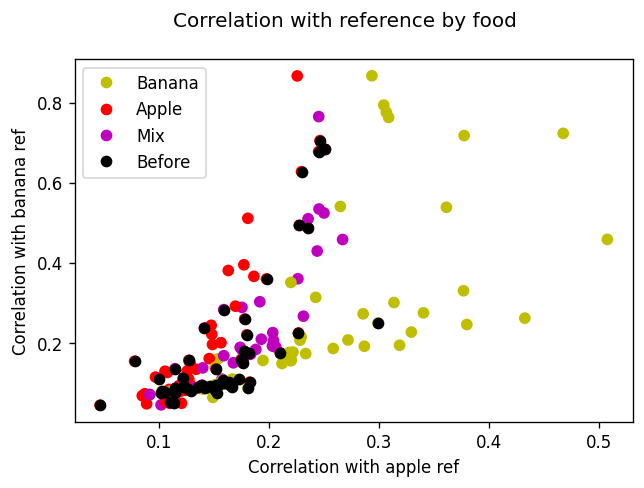

In [0]:
# plot  corr with reference
fig, ax = plt.subplots()
lut1 = {'Apple': 'r',
          'Banana': 'y',
          'Mix': 'm',
          'Before': 'k'
          }
cols_by_food = corr_with_ref['food'].map(lut1)

x = corr_with_ref['Apple']
x
y = corr_with_ref['Banana']
plt.scatter(x , y, c = cols_by_food);

# plot 'Before' by black
before_idx = (corr_with_ref['sample_time'] == 'Before')|(corr_with_ref['sample_time'] == 'before')
x_before = corr_with_ref.loc[before_idx,'Apple']
y_before = corr_with_ref.loc[before_idx,'Banana']
plt.scatter(x_before , y_before, c = 'k');

legend_elements = [Line2D([0], [0], marker='o', color='y',linestyle='none', label='Banana'),
                  Line2D([0], [0], marker='o', color='r', linestyle='none', label='Apple'),
                  Line2D([0], [0], marker='o', color='m', linestyle='none', label='Mix'),
                  Line2D([0], [0], marker='o', color='k', linestyle='none', label='Before') ]


plt .legend(handles = legend_elements, loc="upper left");  
plt.xlabel(xl )

plt.xlabel('Correlation with apple ref')
plt.ylabel('Correlation with banana ref');
fig.suptitle('Correlation with reference by food')
fig.set_dpi(120)

In [0]:
from scipy.stats.stats import pearsonr
corr_ref = pearsonr( corr_with_ref['Apple'].values, 
                    corr_with_ref['Banana'].values
                    )
print('correlation between references: ', corr_ref[0])
corr_ref

correlation between references:  0.6698988110003058


(0.6698988110003058, 7.67327112505951e-23)

In the figure above, we can see that both axis are correlated **(Pearson Correaltion = 0.67)**. We can also see that banana-samples have higher correletion with both banana and apple . This finding is contradictory to our preliminary assumptions. 


According to this figure, we suppose that the correlation method will be with an average performance. Moreover, more data is needed in order to generalize this method. 
